#[فراس طيب - راما يزبك - راما الحسين]

<h1 style="text-align: center;">Data Exploratory Analysis and Processing<h1>

Prepare libraries

In [2]:
# import geohash2
import numpy as np
import pandas as pd
import seaborn as sns
from pyproj import CRS
import geopandas as gpd
from scipy import stats
from shapely import wkt
import plotly.express as px
from shapely.wkt import loads
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point, MultiPolygon, shape

# Question [1]: Data Cleaning & Integration

## [a] Fill Gaps

### [1]

crashes dataset

In [2]:
crashes_df = pd.read_csv('chicago-traffic-dataset/traffic-crashes.csv')

# crashes_df.head(10)

In [ ]:
# crashes_df.isnull().sum()

drop columns

In [3]:
crashes_df = crashes_df.drop(columns=['CRASH_DATE_EST_I' ,'LANE_CNT' , 'ALIGNMENT' , 'REPORT_TYPE' , 'NOT_RIGHT_OF_WAY_I' , 'HIT_AND_RUN_I' , 
                                      'DATE_POLICE_NOTIFIED' , 'PHOTOS_TAKEN_I' , 'STATEMENTS_TAKEN_I' , 'DOORING_I' , 'WORK_ZONE_I' ,
                                      'WORK_ZONE_TYPE' , 'WORKERS_PRESENT_I' , 'MOST_SEVERE_INJURY' , 'INJURIES_TOTAL' , 'INJURIES_FATAL' ,
                                      'INJURIES_INCAPACITATING' , 'INJURIES_NON_INCAPACITATING' , 'INJURIES_REPORTED_NOT_EVIDENT' ,
                                      'INJURIES_NO_INDICATION' , 'INJURIES_UNKNOWN' ,'INTERSECTION_RELATED_I'])
#  , 'STREET_NAME'

قمنا بحذف هذه الأعمدة لان منها يحوي على قيم فارغة بنسبة كبيرة جدا ومنها لا يهمنا في عملية استكشاف اسباب الحوادث

In [ ]:
# crashes_df.head(10)

In [4]:
crashes_df.to_csv('chicago-traffic-dataset/crashes.csv', encoding='utf-8')

people dataset

In [5]:
people_df = pd.read_csv('chicago-traffic-dataset/traffic-crashes-people.csv',low_memory=False)
# people_df.head(10)

In [ ]:
# people_df.isnull().sum()

drop columns

In [6]:
people_df = people_df.drop(columns=[ 'PERSON_ID' , 'CRASH_DATE' , 'SEAT_NO' , 'CITY' , 'STATE' , 'DRIVERS_LICENSE_STATE' , 'DRIVERS_LICENSE_CLASS' ,
                                     'SAFETY_EQUIPMENT' , 'AIRBAG_DEPLOYED' , 'EJECTION' , 'INJURY_CLASSIFICATION' , 'HOSPITAL' , 'EMS_AGENCY' ,
                                       'EMS_RUN_NO' , 'PEDPEDAL_VISIBILITY' ,'CELL_PHONE_USE' , 'BAC_RESULT', 'BAC_RESULT VALUE'])

قمنا بحذف هذه الأعمدة لان منها يحوي على قيم فارغة بنسبة كبيرة جدا ومنها لا يهمنا في عملية استكشاف اسباب الحوادث

In [ ]:
# people_df.head(10)

In [7]:
people_df.to_csv('chicago-traffic-dataset/people.csv', encoding='utf-8')

vehicles dataset

In [8]:
vehicles_df = pd.read_csv('chicago-traffic-dataset/traffic-crashes-vehicles.csv',low_memory=False)
# vehicles_df.head(10)

In [ ]:
# vehicles_df.isnull().sum()

drop columns

In [9]:
vehicles_df = vehicles_df.drop(columns=[ 'CRASH_UNIT_ID' , 'UNIT_TYPE' , 'CMRC_VEH_I' ,'LIC_PLATE_STATE', 'VEHICLE_USE' , 'TRAVEL_DIRECTION',
                                         'MANEUVER' , 'TOWED_I' , 'TOWED_TO' , 'TOWED_BY' , 'FIRE_I' , 'EXCEED_SPEED_LIMIT_I' , 'FIRST_CONTACT_POINT' ,
                                        'CARGO_BODY_TYPE' , 'LOAD_TYPE' , 'HAZMAT_OUT_OF_SERVICE_I' , 'MCS_OUT_OF_SERVICE_I' , 'HAZMAT_CLASS' ,
                                          'TRAILER1_LENGTH' , 'TRAILER2_LENGTH' , 'TOTAL_VEHICLE_LENGTH' , 'AXLE_CNT' , 'VEHICLE_CONFIG' , 'AREA_00_I',
                                          'HAZMAT_REPORT_I' , 'HAZMAT_REPORT_NO' , 'MCS_REPORT_I' , 'MCS_REPORT_NO' , 'HAZMAT_VIO_CAUSE_CRASH_I' , 
                                          'MCS_VIO_CAUSE_CRASH_I' , 'IDOT_PERMIT_NO' , 'WIDE_LOAD_I' , 'TRAILER1_WIDTH' , 'TRAILER2_WIDTH' , 'AREA_01_I',
                                          'ILCC_NO' , 'COMMERCIAL_SRC' , 'GVWR' , 'CARRIER_NAME' , 'CARRIER_STATE' , 'CARRIER_CITY' , 'HAZMAT_PLACARDS_I',
                                          'HAZMAT_NAME' , 'UN_NO' , 'HAZMAT_PRESENT_I' , 'AREA_02_I' , 'AREA_07_I' , 'AREA_08_I' , 'AREA_09_I' , 'AREA_10_I',
                                          'AREA_11_I', 'AREA_12_I', 'AREA_99_I' , 'CMV_ID' , 'USDOT_NO' , 'CCMC_NO' , 'AREA_03_I', 'AREA_04_I','AREA_05_I',
                                          'AREA_06_I'])

قمنا بحذف هذه الأعمدة لان منها يحوي على قيم فارغة بنسبة كبيرة جدا ومنها لا يهمنا في عملية استكشاف اسباب الحوادث

In [ ]:
# vehicles_df.head(10)

In [10]:
vehicles_df.to_csv('chicago-traffic-dataset/vehicles.csv', encoding='utf-8')

### [2]

In [2]:
people_df = pd.read_csv('chicago-traffic-dataset/people.csv')
vehicles_df = pd.read_csv('chicago-traffic-dataset/vehicles.csv')
crashes_df = pd.read_csv('chicago-traffic-dataset/crashes.csv' , low_memory=False)

 #### القيم الفارغة

In [30]:
crashes_df = crashes_df.dropna(subset=['STREET_DIRECTION','STREET_NAME'])

crashes_df = crashes_df.dropna(subset=['LATITUDE', 'LONGITUDE', 'LOCATION'])

crashes_df = crashes_df.dropna(subset=['BEAT_OF_OCCURRENCE'])

crashes_df.isna().sum()

Unnamed: 0                 0
CRASH_RECORD_ID            0
CRASH_DATE                 0
POSTED_SPEED_LIMIT         0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
TRAFFICWAY_TYPE            0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
STREET_NO                  0
STREET_DIRECTION           0
STREET_NAME                0
BEAT_OF_OCCURRENCE         0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
LATITUDE                   0
LONGITUDE                  0
LOCATION                   0
dtype: int64

In [31]:
people_df['PHYSICAL_CONDITION'].fillna(people_df['PHYSICAL_CONDITION'].mode()[0], inplace=True)
people_df['DRIVER_VISION'].fillna(people_df['DRIVER_VISION'].mode()[0], inplace=True)
people_df['DRIVER_ACTION'].fillna(people_df['DRIVER_ACTION'].mode()[0], inplace=True)

people_df['PEDPEDAL_LOCATION'].fillna('UNKNOWN', inplace=True)
people_df['PEDPEDAL_ACTION'].fillna('UNKNOWN', inplace=True)
people_df['SEX'].fillna('UNKNOWN', inplace=True)
people_df['ZIPCODE'].fillna('UNKNOWN', inplace=True)

people_df['AGE'].fillna(0, inplace=True)
people_df.loc[(people_df['PERSON_TYPE'] != 'DRIVER') & (people_df['VEHICLE_ID'].isna()), 'VEHICLE_ID'] = 0

vehicle_map = vehicles_df.groupby('CRASH_RECORD_ID')['VEHICLE_ID'].apply(list).to_dict()

def fill_vehicle_id(row):
    if pd.isna(row['VEHICLE_ID']) and row['PERSON_TYPE'] == 'DRIVER':
        vehicle_ids = vehicle_map.get(row['CRASH_RECORD_ID'], [])
        if vehicle_ids:
            used_vehicle_ids = people_df[(people_df['CRASH_RECORD_ID'] == row['CRASH_RECORD_ID']) & (people_df['VEHICLE_ID'].notna())]['VEHICLE_ID'].tolist()
            available_vehicle_ids = set(vehicle_ids) - set(used_vehicle_ids)
            if available_vehicle_ids:
                return available_vehicle_ids.pop()
    return row['VEHICLE_ID']

people_df['VEHICLE_ID'] = people_df.apply(fill_vehicle_id, axis=1)
people_df = people_df.dropna(subset=['VEHICLE_ID'])

people_df.isna().sum()

Unnamed: 0            0
PERSON_TYPE           0
CRASH_RECORD_ID       0
VEHICLE_ID            0
ZIPCODE               0
SEX                   0
AGE                   0
DRIVER_ACTION         0
DRIVER_VISION         0
PHYSICAL_CONDITION    0
PEDPEDAL_ACTION       0
PEDPEDAL_LOCATION     0
dtype: int64

In [325]:
vehicles_df['MAKE'] = vehicles_df['MAKE'].fillna('OTHER')
vehicles_df['MODEL'] = vehicles_df['MODEL'].fillna('OTHER')

median_vehicle_year = vehicles_df['VEHICLE_YEAR'].median()
vehicles_df['VEHICLE_YEAR'] = vehicles_df['VEHICLE_YEAR'].fillna(median_vehicle_year)

vehicles_df['VEHICLE_DEFECT'] = vehicles_df['VEHICLE_DEFECT'].fillna('UNKNOWN')

vehicles_df['OCCUPANT_CNT'] = vehicles_df['OCCUPANT_CNT'].fillna('UNKNOWN')
duplicate_units = vehicles_df[vehicles_df.duplicated(subset=['CRASH_RECORD_ID', 'UNIT_NO'], keep=False)]
to_drop = duplicate_units[duplicate_units['VEHICLE_ID'].isna()]
vehicles_df = vehicles_df.drop(to_drop.index)

In [326]:
vehicles_df = vehicles_df.dropna(subset=['VEHICLE_TYPE'])
vehicles_df.isnull().sum()

Unnamed: 0         0
CRASH_RECORD_ID    0
CRASH_DATE         0
UNIT_NO            0
VEHICLE_ID         0
MAKE               0
MODEL              0
VEHICLE_YEAR       0
VEHICLE_DEFECT     0
VEHICLE_TYPE       0
OCCUPANT_CNT       0
dtype: int64

#### القيم المتطرفة

In [ ]:
numeric_columns = crashes_df.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['Unnamed: 0', 'POSTED_SPEED_LIMIT', 'STREET_NO', 'BEAT_OF_OCCURRENCE',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')


In [ ]:
crashes_df['CRASH_HOUR'].value_counts()

15    63288
16    62624
17    60917
14    54809
18    50245
13    49590
12    47954
8     43296
11    41487
9     37530
10    37187
19    37092
7     34570
20    29905
21    26721
22    24558
23    21293
0     17760
6     17663
1     15277
2     13090
5     11214
3     10697
4      9499
Name: CRASH_HOUR, dtype: int64

calculate outliers for :

1. CRASH_HOUR

In [ ]:
Q1_long = crashes_df['CRASH_HOUR'].quantile(0.25)
Q3_long = crashes_df['CRASH_HOUR'].quantile(0.75)
IQR_long = Q3_long - Q1_long

lower_bound_hour = Q1_long - 1.5 * IQR_long
upper_bound_hour = Q3_long + 1.5 * IQR_long

outliers_lo = crashes_df[
    (crashes_df['CRASH_HOUR'] < lower_bound_hour) | (crashes_df['CRASH_HOUR'] > upper_bound_hour)
]
print(outliers_lo.shape[0])


0


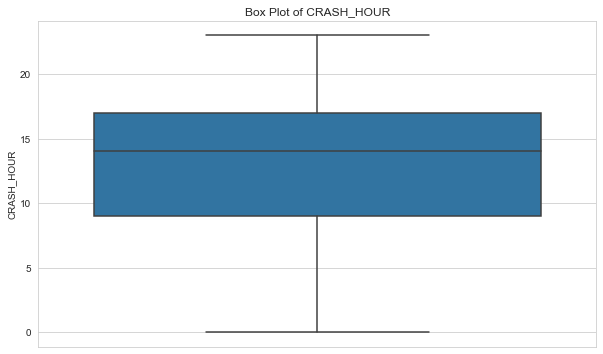

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=crashes_df, y='CRASH_HOUR')
plt.title('Box Plot of CRASH_HOUR')
plt.ylabel('CRASH_HOUR')
plt.show()

لا يوجد تطرف في عامود ساعة الحادث

2. CRASH_DAY_OF_WEEK

In [ ]:
Q1_long = crashes_df['CRASH_DAY_OF_WEEK'].quantile(0.25)
Q3_long = crashes_df['CRASH_DAY_OF_WEEK'].quantile(0.75)
IQR_long = Q3_long - Q1_long

lower_bound_day = Q1_long - 1.5 * IQR_long
upper_bound_day = Q3_long + 1.5 * IQR_long

outliers_day = crashes_df[
    (crashes_df['CRASH_DAY_OF_WEEK'] < lower_bound_day) | (crashes_df['CRASH_DAY_OF_WEEK'] > upper_bound_day)
]
print(outliers_day.shape[0])


0


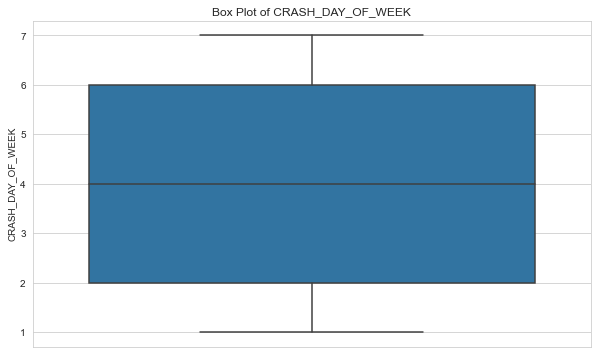

In [248]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=crashes_df, y='CRASH_DAY_OF_WEEK')
plt.title('Box Plot of CRASH_DAY_OF_WEEK')
plt.ylabel('CRASH_DAY_OF_WEEK')
plt.show()

لا يوجد تطرف في عامود يوم الحادث

3. CRASH_MONTH

In [ ]:

Q1_long = crashes_df['CRASH_MONTH'].quantile(0.25)
Q3_long = crashes_df['CRASH_MONTH'].quantile(0.75)
IQR_long = Q3_long - Q1_long

lower_bound_month = Q1_long - 1.5 * IQR_long
upper_bound_month = Q3_long + 1.5 * IQR_long

outliers_month = crashes_df[
    (crashes_df['CRASH_MONTH'] < lower_bound_month) | (crashes_df['CRASH_MONTH'] > upper_bound_month)
]
print(outliers_month.shape[0])


0


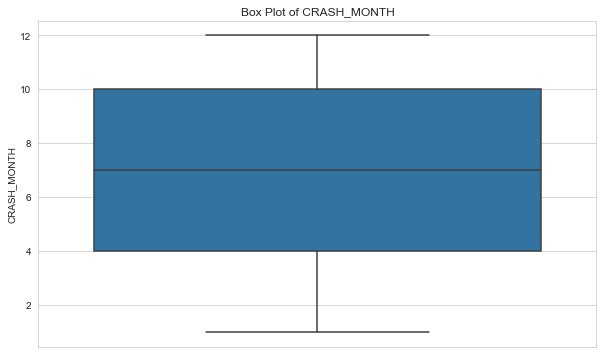

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=crashes_df, y='CRASH_MONTH')
plt.title('Box Plot of CRASH_MONTH')
plt.ylabel('CRASH_MONTH')
plt.show()

لا يوجد تطرف في عامود شهر الحادث

معالجة التطرف في عامود السرعة في داتا الحوادث

Text(0, 0.5, 'Frequency')

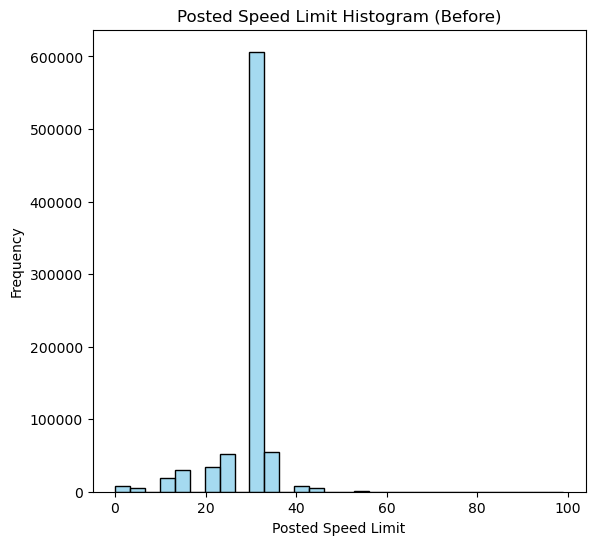

In [ ]:
# Step 1: Plot histogram before replacing outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(crashes_df['POSTED_SPEED_LIMIT'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Posted Speed Limit Histogram (Before)')
plt.xlabel('Posted Speed Limit')
plt.ylabel('Frequency')

حددنا مجال الكونتايل بين 0.10 و 0.95 ليشمل فقط السرعة من القيمة 60 وما فوق وتم استبدال هذه القيم بال

mean 

In [ ]:

Q1_long = crashes_df['POSTED_SPEED_LIMIT'].quantile(0.10)
Q3_long = crashes_df['POSTED_SPEED_LIMIT'].quantile(0.95)
IQR_long = Q3_long - Q1_long

lower_bound_speed = Q1_long - 1.5 * IQR_long
upper_bound_speed = Q3_long + 1.5 * IQR_long

outliers_speed_limit = crashes_df[
    (crashes_df['POSTED_SPEED_LIMIT'] < lower_bound_speed) | (crashes_df['POSTED_SPEED_LIMIT'] > upper_bound_speed)
]
print(outliers_speed_limit.shape[0])


142


In [ ]:
outliers_speed_limit['POSTED_SPEED_LIMIT'].value_counts()

99    66
60    50
65    18
70     6
63     1
62     1
Name: POSTED_SPEED_LIMIT, dtype: int64

In [ ]:
# repalce with mean
mean_speed_limit = crashes_df['POSTED_SPEED_LIMIT'].mean()

crashes_df['POSTED_SPEED_LIMIT'] = crashes_df['POSTED_SPEED_LIMIT'].apply(
    lambda x: mean_speed_limit if x < lower_bound_speed or x > upper_bound_speed else x
)


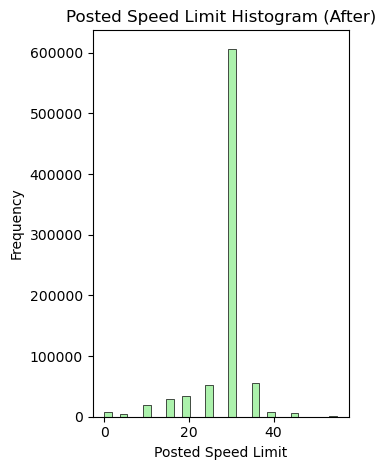

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(crashes_df['POSTED_SPEED_LIMIT'], bins=30, kde=False, color='lightgreen', edgecolor='black')
plt.title('Posted Speed Limit Histogram (After)')
plt.xlabel('Posted Speed Limit')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

معالجة التطرف في عامود رقم الشارع في داتا الحوادث

In [ ]:
Q1_long = crashes_df['STREET_NO'].quantile(0.25)
Q3_long = crashes_df['STREET_NO'].quantile(0.75)
IQR_long = Q3_long - Q1_long

lower_bound_street = Q1_long - 1.5 * IQR_long
upper_bound_street = Q3_long + 1.5 * IQR_long

outliers_street_no = crashes_df[
    (crashes_df['STREET_NO'] < lower_bound_street) | (crashes_df['STREET_NO'] > upper_bound_street)
]
print(outliers_street_no.shape[0])

4608


In [ ]:
mode_street_no = crashes_df['STREET_NO'].mode()[0]

crashes_df['STREET_NO'] = crashes_df['STREET_NO'].apply(
    lambda x: mode_street_no if x < lower_bound_street or x > upper_bound_street else x
)

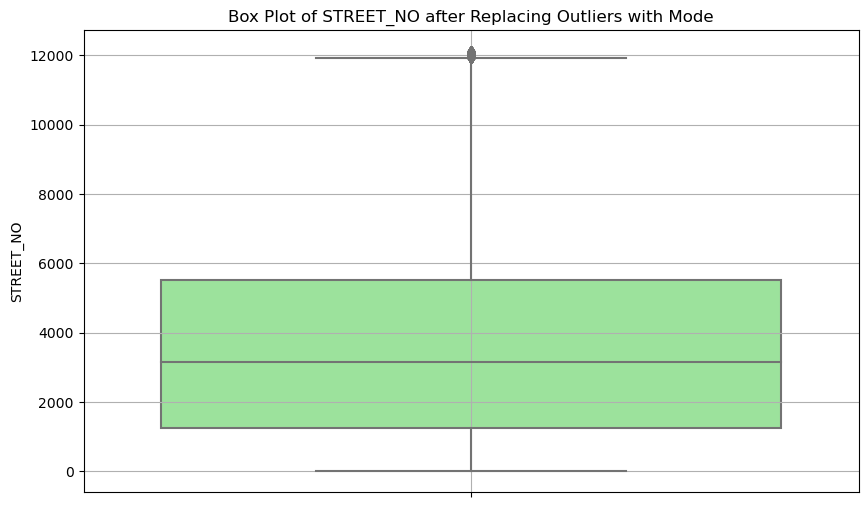

In [ ]:
# Plot the box plot after replacing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=crashes_df, y='STREET_NO', color='lightgreen', whis=1.5)
plt.title('Box Plot of STREET_NO after Replacing Outliers with Mode')
plt.ylabel('STREET_NO')
plt.grid(True)
plt.show()

معالجة التطرف في عامود سنة المركبة في داتا المركبات

لاحظنا وجود سنة تصنيع السيارات عام  2025 و اكثر فتم استبدالهم ب السنة الأكثر تكرارا .... وعددهم 1097 سيارة

In [327]:
years_above_2024 = vehicles_df[vehicles_df['VEHICLE_YEAR'] > 2024]
count_years_above_2024 = years_above_2024.shape[0]
print(f"The number of years above 2024 before processing: {count_years_above_2024}")

The number of years above 2024 before processing: 1097


In [328]:
# create new Data Frame contains new vehicles , its year is > 2024
df_new_year_vehicles = vehicles_df[vehicles_df['VEHICLE_YEAR']  > 2024]
# df_new_year_vehicles

In [36]:
df_new_year_vehicles.to_csv('chicago-traffic-dataset/new_vehicles.csv', encoding='utf-8')

In [329]:
most_frequent_year = vehicles_df['VEHICLE_YEAR'].mode()[0]

vehicles_df.loc[vehicles_df['VEHICLE_YEAR'] > 2024, 'VEHICLE_YEAR'] = most_frequent_year

years_above_2024 = vehicles_df[vehicles_df['VEHICLE_YEAR'] > 2024]

count_years_above_2024 = years_above_2024.shape[0]
print(f"The number of years above 2024 after processing: {count_years_above_2024}")

# vehicles_df.head()

The number of years above 2024 after processing: 0


يوجد مركبات تاريخ صنعها قديم جدا .... ف تم إزالة هذه القيم و حفظها بداتا جديدة لنستنتج منها اسباب الحوادث المتطرفة

In [330]:
years_less_than_1970 = vehicles_df[vehicles_df['VEHICLE_YEAR'] < 1970]
count_years_less_than_1970 = years_less_than_1970.shape[0]
print(f"The number of years less than 1970 before processing: {count_years_less_than_1970}")

The number of years less than 1970 before processing: 544


In [331]:
# create new Data Frame contains Old vehicles 
df_old_year_vehicles = vehicles_df[vehicles_df['VEHICLE_YEAR'] < 1970]
# df_old_year_vehicles

In [40]:
df_old_year_vehicles.to_csv('chicago-traffic-dataset/old_vehicles.csv', encoding='utf-8')

In [332]:
vehicles_df = vehicles_df[vehicles_df['VEHICLE_YEAR'] >= 1970]
print(f"DataFrame after dropping rows: {vehicles_df.shape}")
# vehicles_df.head()

DataFrame after dropping rows: (1641875, 11)


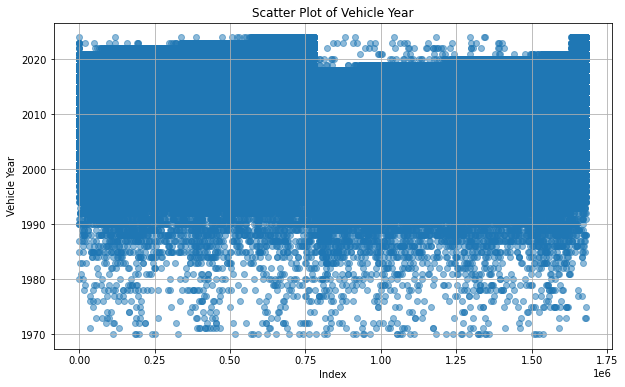

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(vehicles_df.index, vehicles_df['VEHICLE_YEAR'], alpha=0.5)
plt.title('Scatter Plot of Vehicle Year')
plt.xlabel('Index')
plt.ylabel('Vehicle Year')
plt.grid(True)
plt.show()

نلاحظ ان عمر المركبات اصبح ضمن مجال 1970 و 2024

معالجة عمر الاشخاص ذات القيمة صفر

In [283]:
crashes_df['YEAR'] = pd.to_datetime(crashes_df['CRASH_DATE']).dt.year 
 
merged_data_for_age = pd.merge(pd.merge(people_df, vehicles_df, on=['CRASH_RECORD_ID']), crashes_df, on='CRASH_RECORD_ID') 
 
# vehicle's age 
merged_data_for_age['VEHICLE_AGE_AT_CRASH'] = merged_data_for_age['YEAR'] - merged_data_for_age['VEHICLE_YEAR'] 
 
merged_data_for_age = merged_data_for_age.dropna(subset=['AGE', 'VEHICLE_AGE_AT_CRASH']) 
 
# VEHICLE_AGE_AT_CRASH is not negative
merged_data_for_age = merged_data_for_age[merged_data_for_age['VEHICLE_AGE_AT_CRASH'] >= 0] 
 
# Categorize vehicle ages 
bins_vehicle_age = [0, 10, 20, 30, 40, 50, 100] 
labels_vehicle_age = ['0-10', '11-20', '21-30', '31-40', '41-50', '50+'] 
merged_data_for_age['VEHICLE_AGE_CATEGORY'] = pd.cut(merged_data_for_age['VEHICLE_AGE_AT_CRASH'], bins=bins_vehicle_age, labels=labels_vehicle_age, include_lowest=True) 
 
#  median driver age for each vehicle age category 
median_ages = merged_data_for_age.groupby('VEHICLE_AGE_CATEGORY')['AGE'].median() 
 
def impute_age(row): 
    if row['AGE'] == 0 and row['VEHICLE_AGE_CATEGORY'] in median_ages.index: 
        return median_ages[row['VEHICLE_AGE_CATEGORY']] 
    else: 
        return row['AGE'] 
 
people_df = pd.merge(people_df, crashes_df[['CRASH_RECORD_ID', 'YEAR']], on='CRASH_RECORD_ID', how='left') 
people_df = pd.merge(people_df, vehicles_df[['CRASH_RECORD_ID', 'VEHICLE_YEAR']], on=['CRASH_RECORD_ID'], how='left') 
 
#vehicle's age at the time of the crash 
people_df['VEHICLE_AGE_AT_CRASH'] = people_df['YEAR'] - people_df['VEHICLE_YEAR'] 
people_df['VEHICLE_AGE_CATEGORY'] = pd.cut(people_df['VEHICLE_AGE_AT_CRASH'], bins=bins_vehicle_age, labels=labels_vehicle_age, include_lowest=True) 
 
people_df['AGE'] = people_df.apply(impute_age, axis=1) 
 
# median age
median_age = people_df.loc[people_df['AGE'] > 0, 'AGE'].median() 
 
# Replace zero with the median age 
people_df['AGE'] = people_df['AGE'].replace(0, median_age) 
 
print(people_df[people_df['AGE'] == 0].head())

Empty DataFrame
Columns: [Unnamed: 0, PERSON_TYPE, CRASH_RECORD_ID, VEHICLE_ID, ZIPCODE, SEX, AGE, DRIVER_ACTION, DRIVER_VISION, PHYSICAL_CONDITION, PEDPEDAL_ACTION, PEDPEDAL_LOCATION, YEAR, VEHICLE_YEAR, VEHICLE_AGE_AT_CRASH, VEHICLE_AGE_CATEGORY]
Index: []


calculate outliers for :

1. longitude

2. latitude

تم استبدال هذه القيم باحداثيات أقرب شارع لكل موقع من داتا الشوارع .....ف تمت معالجة قسم من الاحداثيات والباقي تم استبداله 

median

In [44]:
#find outliers longitude and latitude 

### before process outliers of longitude & latitude :
#Number of outliers in LONGITUDE: 2160
#Number of outliers in LATITUDE: 49

### after process outliers of longitude & latitude :
#Number of outliers in LONGITUDE: 2111
#Number of outliers in LATITUDE: 49

street_df = pd.read_csv('chicago-traffic-dataset/chicago-street-center-lines.csv')

Q1_long = crashes_df['LONGITUDE'].quantile(0.25)
Q3_long = crashes_df['LONGITUDE'].quantile(0.75)
IQR_long = Q3_long - Q1_long
lower_bound_long = Q1_long - 1.5 * IQR_long
upper_bound_long = Q3_long + 1.5 * IQR_long

Q1_lat = crashes_df['LATITUDE'].quantile(0.25)
Q3_lat = crashes_df['LATITUDE'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat
lower_bound_lat = Q1_lat - 1.5 * IQR_lat
upper_bound_lat = Q3_lat + 1.5 * IQR_lat

print(f"Longitude: Q1 = {Q1_long}, Q3 = {Q3_long}, IQR = {IQR_long}")
print(f"Latitude: Q1 = {Q1_lat}, Q3 = {Q3_lat}, IQR = {IQR_lat}")
print(f"Longitude: lower_bound = {lower_bound_long}, upper_bound = {upper_bound_long}")
print(f"Latitude: lower_bound = {lower_bound_lat}, upper_bound = {upper_bound_lat}")

crashes_gdf = gpd.GeoDataFrame(
    crashes_df,
    geometry=gpd.points_from_xy(crashes_df.LONGITUDE, crashes_df.LATITUDE),
    crs="EPSG:4326"
)

streets_gdf = gpd.GeoDataFrame(
    street_df,
    geometry=street_df['the_geom'].apply(wkt.loads),  # Assuming 'the_geom' contains WKT strings
    crs="EPSG:4326"
)

outliers = crashes_gdf[
    (crashes_gdf['LONGITUDE'] < lower_bound_long) | (crashes_gdf['LONGITUDE'] > upper_bound_long) |
    (crashes_gdf['LATITUDE'] < lower_bound_lat) | (crashes_gdf['LATITUDE'] > upper_bound_lat)
]

for idx, row in outliers.iterrows():
    crash_point = row.geometry
    nearest_street = streets_gdf.distance(crash_point).idxmin()
    nearest_street_geom = streets_gdf.loc[nearest_street, 'geometry']

    new_point = nearest_street_geom.interpolate(nearest_street_geom.project(crash_point))
    crashes_gdf.at[idx, 'geometry'] = new_point

crashes_gdf['LONGITUDE'] = crashes_gdf.geometry.x
crashes_gdf['LATITUDE'] = crashes_gdf.geometry.y

joined_gdf = gpd.sjoin(crashes_gdf, streets_gdf, how="left", predicate="intersects")

crashes_df.loc[outliers.index, 'STREET_NAME'] = joined_gdf.loc[outliers.index, 'STREET_NAM']


Longitude: Q1 = -87.721764538, Q3 = -87.633428305, IQR = 0.08833623300000681
Latitude: Q1 = 41.782556901, Q3 = 41.92440954, IQR = 0.14185263899999967
Longitude: lower_bound = -87.85426888750001, upper_bound = -87.50092395549999
Latitude: lower_bound = 41.5697779425, upper_bound = 42.137188498499995


C:\Users\User\AppData\Local\Temp\ipykernel_17076\2973484798.py:49: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nearest_street = streets_gdf.distance(crash_point).idxmin()


In [45]:
outliers_lo = crashes_gdf[
    (crashes_gdf['LONGITUDE'] < lower_bound_long) | (crashes_gdf['LONGITUDE'] > upper_bound_long)
]
latitude_outliers = crashes_df[
    (crashes_df['LATITUDE'] < lower_bound_lat) | (crashes_df['LATITUDE'] > upper_bound_lat)
]
print(outliers_lo.shape[0])
print(latitude_outliers.shape[0])

2111
49


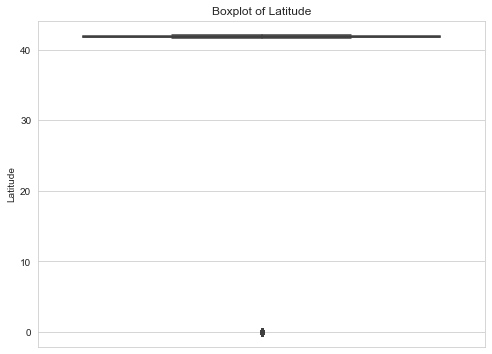

In [123]:
# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=crashes_df, y='LATITUDE')
plt.title('Boxplot of Latitude')
plt.ylabel('Latitude')
plt.show()


Number of remaining outliers in LONGITUDE after replacement: 0
Number of remaining outliers in LATITUDE after replacement: 0


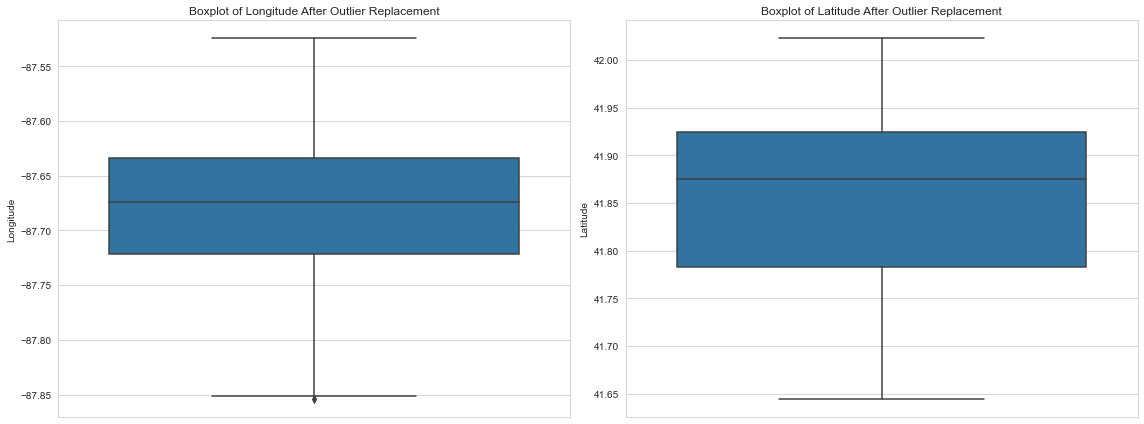

In [46]:
median_long = crashes_df['LONGITUDE'].median()
median_lat = crashes_df['LATITUDE'].median()

outliers_long = (crashes_df['LONGITUDE'] < lower_bound_long) | (crashes_df['LONGITUDE'] > upper_bound_long)
crashes_df.loc[outliers_long, 'LONGITUDE'] = median_long

outliers_lat = (crashes_df['LATITUDE'] < lower_bound_lat) | (crashes_df['LATITUDE'] > upper_bound_lat)
crashes_df.loc[outliers_lat, 'LATITUDE'] = median_lat

remaining_outliers_long = crashes_df[(crashes_df['LONGITUDE'] < lower_bound_long) | (crashes_df['LONGITUDE'] > upper_bound_long)]
remaining_outliers_lat = crashes_df[(crashes_df['LATITUDE'] < lower_bound_lat) | (crashes_df['LATITUDE'] > upper_bound_lat)]

print(f"Number of remaining outliers in LONGITUDE after replacement: {remaining_outliers_long.shape[0]}")
print(f"Number of remaining outliers in LATITUDE after replacement: {remaining_outliers_lat.shape[0]}")

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=crashes_df, y='LONGITUDE', ax=axes[0])
axes[0].set_title('Boxplot of Longitude After Outlier Replacement')
axes[0].set_ylabel('Longitude')

sns.boxplot(data=crashes_df, y='LATITUDE', ax=axes[1])
axes[1].set_title('Boxplot of Latitude After Outlier Replacement')
axes[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

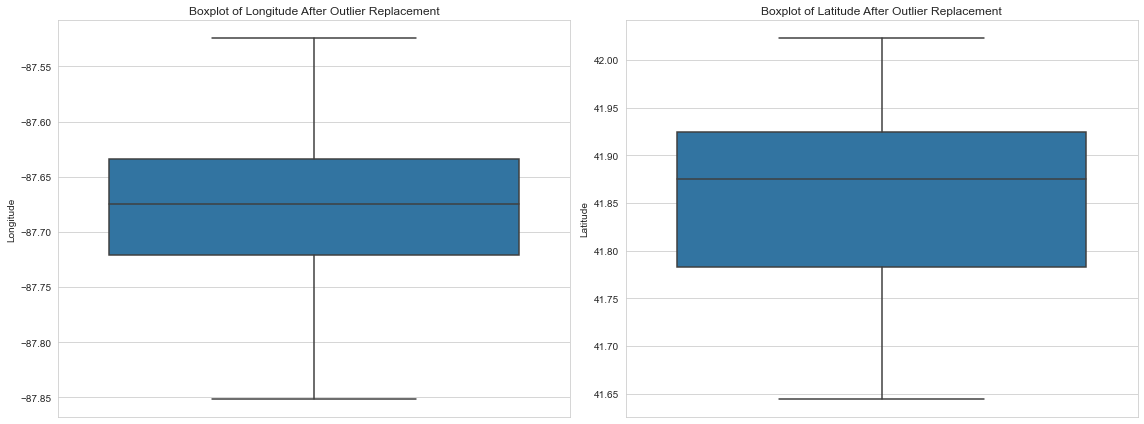

In [47]:
Q1_long = crashes_df['LONGITUDE'].quantile(0.25)
Q3_long = crashes_df['LONGITUDE'].quantile(0.75)
IQR_long = Q3_long - Q1_long
lower_bound_long = Q1_long - 1.5 * IQR_long
upper_bound_long = Q3_long + 1.5 * IQR_long

Q1_lat = crashes_df['LATITUDE'].quantile(0.25)
Q3_lat = crashes_df['LATITUDE'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat
lower_bound_lat = Q1_lat - 1.5 * IQR_lat
upper_bound_lat = Q3_lat + 1.5 * IQR_lat

median_long = crashes_df['LONGITUDE'].median()
median_lat = crashes_df['LATITUDE'].median()

crashes_df['LONGITUDE'] = crashes_df['LONGITUDE'].apply(
    lambda x: median_long if x < lower_bound_long or x > upper_bound_long else x)
crashes_df['LATITUDE'] = crashes_df['LATITUDE'].apply(
    lambda x: median_lat if x < lower_bound_lat or x > upper_bound_lat else x)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=crashes_df, y='LONGITUDE', ax=axes[0])
axes[0].set_title('Boxplot of Longitude After Outlier Replacement')
axes[0].set_ylabel('Longitude')

sns.boxplot(data=crashes_df, y='LATITUDE', ax=axes[1])
axes[1].set_title('Boxplot of Latitude After Outlier Replacement')
axes[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()


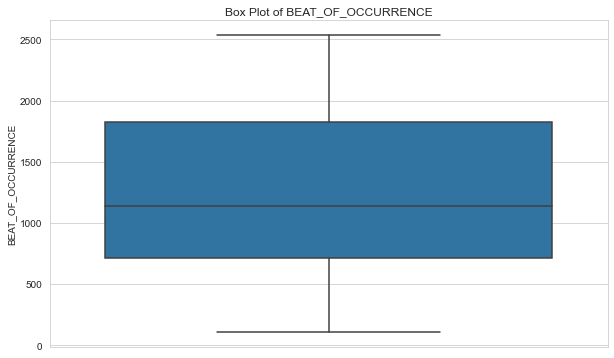

In [245]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=crashes_df, y='BEAT_OF_OCCURRENCE')
plt.title('Box Plot of BEAT_OF_OCCURRENCE')
plt.ylabel('BEAT_OF_OCCURRENCE')
plt.show()

لا يوجد تطرف في عامود رقم المقاطعة الشرطية

معالجة التطرف في عامود العمر في داتا الاشخاص

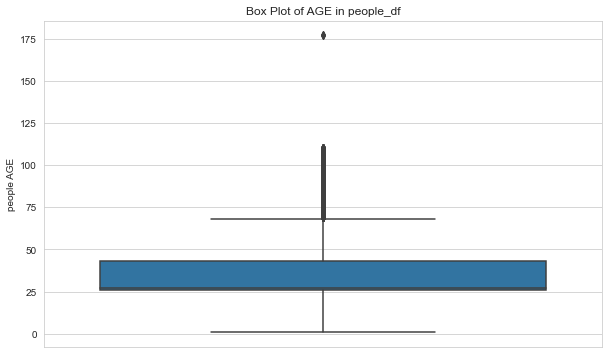

In [277]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=people_df, y='AGE')
plt.title('Box Plot of AGE in people_df')
plt.ylabel('people AGE')
plt.show()

In [294]:
median_age = people_df['AGE'].mean()
max_age = people_df['AGE'].max()
min_age = people_df['AGE'].min()

print('median AGE =',median_age)
print('max AGE =',max_age)
print('min AGE =',min_age)

median AGE = 34.278892535414734
max AGE = 177.0
min AGE = 1.0


In [295]:
Q1 = people_df['AGE'].quantile(0.25)
Q3 = people_df['AGE'].quantile(0.73)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

high_value = people_df[(people_df['AGE'] >= lower_bound - IQR) & (people_df['AGE'] < lower_bound)]['AGE'].max()
print('min age =',high_value)
people_df.loc[people_df['AGE'] < lower_bound, 'AGE'] = high_value

low_value = people_df[ (people_df['AGE'] <= upper_bound + IQR) &(people_df['AGE'] > upper_bound )]['AGE'].min()
print('max age =',low_value)
people_df.loc[people_df['AGE'] > upper_bound, 'AGE'] = low_value

min age = 3.0
max age = 64.0


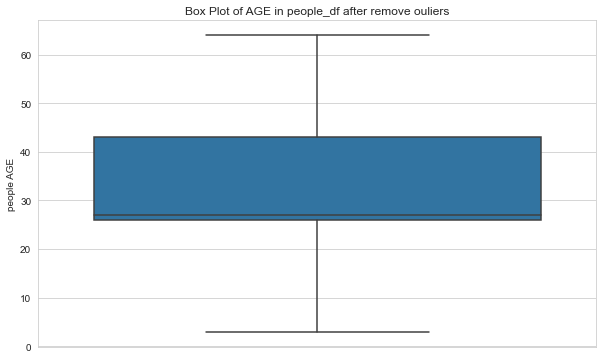

In [296]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=people_df, y='AGE')
plt.title('Box Plot of AGE in people_df after remove ouliers')
plt.ylabel('people AGE')
plt.show()

 تم معالجة جميع القيم :)

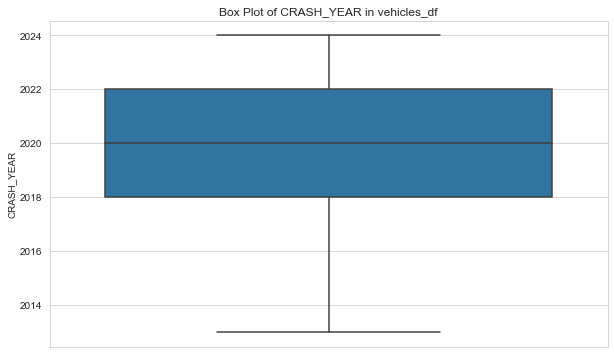

In [339]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=vehicles_df, y='CRASH_YEAR')
plt.title('Box Plot of CRASH_YEAR in vehicles_df')
plt.ylabel('CRASH_YEAR')
plt.show()

لا يوجد تطرف في عامود سنة الحادث ضمن داتا المركبات

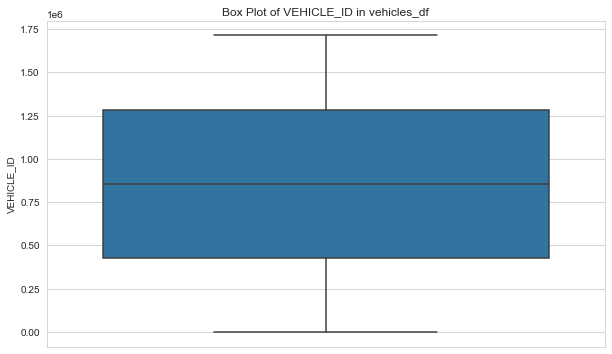

In [262]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=vehicles_df, y='VEHICLE_ID')
plt.title('Box Plot of VEHICLE_ID in vehicles_df')
plt.ylabel('VEHICLE_ID')
plt.show()

لا يوجد تطرف في عامود ايدي المركبة ضمن داتا المركبات

#### القيم المتناقضة

معالجة التناقض في تاريخ الحادث بين داتا الحوادث و المركبات

In [334]:
crashes_df['CRASH_DATE'] = pd.to_datetime(crashes_df['CRASH_DATE'])
vehicles_df['CRASH_DATE'] = pd.to_datetime(vehicles_df['CRASH_DATE'])


merged_df = pd.merge(crashes_df, vehicles_df, on='CRASH_RECORD_ID', suffixes=('_crash', '_vehicle'))

inconsistent_records = merged_df[merged_df['CRASH_DATE_crash'] != merged_df['CRASH_DATE_vehicle']]

print("Number of Inconsistent Records:", len(inconsistent_records))

# correct inconsistent date in vehicles_df from crashes_df 
for index, row in inconsistent_records.iterrows():
    vehicles_df.loc[vehicles_df['CRASH_RECORD_ID'] == row['CRASH_RECORD_ID'], 'CRASH_DATE'] = row['CRASH_DATE_crash']

Number of Inconsistent Records: 171


التحقق من ان كل القيم في تاريخ الحادث لها نفس الفورمات 

In [33]:
# crashes_df['CRASH_DATE'] = pd.to_datetime(crashes_df['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# # Check for missing or invalid dates
# invalid_dates = crashes_df[crashes_df['CRASH_DATE'].isna()]

# if not invalid_dates.empty:
#     print("Invalid dates found:")
#     print(invalid_dates)
# else:
#     print("All dates are valid.")

All dates are valid.


نلاحظ ان كل القيم لها نفس فورمات التاريخ

In [4]:
# تحديد السجلات التي تحتوي على تناقض في شهر الحادث 
# crashes_df['CRASH_DATE'] = pd.to_datetime(crashes_df['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')
# inconsistent_records = crashes_df[crashes_df['CRASH_MONTH'] != crashes_df['CRASH_DATE'].dt.month]
# print(inconsistent_records)


Empty DataFrame
Columns: [Unnamed: 0, CRASH_RECORD_ID, CRASH_DATE, POSTED_SPEED_LIMIT, TRAFFIC_CONTROL_DEVICE, DEVICE_CONDITION, WEATHER_CONDITION, LIGHTING_CONDITION, FIRST_CRASH_TYPE, TRAFFICWAY_TYPE, ROADWAY_SURFACE_COND, ROAD_DEFECT, CRASH_TYPE, INTERSECTION_RELATED_I, DAMAGE, PRIM_CONTRIBUTORY_CAUSE, SEC_CONTRIBUTORY_CAUSE, STREET_NO, STREET_DIRECTION, BEAT_OF_OCCURRENCE, CRASH_HOUR, CRASH_DAY_OF_WEEK, CRASH_MONTH, LATITUDE, LONGITUDE, LOCATION]
Index: []

[0 rows x 26 columns]


 نلاحظ انه لا يوجد تناقض في بين عامود شهر الحادث وتاريخ الحادث

In [36]:
# crashes_df['CRASH_DATE_HOUR'] = crashes_df['CRASH_DATE'].dt.hour

# inconsistent_hour = crashes_df[crashes_df['CRASH_HOUR'] != crashes_df['CRASH_DATE_HOUR']]

# if not inconsistent_hour.empty:
#     print("inconsistent found:")
#     print(inconsistent_hour)
# else:
#     print("No inconsistent found. CRASH_HOUR matches CRASH_DATE hour.")


No inconsistent found. CRASH_HOUR matches CRASH_DATE hour.


 نلاحظ انه لا يوجد تناقض في بين عامود ساعة الحادث وتاريخ الحادث

In [284]:
print('before correct :'+  str(people_df['AGE'].unique()))

people_df['AGE'] = people_df['AGE'].abs()
print('after correct :'+  str(people_df['AGE'].unique()))

before correct :[  25.    37.    26.    27.    34.    53.    65.    64.    33.    22.
   70.    51.    61.    28.    29.    58.    32.    18.    48.    30.
   43.    24.    57.    23.    52.    36.    47.    31.    42.    39.
   60.    35.    44.    54.    63.    49.    40.    45.    62.    50.
   71.    21.    46.    59.    67.    68.    74.    56.    38.    83.
   19.    16.    75.    55.    13.    80.    69.    86.    78.    20.
   41.    72.    66.    17.    73.    81.    15.    82.    14.    92.
   76.     3.    79.     5.     1.    10.    77.     6.     2.     9.
    7.    11.     8.    12.    97.     4.    84.    90.    89.    85.
   87.    88.    91.    99.   104.    98.    94.    93.   100.    -1.
  -47.  -177.    95.   102.   109.   107.   103.    96.   101.   110.
   32.5  108.   -49.   105.   -40.   106.   -59. ]
after correct :[ 25.   37.   26.   27.   34.   53.   65.   64.   33.   22.   70.   51.
  61.   28.   29.   58.   32.   18.   48.   30.   43.   24.   57.   23.
  52

العمر يحوي على قيم سالبة تم تحويلها الى موجبة

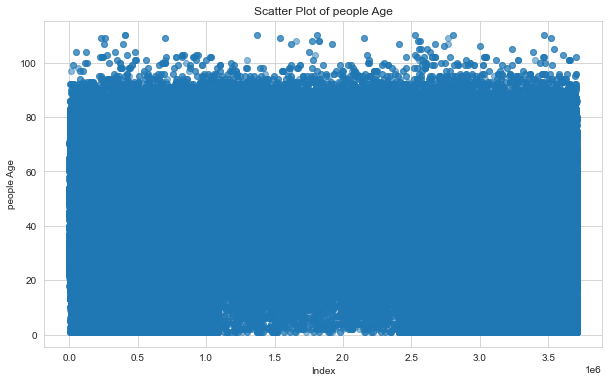

In [50]:
# Plot the scatter plot for people age
plt.figure(figsize=(10, 6))
plt.scatter(people_df.index, people_df['AGE'], alpha=0.5)
plt.title('Scatter Plot of people Age')
plt.xlabel('Index')
plt.ylabel('people Age')
plt.grid(True)
plt.show()

نلاحظ ان عمر الاشخاص اصبح لايحوي قيم سالبة ولا قيمة صفر 

In [52]:
print('before correct :'+  str(people_df['SEX'].unique()))

people_df['SEX'] = people_df['SEX'].replace({'X': np.nan })
print('after correct :'+  str(people_df['SEX'].unique()))
people_df['SEX'].fillna('UNKNOWN', inplace=True)
print('after fillna :'+  str(people_df['SEX'].unique()))

before correct :['M' 'UNKNOWN' 'F']
after correct :['M' 'UNKNOWN' 'F']
after fillna :['M' 'UNKNOWN' 'F']


x to nan تم تحويل 

معالجة سنة صنع المركبة الاكبر من سنة الحادث اي المربكة ارتكبت حادث قبل ان تصنع

In [335]:
vehicles_df['CRASH_DATE'] = pd.to_datetime(vehicles_df['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')
vehicles_df['CRASH_YEAR'] = vehicles_df['CRASH_DATE'].dt.year

In [337]:
# تحديد السجلات التي تحتوي على سنة صنع المركبة أكبر من سنة الحادث
inconsistent_records = vehicles_df[vehicles_df['VEHICLE_YEAR'] > vehicles_df['CRASH_YEAR']]

# تعيين سنة الحادث مساوية لسنة صنع المركبة 
vehicles_df.loc[vehicles_df['VEHICLE_YEAR'] > vehicles_df['CRASH_YEAR'], 'CRASH_YEAR'] = vehicles_df['VEHICLE_YEAR']


In [338]:
print('before correct :'+  str(vehicles_df['CRASH_YEAR'].unique()))


before correct :[2023 2024 2015 2016 2020 2021 2017 2018 2019 2022 2014 2013]


In [55]:
print('before correct :'+  str(vehicles_df['OCCUPANT_CNT'].unique()))
vehicles_df['OCCUPANT_CNT'] = vehicles_df['OCCUPANT_CNT'].replace(0, 1)
print('after correct :'+  str(vehicles_df['OCCUPANT_CNT'].unique()))


before correct :[1.0 2.0 3.0 4.0 0.0 5.0 6.0 31.0 8.0 7.0 23.0 37.0 10.0 9.0 12.0 13.0
 27.0 19.0 11.0 35.0 25.0 20.0 18.0 15.0 26.0 16.0 17.0 28.0 22.0 36.0
 33.0 44.0 14.0 43.0 32.0 29.0 34.0 47.0 21.0 30.0 99.0 24.0 60.0 39.0
 41.0 38.0]
after correct :[ 1.  2.  3.  4.  5.  6. 31.  8.  7. 23. 37. 10.  9. 12. 13. 27. 19. 11.
 35. 25. 20. 18. 15. 26. 16. 17. 28. 22. 36. 33. 44. 14. 43. 32. 29. 34.
 47. 21. 30. 99. 24. 60. 39. 41. 38.]


رقم الركاب مع السائق اقل قيمة يجب ان تكون هي 1 تم تحويل 0 الى 1

#### Standardization

##### crashes_df

In [56]:
print('before correct :'+  str(crashes_df['ROAD_DEFECT'].unique()))
crashes_df['ROAD_DEFECT'] = crashes_df['ROAD_DEFECT'].replace({'UNKNOWN': 'OTHER'})
print('after correct :'+  str(crashes_df['ROAD_DEFECT'].unique()))

before correct :['NO DEFECTS' 'UNKNOWN' 'OTHER' 'WORN SURFACE' 'RUT, HOLES'
 'SHOULDER DEFECT' 'DEBRIS ON ROADWAY']
after correct :['NO DEFECTS' 'OTHER' 'WORN SURFACE' 'RUT, HOLES' 'SHOULDER DEFECT'
 'DEBRIS ON ROADWAY']


In [57]:
print('before correct :'+  str(crashes_df['ROADWAY_SURFACE_COND'].unique()))
crashes_df['ROADWAY_SURFACE_COND'] = crashes_df['ROADWAY_SURFACE_COND'].replace({'UNKNOWN': 'OTHER'})
print('after correct :'+  str(crashes_df['ROADWAY_SURFACE_COND'].unique()))

before correct :['DRY' 'UNKNOWN' 'WET' 'OTHER' 'SNOW OR SLUSH' 'ICE' 'SAND, MUD, DIRT']
after correct :['DRY' 'OTHER' 'WET' 'SNOW OR SLUSH' 'ICE' 'SAND, MUD, DIRT']


In [58]:
print('before correct :'+  str(crashes_df['TRAFFICWAY_TYPE'].unique()))
crashes_df['TRAFFICWAY_TYPE'] = crashes_df['TRAFFICWAY_TYPE'].replace({'UNKNOWN': 'OTHER'})
print('after correct :'+  str(crashes_df['TRAFFICWAY_TYPE'].unique()))

before correct :['DIVIDED - W/MEDIAN (NOT RAISED)' 'NOT DIVIDED' 'PARKING LOT' 'FOUR WAY'
 'T-INTERSECTION' 'UNKNOWN' 'ALLEY' 'ONE-WAY' 'DRIVEWAY' 'TRAFFIC ROUTE'
 'OTHER' 'UNKNOWN INTERSECTION TYPE' 'DIVIDED - W/MEDIAN BARRIER'
 'CENTER TURN LANE' 'FIVE POINT, OR MORE' 'L-INTERSECTION'
 'Y-INTERSECTION' 'RAMP' 'ROUNDABOUT' 'NOT REPORTED']
after correct :['DIVIDED - W/MEDIAN (NOT RAISED)' 'NOT DIVIDED' 'PARKING LOT' 'FOUR WAY'
 'T-INTERSECTION' 'OTHER' 'ALLEY' 'ONE-WAY' 'DRIVEWAY' 'TRAFFIC ROUTE'
 'UNKNOWN INTERSECTION TYPE' 'DIVIDED - W/MEDIAN BARRIER'
 'CENTER TURN LANE' 'FIVE POINT, OR MORE' 'L-INTERSECTION'
 'Y-INTERSECTION' 'RAMP' 'ROUNDABOUT' 'NOT REPORTED']


In [59]:
print('before correct :'+  str(crashes_df['DEVICE_CONDITION'].unique()))
crashes_df['DEVICE_CONDITION'] = crashes_df['DEVICE_CONDITION'].replace({'UNKNOWN': 'OTHER'})
print('after correct :'+  str(crashes_df['DEVICE_CONDITION'].unique()))

before correct :['FUNCTIONING PROPERLY' 'NO CONTROLS' 'FUNCTIONING IMPROPERLY' 'UNKNOWN'
 'NOT FUNCTIONING' 'OTHER' 'MISSING' 'WORN REFLECTIVE MATERIAL']
after correct :['FUNCTIONING PROPERLY' 'NO CONTROLS' 'FUNCTIONING IMPROPERLY' 'OTHER'
 'NOT FUNCTIONING' 'MISSING' 'WORN REFLECTIVE MATERIAL']


In [60]:
print('before correct :'+  str(crashes_df['TRAFFIC_CONTROL_DEVICE'].unique()))
crashes_df['TRAFFIC_CONTROL_DEVICE'] = crashes_df['TRAFFIC_CONTROL_DEVICE'].replace({'UNKNOWN': 'OTHER'})
print('after correct :'+  str(crashes_df['TRAFFIC_CONTROL_DEVICE'].unique()))

before correct :['TRAFFIC SIGNAL' 'NO CONTROLS' 'UNKNOWN' 'STOP SIGN/FLASHER'
 'OTHER REG. SIGN' 'OTHER' 'PEDESTRIAN CROSSING SIGN' 'OTHER WARNING SIGN'
 'YIELD' 'RAILROAD CROSSING GATE' 'SCHOOL ZONE' 'POLICE/FLAGMAN'
 'DELINEATORS' 'LANE USE MARKING' 'OTHER RAILROAD CROSSING'
 'RR CROSSING SIGN' 'FLASHING CONTROL SIGNAL' 'NO PASSING'
 'BICYCLE CROSSING SIGN']
after correct :['TRAFFIC SIGNAL' 'NO CONTROLS' 'OTHER' 'STOP SIGN/FLASHER'
 'OTHER REG. SIGN' 'PEDESTRIAN CROSSING SIGN' 'OTHER WARNING SIGN' 'YIELD'
 'RAILROAD CROSSING GATE' 'SCHOOL ZONE' 'POLICE/FLAGMAN' 'DELINEATORS'
 'LANE USE MARKING' 'OTHER RAILROAD CROSSING' 'RR CROSSING SIGN'
 'FLASHING CONTROL SIGNAL' 'NO PASSING' 'BICYCLE CROSSING SIGN']


In [61]:
print('before correct :'+  str(crashes_df['WEATHER_CONDITION'].unique()))
crashes_df['WEATHER_CONDITION'] = crashes_df['WEATHER_CONDITION'].replace({'UNKNOWN': 'OTHER'})
print('after correct :'+  str(crashes_df['WEATHER_CONDITION'].unique()))

before correct :['CLEAR' 'UNKNOWN' 'RAIN' 'CLOUDY/OVERCAST' 'SNOW' 'FOG/SMOKE/HAZE'
 'BLOWING SNOW' 'FREEZING RAIN/DRIZZLE' 'SLEET/HAIL' 'OTHER'
 'SEVERE CROSS WIND GATE' 'BLOWING SAND, SOIL, DIRT']
after correct :['CLEAR' 'OTHER' 'RAIN' 'CLOUDY/OVERCAST' 'SNOW' 'FOG/SMOKE/HAZE'
 'BLOWING SNOW' 'FREEZING RAIN/DRIZZLE' 'SLEET/HAIL'
 'SEVERE CROSS WIND GATE' 'BLOWING SAND, SOIL, DIRT']


 OTHER  الى   UNKNOWN  تم تحويل القيم

##### people_df

In [62]:
print('before correct :'+  str(people_df['PEDPEDAL_ACTION'].unique()))
people_df['PEDPEDAL_ACTION'] = people_df['PEDPEDAL_ACTION'].replace({'UNKNOWN/NA': 'UNKNOWN'})
print('after correct :'+  str(people_df['PEDPEDAL_ACTION'].unique()))

before correct :['UNKNOWN' 'CROSSING - WITH SIGNAL' 'NO ACTION' 'STANDING IN ROADWAY'
 'PARKED VEHICLE' 'CROSSING - NO CONTROLS (NOT AT INTERSECTION)'
 'OTHER ACTION' 'CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)'
 'WITH TRAFFIC' 'UNKNOWN/NA' 'CROSSING - NO CONTROLS (AT INTERSECTION)'
 'NOT AT INTERSECTION' 'CROSSING - AGAINST SIGNAL' 'TURNING RIGHT'
 'AGAINST TRAFFIC' 'WORKING IN ROADWAY' 'INTOXICATED PED/PEDAL'
 'TURNING LEFT' 'ENTER FROM DRIVE/ALLEY' 'PLAYING/WORKING ON VEHICLE'
 'PLAYING IN ROADWAY' 'SCHOOL BUS (WITHIN 50 FT.)'
 'TO/FROM DISABLED VEHICLE' 'WAITING FOR SCHOOL BUS']
after correct :['UNKNOWN' 'CROSSING - WITH SIGNAL' 'NO ACTION' 'STANDING IN ROADWAY'
 'PARKED VEHICLE' 'CROSSING - NO CONTROLS (NOT AT INTERSECTION)'
 'OTHER ACTION' 'CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)'
 'WITH TRAFFIC' 'CROSSING - NO CONTROLS (AT INTERSECTION)'
 'NOT AT INTERSECTION' 'CROSSING - AGAINST SIGNAL' 'TURNING RIGHT'
 'AGAINST TRAFFIC' 'WORKING IN ROADWAY' 'INTOXICATED PED/PE

In [63]:
print('before correct :'+  str(people_df['PEDPEDAL_LOCATION'].unique()))
people_df['PEDPEDAL_LOCATION'] = people_df['PEDPEDAL_LOCATION'].replace({'UNKNOWN/NA': 'UNKNOWN' })
print('after correct :'+  str(people_df['PEDPEDAL_LOCATION'].unique()))

before correct :['UNKNOWN' 'IN CROSSWALK' 'IN ROADWAY' 'NOT IN ROADWAY' 'UNKNOWN/NA'
 'DRIVEWAY ACCESS' 'BIKE LANE' 'BIKEWAY' 'SHOULDER']
after correct :['UNKNOWN' 'IN CROSSWALK' 'IN ROADWAY' 'NOT IN ROADWAY' 'DRIVEWAY ACCESS'
 'BIKE LANE' 'BIKEWAY' 'SHOULDER']


 UNKNOWN  الى  UNKNOWN/NA  تم تحويل القيم

In [64]:
print('before correct :'+  str(people_df['PHYSICAL_CONDITION'].unique()))

people_df['PHYSICAL_CONDITION'] = people_df['PHYSICAL_CONDITION'].replace({'NONE': 'OTHER', 'UNKNOWN': 'OTHER'})
print('after correct :'+  str(people_df['PHYSICAL_CONDITION'].unique()))

before correct :['UNKNOWN' 'NORMAL' 'IMPAIRED - DRUGS' 'REMOVED BY EMS'
 'IMPAIRED - ALCOHOL' 'FATIGUED/ASLEEP' 'EMOTIONAL' 'OTHER'
 'HAD BEEN DRINKING' 'IMPAIRED - ALCOHOL AND DRUGS' 'ILLNESS/FAINTED'
 'MEDICATED']
after correct :['OTHER' 'NORMAL' 'IMPAIRED - DRUGS' 'REMOVED BY EMS' 'IMPAIRED - ALCOHOL'
 'FATIGUED/ASLEEP' 'EMOTIONAL' 'HAD BEEN DRINKING'
 'IMPAIRED - ALCOHOL AND DRUGS' 'ILLNESS/FAINTED' 'MEDICATED']


In [65]:
print('before correct :'+  str(people_df['DRIVER_ACTION'].unique()))

people_df['DRIVER_ACTION'] = people_df['DRIVER_ACTION'].replace({'NONE': 'OTHER', 'UNKNOWN': 'OTHER'})
print('after correct :'+  str(people_df['DRIVER_ACTION'].unique()))

before correct :['UNKNOWN' 'NONE' 'IMPROPER BACKING' 'IMPROPER TURN'
 'DISREGARDED CONTROL DEVICES' 'TOO FAST FOR CONDITIONS' 'OTHER'
 'FOLLOWED TOO CLOSELY' 'IMPROPER LANE CHANGE' 'IMPROPER PASSING'
 'FAILED TO YIELD' 'EVADING POLICE VEHICLE' 'OVERCORRECTED'
 'WRONG WAY/SIDE' 'TEXTING' 'IMPROPER PARKING' 'EMERGENCY VEHICLE ON CALL'
 'CELL PHONE USE OTHER THAN TEXTING' 'STOPPED SCHOOL BUS'
 'LICENSE RESTRICTIONS']
after correct :['OTHER' 'IMPROPER BACKING' 'IMPROPER TURN' 'DISREGARDED CONTROL DEVICES'
 'TOO FAST FOR CONDITIONS' 'FOLLOWED TOO CLOSELY' 'IMPROPER LANE CHANGE'
 'IMPROPER PASSING' 'FAILED TO YIELD' 'EVADING POLICE VEHICLE'
 'OVERCORRECTED' 'WRONG WAY/SIDE' 'TEXTING' 'IMPROPER PARKING'
 'EMERGENCY VEHICLE ON CALL' 'CELL PHONE USE OTHER THAN TEXTING'
 'STOPPED SCHOOL BUS' 'LICENSE RESTRICTIONS']


In [66]:
print('before correct :'+  str(people_df['DRIVER_VISION'].unique()))
people_df['DRIVER_VISION'] = people_df['DRIVER_VISION'].replace({'NONE': 'OTHER', 'UNKNOWN': 'OTHER'})
print('after correct :'+  str(people_df['DRIVER_VISION'].unique()))

before correct :['UNKNOWN' 'NOT OBSCURED' 'WINDSHIELD (WATER/ICE)' 'BLINDED - HEADLIGHTS'
 'PARKED VEHICLES' 'MOVING VEHICLES' 'OTHER' 'BLOWING MATERIALS'
 'BLINDED - SUNLIGHT' 'TREES, PLANTS' 'BUILDINGS' 'HILLCREST' 'EMBANKMENT'
 'SIGNBOARD']
after correct :['OTHER' 'NOT OBSCURED' 'WINDSHIELD (WATER/ICE)' 'BLINDED - HEADLIGHTS'
 'PARKED VEHICLES' 'MOVING VEHICLES' 'BLOWING MATERIALS'
 'BLINDED - SUNLIGHT' 'TREES, PLANTS' 'BUILDINGS' 'HILLCREST' 'EMBANKMENT'
 'SIGNBOARD']


 OTHER  الى  NONE  UNKNOWN  تم تحويل القيم

##### vehicles_df

In [67]:
print('before correct :'+  str(vehicles_df['VEHICLE_DEFECT'].unique()))
vehicles_df['VEHICLE_DEFECT'] = vehicles_df['VEHICLE_DEFECT'].replace({'NONE': 'OTHER', 'UNKNOWN': 'OTHER'})
print('after correct :'+  str(vehicles_df['VEHICLE_DEFECT'].unique()))

before correct :['UNKNOWN' 'NONE' 'OTHER' 'BRAKES' 'TIRES' 'STEERING' 'ENGINE/MOTOR'
 'WHEELS' 'SUSPENSION' 'CARGO' 'FUEL SYSTEM' 'SIGNALS' 'LIGHTS'
 'TRAILER COUPLING' 'WINDOWS' 'RESTRAINT SYSTEM' 'EXHAUST']
after correct :['OTHER' 'BRAKES' 'TIRES' 'STEERING' 'ENGINE/MOTOR' 'WHEELS' 'SUSPENSION'
 'CARGO' 'FUEL SYSTEM' 'SIGNALS' 'LIGHTS' 'TRAILER COUPLING' 'WINDOWS'
 'RESTRAINT SYSTEM' 'EXHAUST']


 OTHER  الى  NONE  UNKNOWN  تم تحويل القيم

In [11]:
print('before correct :'+  str(vehicles_df['VEHICLE_TYPE'].unique()))
vehicles_df['VEHICLE_TYPE'] = vehicles_df['VEHICLE_TYPE'].replace({'UNKNOWN/NA': 'OTHER'})
print('after correct :'+  str(vehicles_df['VEHICLE_TYPE'].unique()))

before correct :['UNKNOWN/NA' 'PASSENGER' 'SPORT UTILITY VEHICLE (SUV)' 'VAN/MINI-VAN'
 'TRUCK - SINGLE UNIT' 'BUS OVER 15 PASS.' 'PICKUP' 'OTHER'
 'TRACTOR W/ SEMI-TRAILER' 'SINGLE UNIT TRUCK WITH TRAILER'
 'TRACTOR W/O SEMI-TRAILER' 'OTHER VEHICLE WITH TRAILER'
 'BUS UP TO 15 PASS.' 'MOTORCYCLE (OVER 150CC)' 'AUTOCYCLE'
 'MOPED OR MOTORIZED BICYCLE' 'FARM EQUIPMENT'
 'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)' 'ALL-TERRAIN VEHICLE (ATV)'
 'SNOWMOBILE' '3-WHEELED MOTORCYCLE (2 REAR WHEELS)' 'MOTOR DRIVEN CYCLE']
after correct :['OTHER' 'PASSENGER' 'SPORT UTILITY VEHICLE (SUV)' 'VAN/MINI-VAN'
 'TRUCK - SINGLE UNIT' 'BUS OVER 15 PASS.' 'PICKUP'
 'TRACTOR W/ SEMI-TRAILER' 'SINGLE UNIT TRUCK WITH TRAILER'
 'TRACTOR W/O SEMI-TRAILER' 'OTHER VEHICLE WITH TRAILER'
 'BUS UP TO 15 PASS.' 'MOTORCYCLE (OVER 150CC)' 'AUTOCYCLE'
 'MOPED OR MOTORIZED BICYCLE' 'FARM EQUIPMENT'
 'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)' 'ALL-TERRAIN VEHICLE (ATV)'
 'SNOWMOBILE' '3-WHEELED MOTORCYCLE (2 REAR WHEELS)' 'MOT

 OTHER  الى    UNKNOWN  تم تحويل القيم

In [68]:
crashes_df.to_csv('chicago-traffic-dataset/crashes2.csv', encoding='utf-8')
vehicles_df.to_csv('chicago-traffic-dataset/vehicles2.csv', encoding='utf-8')
people_df.to_csv('chicago-traffic-dataset/people2.csv', encoding='utf-8')
street_df.to_csv('chicago-traffic-dataset/street2.csv', encoding='utf-8')

### Category column outliers

##### crashes_df

In [ ]:
category_counts = crashes_df['TRAFFIC_CONTROL_DEVICE'].value_counts()
print('before correction :\n',category_counts)
threshold = 300
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

crashes_df['TRAFFIC_CONTROL_DEVICE'] = crashes_df['TRAFFIC_CONTROL_DEVICE'].apply(lambda x: 'OTHER' if x in rare_categories.values else x)
category_counts = crashes_df['TRAFFIC_CONTROL_DEVICE'].value_counts()
print('after correction :\n' , category_counts)

تم استبدال القيم المتطرفة التي عددها اقل من 300 بقيمة

OTHER  

In [26]:
category_counts = crashes_df['DEVICE_CONDITION'].value_counts()
print('before correction :\n',category_counts)
threshold = 300
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

crashes_df['DEVICE_CONDITION'] = crashes_df['DEVICE_CONDITION'].apply(lambda x: 'OTHER' if x in rare_categories.values else x)
category_counts = crashes_df['DEVICE_CONDITION'].value_counts()
print('after correction :\n' , category_counts)

before correction :
 NO CONTROLS                 470161
FUNCTIONING PROPERLY        280250
OTHER                        61267
FUNCTIONING IMPROPERLY        3836
NOT FUNCTIONING               2373
WORN REFLECTIVE MATERIAL       282
MISSING                         94
Name: DEVICE_CONDITION, dtype: int64
outliers :
 Index(['WORN REFLECTIVE MATERIAL', 'MISSING'], dtype='object')
after correction :
 NO CONTROLS               470161
FUNCTIONING PROPERLY      280250
OTHER                      61643
FUNCTIONING IMPROPERLY      3836
NOT FUNCTIONING             2373
Name: DEVICE_CONDITION, dtype: int64


تم استبدال القيم المتطرفة التي عددها اقل من 300 بقيمة

OTHER  

In [29]:
category_counts = crashes_df['WEATHER_CONDITION'].value_counts()
print('before correction :\n',category_counts)
threshold = 300
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

crashes_df['WEATHER_CONDITION'] = crashes_df['WEATHER_CONDITION'].apply(lambda x: 'OTHER' if x in rare_categories.values else x)
crashes_df.loc[crashes_df['WEATHER_CONDITION'] == 'BLOWING SNOW', 'WEATHER_CONDITION'] = 'SNOW'
category_counts = crashes_df['WEATHER_CONDITION'].value_counts()
print('after correction :\n' , category_counts)


after correction :
 CLEAR                    641336
RAIN                      71898
OTHER                     48202
SNOW                      28635
CLOUDY/OVERCAST           24166
FREEZING RAIN/DRIZZLE      1696
FOG/SMOKE/HAZE             1328
SLEET/HAIL                 1002
Name: WEATHER_CONDITION, dtype: int64


  OTHER تم استبدال القيم المتطرفة التي عددها اقل من 300 بقيمة

BLOWING SNOW   ب SNOW

In [30]:
category_counts = crashes_df['LIGHTING_CONDITION'].value_counts()
print('before correction :\n',category_counts)
threshold = 300
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

before correction :
 DAYLIGHT                  523540
DARKNESS, LIGHTED ROAD    180728
DARKNESS                   39122
UNKNOWN                    37654
DUSK                       23568
DAWN                       13651
Name: LIGHTING_CONDITION, dtype: int64
outliers :
 Index([], dtype='object')


نلاحظ انه لا يوجد تطرف في قيم عامود ظروف الاضاءة

In [32]:
category_counts = crashes_df['ROADWAY_SURFACE_COND'].value_counts()
print('before correction :\n',category_counts)
threshold = 305
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

crashes_df['ROADWAY_SURFACE_COND'] = crashes_df['ROADWAY_SURFACE_COND'].apply(lambda x: 'OTHER' if x in rare_categories.values else x)
category_counts = crashes_df['ROADWAY_SURFACE_COND'].value_counts()
print('after correction :\n' , category_counts)

before correction :
 DRY                603044
WET                109317
OTHER               72027
SNOW OR SLUSH       27952
ICE                  5620
SAND, MUD, DIRT       303
Name: ROADWAY_SURFACE_COND, dtype: int64
outliers :
 Index(['SAND, MUD, DIRT'], dtype='object')
after correction :
 DRY              603044
WET              109317
OTHER             72330
SNOW OR SLUSH     27952
ICE                5620
Name: ROADWAY_SURFACE_COND, dtype: int64


تم استبدال القيم المتطرفة التي عددها اقل من 305 بقيمة

OTHER  

In [34]:
category_counts = crashes_df['ROAD_DEFECT'].value_counts()
print('before correction :\n',category_counts)
threshold = 620
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

crashes_df['ROAD_DEFECT'] = crashes_df['ROAD_DEFECT'].apply(lambda x: 'OTHER' if x in rare_categories.values else x)
category_counts = crashes_df['ROAD_DEFECT'].value_counts()
print('after correction :\n' , category_counts)

before correction :
 NO DEFECTS           657011
OTHER                149737
RUT, HOLES             6067
WORN SURFACE           3366
SHOULDER DEFECT        1472
DEBRIS ON ROADWAY       610
Name: ROAD_DEFECT, dtype: int64
outliers :
 Index(['DEBRIS ON ROADWAY'], dtype='object')
after correction :
 NO DEFECTS         657011
OTHER              150347
RUT, HOLES           6067
WORN SURFACE         3366
SHOULDER DEFECT      1472
Name: ROAD_DEFECT, dtype: int64


تم استبدال القيم المتطرفة التي عددها اقل من 620 بقيمة

OTHER  

In [35]:
category_counts = crashes_df['CRASH_TYPE'].value_counts()
print('before correction :\n',category_counts)
threshold = 620
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

before correction :
 NO INJURY / DRIVE AWAY              599430
INJURY AND / OR TOW DUE TO CRASH    218833
Name: CRASH_TYPE, dtype: int64
outliers :
 Index([], dtype='object')


نلاحظ انه لا يوجد تطرف في قيم عامود 

CRASH_TYPE      

In [36]:
category_counts = crashes_df['DAMAGE'].value_counts()
print('before correction :\n',category_counts)
threshold = 620
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

before correction :
 OVER $1,500      508597
$501 - $1,500    216392
$500 OR LESS      93274
Name: DAMAGE, dtype: int64
outliers :
 Index([], dtype='object')


نلاحظ انه لا يوجد تطرف في قيم عامود 

DAMAGE

In [37]:
category_counts = crashes_df['STREET_DIRECTION'].value_counts()
print('before correction :\n',category_counts)
threshold = 620
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

before correction :
 W    291609
S    274084
N    196777
E     55793
Name: STREET_DIRECTION, dtype: int64
outliers :
 Index([], dtype='object')


نلاحظ انه لا يوجد تطرف في قيم عامود 

STREET_DIRECTION

In [93]:
#FIRST CRASH TYPE
crash_map = {'PEDESTRIAN': 'PED/CYCLIST',
                'PEDALCYCLIST': 'PED/CYCLIST',
                'REAR END': 'REAR END',
                'SIDESWIPE SAME DIRECTION': 'SIDESWIPE',
                'TURNING': 'TURNING/ANGLE',
                'ANGLE': 'TURNING/ANGLE',
                'PARKED MOTOR VEHICLE': 'PARKED',
                'FIXED OBJECT': 'FIXED',
                'REAR TO SIDE': 'OTHER',
                'SIDESWIPE OPPOSITE DIRECTION ': 'SIDESWIPE',
                'HEAD ON': 'OTHER',
                'OTHER OBJECT': 'OTHER',
                'REAR TO REAR': 'OTHER',
                'OTHER NONCOLLISION': 'OTHER',
                'ANIMAL' : 'OTHER'}

crashes_df['FIRST_CRASH_TYPE_map'] = crashes_df['FIRST_CRASH_TYPE'].map(crash_map)
crashes_df['FIRST_CRASH_TYPE_map'].value_counts()


TURNING/ANGLE    206421
PARKED           190634
REAR END         182699
SIDESWIPE        124160
FIXED             38273
PED/CYCLIST       31476
OTHER             24616
Name: FIRST_CRASH_TYPE_map, dtype: int64

In [94]:
#  PRIM_CONTRIBUTORY_CAUSE
cause_map = {
    'UNABLE TO DETERMINE': 'UNKNOWN',
    'FAILING TO YIELD RIGHT-OF-WAY': 'TRAFFIC VIOLATION',
    'FOLLOWING TOO CLOSELY': 'TRAFFIC VIOLATION',
    'NOT APPLICABLE': 'UNKNOWN',
    'IMPROPER OVERTAKING/PASSING': 'TRAFFIC VIOLATION',
    'FAILING TO REDUCE SPEED TO AVOID CRASH': 'TRAFFIC VIOLATION',
    'IMPROPER BACKING': 'TRAFFIC VIOLATION',
    'IMPROPER LANE USAGE': 'TRAFFIC VIOLATION',
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'DRIVER',
    'IMPROPER TURNING/NO SIGNAL': 'TRAFFIC VIOLATION',
    'DISREGARDING TRAFFIC SIGNALS': 'TRAFFIC VIOLATION',
    'WEATHER': 'ENVIRONMENTAL',
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'RECKLESS DRIVING',
    'DISREGARDING STOP SIGN': 'TRAFFIC VIOLATION',
    'DISTRACTION - FROM INSIDE VEHICLE': 'DISTRACTION',
    'EQUIPMENT - VEHICLE CONDITION': 'VEHICLE ISSUE',
    'PHYSICAL CONDITION OF DRIVER': 'DRIVER',
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'ENVIRONMENTAL',
    'DRIVING ON WRONG SIDE/WRONG WAY': 'TRAFFIC VIOLATION',
    'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'SUBSTANCE USE',
    'DISTRACTION - FROM OUTSIDE VEHICLE': 'DISTRACTION',
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'ENVIRONMENTAL',
    'EXCEEDING AUTHORIZED SPEED LIMIT': 'TRAFFIC VIOLATION',
    'DISREGARDING OTHER TRAFFIC SIGNS': 'TRAFFIC VIOLATION',
    'ROAD CONSTRUCTION/MAINTENANCE': 'ENVIRONMENTAL',
    'EXCEEDING SAFE SPEED FOR CONDITIONS': 'TRAFFIC VIOLATION',
    'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 'ENVIRONMENTAL',
    'CELL PHONE USE OTHER THAN TEXTING': 'DISTRACTION',
    'DISREGARDING ROAD MARKINGS': 'TRAFFIC VIOLATION',
    'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'SUBSTANCE USE',
    'ANIMAL': 'ENVIRONMENTAL',
    'TURNING RIGHT ON RED': 'TRAFFIC VIOLATION',
    'RELATED TO BUS STOP': 'ENVIRONMENTAL',
    'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 'DISTRACTION',
    'TEXTING': 'DISTRACTION',
    'DISREGARDING YIELD SIGN': 'TRAFFIC VIOLATION',
    'PASSING STOPPED SCHOOL BUS': 'TRAFFIC VIOLATION',
    'OBSTRUCTED CROSSWALKS': 'ENVIRONMENTAL',
    'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'TRAFFIC VIOLATION',
    'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'TRAFFIC VIOLATION',
    'UNKNOWN': 'UNKNOWN'
}

crashes_df['PRIM_CONTRIBUTORY_CAUSE_MAP'] = crashes_df['PRIM_CONTRIBUTORY_CAUSE'].map(cause_map)
crashes_df['PRIM_CONTRIBUTORY_CAUSE_MAP'].value_counts()


TRAFFIC VIOLATION    369393
UNKNOWN              362313
DRIVER                32234
ENVIRONMENTAL         23418
DISTRACTION           10725
RECKLESS DRIVING      10418
VEHICLE ISSUE          5064
SUBSTANCE USE          4698
Name: PRIM_CONTRIBUTORY_CAUSE_MAP, dtype: int64

In [44]:
#  PRIM_CONTRIBUTORY_CAUSE
cause_map = {
    'UNABLE TO DETERMINE': 'UNKNOWN',
    'FAILING TO YIELD RIGHT-OF-WAY': 'TRAFFIC VIOLATION',
    'FOLLOWING TOO CLOSELY': 'TRAFFIC VIOLATION',
    'NOT APPLICABLE': 'UNKNOWN',
    'IMPROPER OVERTAKING/PASSING': 'TRAFFIC VIOLATION',
    'FAILING TO REDUCE SPEED TO AVOID CRASH': 'TRAFFIC VIOLATION',
    'IMPROPER BACKING': 'TRAFFIC VIOLATION',
    'IMPROPER LANE USAGE': 'TRAFFIC VIOLATION',
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'DRIVER',
    'IMPROPER TURNING/NO SIGNAL': 'TRAFFIC VIOLATION',
    'DISREGARDING TRAFFIC SIGNALS': 'TRAFFIC VIOLATION',
    'WEATHER': 'ENVIRONMENTAL',
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'RECKLESS DRIVING',
    'DISREGARDING STOP SIGN': 'TRAFFIC VIOLATION',
    'DISTRACTION - FROM INSIDE VEHICLE': 'DISTRACTION',
    'EQUIPMENT - VEHICLE CONDITION': 'VEHICLE ISSUE',
    'PHYSICAL CONDITION OF DRIVER': 'DRIVER',
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'ENVIRONMENTAL',
    'DRIVING ON WRONG SIDE/WRONG WAY': 'TRAFFIC VIOLATION',
    'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'SUBSTANCE USE',
    'DISTRACTION - FROM OUTSIDE VEHICLE': 'DISTRACTION',
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'ENVIRONMENTAL',
    'EXCEEDING AUTHORIZED SPEED LIMIT': 'TRAFFIC VIOLATION',
    'DISREGARDING OTHER TRAFFIC SIGNS': 'TRAFFIC VIOLATION',
    'ROAD CONSTRUCTION/MAINTENANCE': 'ENVIRONMENTAL',
    'EXCEEDING SAFE SPEED FOR CONDITIONS': 'TRAFFIC VIOLATION',
    'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 'ENVIRONMENTAL',
    'CELL PHONE USE OTHER THAN TEXTING': 'DISTRACTION',
    'DISREGARDING ROAD MARKINGS': 'TRAFFIC VIOLATION',
    'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'SUBSTANCE USE',
    'ANIMAL': 'ENVIRONMENTAL',
    'TURNING RIGHT ON RED': 'TRAFFIC VIOLATION',
    'RELATED TO BUS STOP': 'ENVIRONMENTAL',
    'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 'DISTRACTION',
    'TEXTING': 'DISTRACTION',
    'DISREGARDING YIELD SIGN': 'TRAFFIC VIOLATION',
    'PASSING STOPPED SCHOOL BUS': 'TRAFFIC VIOLATION',
    'OBSTRUCTED CROSSWALKS': 'ENVIRONMENTAL',
    'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'TRAFFIC VIOLATION',
    'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'TRAFFIC VIOLATION',
    'UNKNOWN': 'UNKNOWN'
}

crashes_df['SEC_CONTRIBUTORY_CAUSE_MAP'] = crashes_df['SEC_CONTRIBUTORY_CAUSE'].map(cause_map)
crashes_df['SEC_CONTRIBUTORY_CAUSE_MAP'].value_counts()


UNKNOWN              632270
TRAFFIC VIOLATION    129640
DRIVER                27377
ENVIRONMENTAL         15040
RECKLESS DRIVING       5142
DISTRACTION            4807
SUBSTANCE USE          2335
VEHICLE ISSUE          1652
Name: SEC_CONTRIBUTORY_CAUSE_MAP, dtype: int64

In [95]:
# TRAFFICWAY TYPE
traffic_map = {'NOT DIVIDED': 'NOT DIVIDED',
                'DIVIDED - W/MEDIAN (NOT RAISED)': 'DIVIDED',
                'ONE-WAY': 'ONE-WAY',
                'FOUR WAY': 'FOUR WAY',
                'PARKING LOT': 'PARKING LOT',
                'DIVIDED - W/MEDIAN BARRIER': 'DIVIDED',
                'Y-INTERSECTION': 'INTERSECTION',
                'T-INTERSECTION': 'INTERSECTION',
                'UNKNOWN INTERSECTION TYPE': 'INTERSECTION',
                'CENTER TURN LANE': 'OTHER',
                'TRAFFIC ROUTE ' : 'OTHER',
                'ROUNDABOUT' : 'OTHER',
                'FIVE POINT, OR MORE ' :'FIVE POINT',
                'RAMP' : 'OTHER',
                'DRIVEWAY':'OTHER',
                'NOT REPORTED': 'OTHER',
                'ALLEY': 'ALLEY',
                'OTHER': 'OTHER',
                }

crashes_df['TRAFFICWAY_TYPE_MAP'] = crashes_df['TRAFFICWAY_TYPE'].map(traffic_map)
crashes_df['TRAFFICWAY_TYPE_MAP'].value_counts()

NOT DIVIDED     356463
DIVIDED         177547
ONE-WAY         103514
PARKING LOT      55387
FOUR WAY         52212
OTHER            43294
INTERSECTION     14004
ALLEY            13610
Name: TRAFFICWAY_TYPE_MAP, dtype: int64

##### vehicles_df

In [6]:
category_counts = vehicles_df['VEHICLE_DEFECT'].value_counts()
print('before correction :\n',category_counts)
threshold = 400
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

before correction :
 OTHER               1633650
BRAKES                 5145
TIRES                   830
STEERING                746
WHEELS                  418
SUSPENSION              268
FUEL SYSTEM             233
ENGINE/MOTOR            209
WINDOWS                 109
LIGHTS                  101
CARGO                    57
SIGNALS                  42
RESTRAINT SYSTEM         25
TRAILER COUPLING         23
EXHAUST                  19
Name: VEHICLE_DEFECT, dtype: int64
outliers :
 Index(['SUSPENSION', 'FUEL SYSTEM', 'ENGINE/MOTOR', 'WINDOWS', 'LIGHTS',
       'CARGO', 'SIGNALS', 'RESTRAINT SYSTEM', 'TRAILER COUPLING', 'EXHAUST'],
      dtype='object')


In [7]:
# Define a mapping dictionary for rare categories
vehicle_defect_map = {
    'BRAKES': 'MECHANICAL',
    'TIRES': 'MECHANICAL',
    'STEERING': 'MECHANICAL',
    'WHEELS': 'MECHANICAL',
    'SUSPENSION': 'MECHANICAL',
    'FUEL SYSTEM': 'MECHANICAL',
    'ENGINE/MOTOR': 'MECHANICAL',
    'WINDOWS': 'OTHER',
    'LIGHTS': 'OTHER',
    'CARGO': 'OTHER',
    'SIGNALS': 'OTHER',
    'RESTRAINT SYSTEM': 'OTHER',
    'TRAILER COUPLING': 'OTHER',
    'EXHAUST': 'OTHER',
    'OTHER': 'OTHER'
}

vehicles_df['VEHICLE_DEFECT_MAP'] = vehicles_df['VEHICLE_DEFECT'].map(vehicle_defect_map)

print('After correction:\n', vehicles_df['VEHICLE_DEFECT_MAP'].value_counts())

After correction:
 OTHER         1634026
MECHANICAL       7849
Name: VEHICLE_DEFECT_MAP, dtype: int64


In [12]:
category_counts = vehicles_df['VEHICLE_TYPE'].value_counts()
print('before correction :\n',category_counts)
threshold = 400
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

before correction :
 PASSENGER                                 1032793
SPORT UTILITY VEHICLE (SUV)                225290
OTHER                                      171513
VAN/MINI-VAN                                77919
PICKUP                                      52980
TRUCK - SINGLE UNIT                         30875
BUS OVER 15 PASS.                           17600
TRACTOR W/ SEMI-TRAILER                     15586
BUS UP TO 15 PASS.                           4604
MOTORCYCLE (OVER 150CC)                      3837
SINGLE UNIT TRUCK WITH TRAILER               2706
OTHER VEHICLE WITH TRAILER                   2226
TRACTOR W/O SEMI-TRAILER                     2056
AUTOCYCLE                                     669
MOPED OR MOTORIZED BICYCLE                    536
MOTOR DRIVEN CYCLE                            327
ALL-TERRAIN VEHICLE (ATV)                     181
FARM EQUIPMENT                                 84
3-WHEELED MOTORCYCLE (2 REAR WHEELS)           60
RECREATIONAL OFF-HIGHWAY VEHI

In [15]:

# Define a mapping dictionary for rare categories
vehicle_type_map = {
    'SPORT UTILITY VEHICLE (SUV)': 'SUV',
    'VAN/MINI-VAN': 'VAN',
    'TRUCK - SINGLE UNIT': 'TRUCK',
    'BUS OVER 15 PASS.': 'BUS',
    'TRACTOR W/ SEMI-TRAILER': 'TRACTOR',
    'BUS UP TO 15 PASS.': 'BUS',
    'MOTORCYCLE (OVER 150CC)': 'MOTORCYCLE',
    'SINGLE UNIT TRUCK WITH TRAILER': 'TRUCK',
    'OTHER VEHICLE WITH TRAILER': 'OTHER',
    'TRACTOR W/O SEMI-TRAILER': 'TRACTOR',
    'MOPED OR MOTORIZED BICYCLE': 'MOPED',
    'MOTOR DRIVEN CYCLE': 'MOTORCYCLE',
    'ALL-TERRAIN VEHICLE (ATV)': 'OTHER',
    '3-WHEELED MOTORCYCLE (2 REAR WHEELS)': 'MOTORCYCLE',
    'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)': 'OTHER',
    'SNOWMOBILE': 'OTHER',
    'OTHER': 'OTHER',
    'PASSENGER' : 'PASSENGER'
}

vehicles_df['VEHICLE_TYPE_MAP'] = vehicles_df['VEHICLE_TYPE'].map(vehicle_type_map)

print('After correction:\n', vehicles_df['VEHICLE_TYPE_MAP'].value_counts())

After correction:
 PASSENGER     1032793
SUV            225290
OTHER          173953
VAN             77919
TRUCK           33581
BUS             22204
TRACTOR         17642
MOTORCYCLE       4224
MOPED             536
Name: VEHICLE_TYPE_MAP, dtype: int64


##### people_df

In [65]:
category_counts = people_df['PEDPEDAL_LOCATION'].value_counts()
print('before correction :\n',category_counts)
threshold = 400
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

people_df['PEDPEDAL_LOCATION'] = people_df['PEDPEDAL_LOCATION'].apply(lambda x: 'UNKNOWN' if x in rare_categories.values else x)

category_counts = people_df['PEDPEDAL_LOCATION'].value_counts()
print('after correction :\n' , category_counts)

before correction :
 UNKNOWN            3675664
IN ROADWAY           16266
IN CROSSWALK         11940
NOT IN ROADWAY        1941
BIKEWAY               1539
BIKE LANE             1208
DRIVEWAY ACCESS        517
OTHER                  248
Name: PEDPEDAL_LOCATION, dtype: int64
outliers :
 Index(['OTHER'], dtype='object')
after correction :
 UNKNOWN            3675912
IN ROADWAY           16266
IN CROSSWALK         11940
NOT IN ROADWAY        1941
BIKEWAY               1539
BIKE LANE             1208
DRIVEWAY ACCESS        517
Name: PEDPEDAL_LOCATION, dtype: int64


In [59]:
category_counts = people_df['PHYSICAL_CONDITION'].value_counts()
print('before correction :\n',category_counts)
threshold = 400
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

people_df.loc[people_df['PHYSICAL_CONDITION'] == 'IMPAIRED - ALCOHOL', 'PHYSICAL_CONDITION'] = 'IMPAIRED - ALCOHOL AND DRUGS'
people_df.loc[people_df['PHYSICAL_CONDITION'] == 'IMPAIRED - DRUGS', 'PHYSICAL_CONDITION'] = 'IMPAIRED - ALCOHOL AND DRUGS'
people_df.loc[people_df['PHYSICAL_CONDITION'] == 'HAD BEEN DRINKING', 'PHYSICAL_CONDITION'] = 'IMPAIRED - ALCOHOL AND DRUGS'

people_df['PHYSICAL_CONDITION'] = people_df['PHYSICAL_CONDITION'].apply(lambda x: 'OTHER' if x in rare_categories.values else x)

category_counts = people_df['PHYSICAL_CONDITION'].value_counts()
print('after correction :\n' , category_counts)

before correction :
 NORMAL                          2686628
OTHER                            977110
IMPAIRED - ALCOHOL AND DRUGS      15760
REMOVED BY EMS                     9762
FATIGUED/ASLEEP                    8024
EMOTIONAL                          7139
ILLNESS/FAINTED                    2782
HAD BEEN DRINKING                  2118
Name: PHYSICAL_CONDITION, dtype: int64
outliers :
 Index([], dtype='object')
after correction :
 NORMAL                          2686628
OTHER                            977110
IMPAIRED - ALCOHOL AND DRUGS      17878
REMOVED BY EMS                     9762
FATIGUED/ASLEEP                    8024
EMOTIONAL                          7139
ILLNESS/FAINTED                    2782
Name: PHYSICAL_CONDITION, dtype: int64


In [52]:
category_counts = people_df['DRIVER_VISION'].value_counts()
print('before correction :\n',category_counts)
threshold = 200
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

people_df.loc[people_df['DRIVER_VISION'] == 'BLINDED - SUNLIGHT', 'DRIVER_VISION'] = 'BLINDED'
people_df.loc[people_df['DRIVER_VISION'] == 'BLINDED - HEADLIGHTS', 'DRIVER_VISION'] = 'BLINDED'
people_df.loc[people_df['DRIVER_VISION'] == 'HILLCREST', 'DRIVER_VISION'] = 'ROAD CONDITION'
people_df.loc[people_df['DRIVER_VISION'] == 'EMBANKMENT', 'DRIVER_VISION'] = 'ROAD CONDITION'

people_df['DRIVER_VISION'] = people_df['DRIVER_VISION'].apply(lambda x: 'OTHER' if x in rare_categories.values else x)
category_counts = people_df['DRIVER_VISION'].value_counts()
print('after correction :\n' , category_counts)

before correction :
 NOT OBSCURED              2264019
OTHER                     1405733
MOVING VEHICLES             16122
PARKED VEHICLES              9832
WINDSHIELD (WATER/ICE)       7839
BLINDED                      3290
TREES, PLANTS                1025
BUILDINGS                     868
ROAD CONDITION                411
BLOWING MATERIALS             184
Name: DRIVER_VISION, dtype: int64
outliers :
 Index(['BLOWING MATERIALS'], dtype='object')
after correction :
 NOT OBSCURED              2264019
OTHER                     1405917
MOVING VEHICLES             16122
PARKED VEHICLES              9832
WINDSHIELD (WATER/ICE)       7839
BLINDED                      3290
TREES, PLANTS                1025
BUILDINGS                     868
ROAD CONDITION                411
Name: DRIVER_VISION, dtype: int64


In [49]:
category_counts = people_df['SEX'].value_counts()
print('before correction :\n',category_counts)
threshold = 300
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

before correction :
 M          1913429
F          1399407
UNKNOWN     396487
Name: SEX, dtype: int64
outliers :
 Index([], dtype='object')


In [ ]:
category_counts = people_df['PERSON_TYPE'].value_counts()
print('before correction :\n',category_counts)
threshold = 300
rare_categories = category_counts[category_counts < threshold].index
print('outliers :\n' ,rare_categories)

before correction :
 DRIVER                 2904248
PASSENGER               766524
PEDESTRIAN               22996
BICYCLE                  13200
NON-MOTOR VEHICLE         1708
NON-CONTACT VEHICLE        647
Name: PERSON_TYPE, dtype: int64
outliers :
 Index([], dtype='object')


In [77]:
# DRIVER_ACTION
driver_action_map = {
    'OTHER': 'OTHER',
    'IMPROPER BACKING': 'IMPROPER DRIVING',
    'IMPROPER TURN': 'IMPROPER DRIVING',
    'DISREGARDED CONTROL DEVICES': 'VIOLATION',
    'TOO FAST FOR CONDITIONS': 'SPEEDING',
    'FOLLOWED TOO CLOSELY': 'FOLLOWING TOO CLOSELY',
    'IMPROPER LANE CHANGE': 'IMPROPER DRIVING',
    'IMPROPER PASSING': 'IMPROPER DRIVING',
    'FAILED TO YIELD': 'VIOLATION',
    'EVADING POLICE VEHICLE': 'VIOLATION',
    'OVERCORRECTED': 'LOSS OF CONTROL',
    'WRONG WAY/SIDE': 'VIOLATION',
    'TEXTING': 'DISTRACTED DRIVING',
    'IMPROPER PARKING': 'IMPROPER DRIVING',
    'EMERGENCY VEHICLE ON CALL': 'VEHICLE',
    'CELL PHONE USE OTHER THAN TEXTING': 'DISTRACTED DRIVING',
    'STOPPED SCHOOL BUS': 'VEHICLE',
    'LICENSE RESTRICTIONS': 'OTHER'
}

people_df['DRIVER_ACTION_MAP'] = people_df['DRIVER_ACTION'].map(driver_action_map)

print(people_df['DRIVER_ACTION_MAP'].value_counts())


OTHER                    2828657
VIOLATION                 328953
IMPROPER DRIVING          311787
FOLLOWING TOO CLOSELY     180830
SPEEDING                   45333
DISTRACTED DRIVING          5606
LOSS OF CONTROL             5200
VEHICLE                     2957
Name: DRIVER_ACTION_MAP, dtype: int64


In [78]:
# PEDPEDAL ACTION
PEDPEDAL_ACTION_map = {'CROSSING - WITH SIGNAL': 'CROSSING',
                'CROSSING - NO CONTROLS (NOT AT INTERSECTION)': 'CROSSING',
                'CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)': 'CROSSING',
                'CROSSING - NO CONTROLS (AT INTERSECTION)': 'CROSSING',
                'CROSSING - AGAINST SIGNAL': 'CROSSING',
                'STANDING IN ROADWAY': 'ROADWAY',
                'PARKED VEHICLE': 'PARKED',
                'OTHER ACTION': 'OTHER',
                'NO ACTION': 'OTHER',
                'UNKNOWN' : 'OTHER',
                'WITH TRAFFIC' : 'TRAFFIC',
                'NOT AT INTERSECTION' :'OTHER',
                'TURNING RIGHT' : 'TURNING',
                'TURNING LEFT' : 'TURNING',
                'AGAINST TRAFFIC':'TRAFFIC',
                'WORKING IN ROADWAY': 'ROADWAY',
                'INTOXICATED PED/PEDAL': 'PED/PEDAL',
                'ENTER FROM DRIVE/ALLEY': 'DRIVE/ALLEY',
                'PLAYING/WORKING ON VEHICLE' : 'VEHICLE',
                'PLAYING IN ROADWAY':'ROADWAY',
                'SCHOOL BUS (WITHIN 50 FT.)':'VEHICLE',
                'TO/FROM DISABLED VEHICLE':'VEHICLE',
                'WAITING FOR SCHOOL BUS':'VEHICLE',
                }

people_df['PEDPEDAL_ACTION_MAP'] = people_df['PEDPEDAL_ACTION'].map(PEDPEDAL_ACTION_map)
people_df['PEDPEDAL_ACTION_MAP'].value_counts()

OTHER          3685142
CROSSING         14391
TRAFFIC           6539
ROADWAY           1357
TURNING            743
PARKED             506
DRIVE/ALLEY        344
PED/PEDAL          202
VEHICLE             99
Name: PEDPEDAL_ACTION_MAP, dtype: int64

# [b] From Raw to Information

In [3]:
people_df = pd.read_csv('chicago-traffic-dataset/people2.csv')
vehicles_df = pd.read_csv('chicago-traffic-dataset/vehicles2.csv')
crashes_df = pd.read_csv('chicago-traffic-dataset/crashes2.csv' , low_memory=False)
street_df = pd.read_csv('chicago-traffic-dataset/street2.csv')

### [i]


In [ ]:
#crashes_df['YEAR'] = pd.to_datetime(crashes_df['CRASH_DATE']).dt.year

print(crashes_df['YEAR'].head())

In [71]:
# Calculate the distribution of the 'YEAR' column
year_distribution = crashes_df['YEAR'].value_counts().sort_index()

year_distribution

2013         2
2014         6
2015      9779
2016     44092
2017     83472
2018    118468
2019    116845
2020     91503
2021    107931
2022    107453
2023    109692
2024     29020
Name: YEAR, dtype: int64

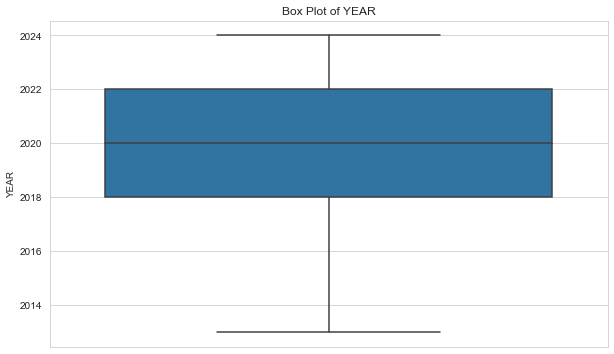

In [220]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=crashes_df, y='YEAR')
plt.title('Box Plot of YEAR')
plt.ylabel('YEAR')
plt.show()

نلاحظ انه لا يوجد تطرف في عامود سنة الحادث

### [ii]

In [297]:
merged_data = pd.merge(crashes_df, people_df, on='CRASH_RECORD_ID', suffixes=('_crash', '_person'))
# Filter out drivers from the people data
non_drivers = merged_data[merged_data['PERSON_TYPE'] == 'PASSENGER']
# number of non-drivers and their average age 
non_drivers_grouped = non_drivers.groupby(['CRASH_RECORD_ID', 'VEHICLE_ID']).agg(
    non_driver_count=('PERSON_TYPE', 'count'),
    average_age=('AGE', 'mean')
).reset_index()

In [298]:
# عدد الركاب 
value_counts = non_drivers_grouped['non_driver_count'].value_counts().sort_index()
# متوسط الاعمار 
average_age = non_drivers_grouped['average_age'].value_counts().sort_index()

# print(value_counts)
print(non_drivers_grouped['non_driver_count'].unique())
# print(average_age)
print(non_drivers_grouped['average_age'].unique())


[   2    8    4   12   24   48    3    1   16    9    6   32   40   10
   36   45    5   72   64   15   20   27   60   14  216   54   81  108
   42   56   18   90  128  160   80  320  180   38    7   96  192  104
  270   49   28   22   57  144  112  135  368  120   86   44  256   88
  184   34   30  225   26  136  168   52   84  480  118   21  162  132
  204   92  152   50  224  208   76   11  408  432 1080  420  200   58
   25  384  288  264   39   63   70   13  175  648   66  240   46   37
   33  140  232  272  250  125  176   68  248  400]
[26.         21.         26.5        ... 33.58333333 12.03571429
 16.40740741]


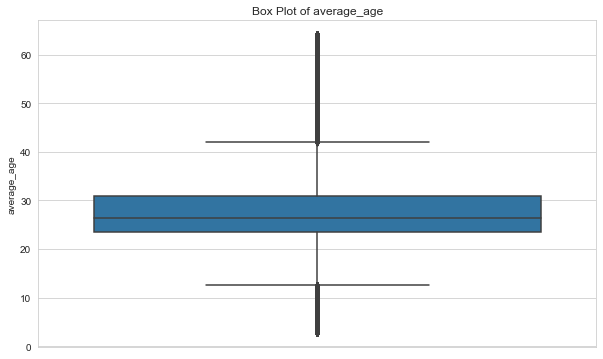

In [299]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=non_drivers_grouped, y='average_age')
plt.title('Box Plot of average_age')
plt.ylabel('average_age')
plt.show()

In [300]:
median_age = non_drivers_grouped['average_age'].median()
max_age = non_drivers_grouped['average_age'].max()
min_age = non_drivers_grouped['average_age'].min()

print('median age =',median_age)
print('max age =',max_age)
print('min age =',min_age)

median age = 26.333333333333332
max age = 64.0
min age = 3.0


In [301]:
Q1 = non_drivers_grouped['average_age'].quantile(0.40)
Q3 = non_drivers_grouped['average_age'].quantile(0.77)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

high_value = non_drivers_grouped[(non_drivers_grouped['average_age'] >= lower_bound - IQR) & (non_drivers_grouped['average_age'] < lower_bound)]['average_age'].max()
print('min age =',high_value)
non_drivers_grouped.loc[non_drivers_grouped['average_age'] < lower_bound, 'average_age'] = high_value

low_value = non_drivers_grouped[ (non_drivers_grouped['average_age'] <= upper_bound + IQR) &(non_drivers_grouped['average_age'] > upper_bound )]['average_age'].min()
print('max age =',low_value)
non_drivers_grouped.loc[non_drivers_grouped['average_age'] > upper_bound, 'average_age'] = low_value

min age = 16.9375
max age = 41.166666666666664


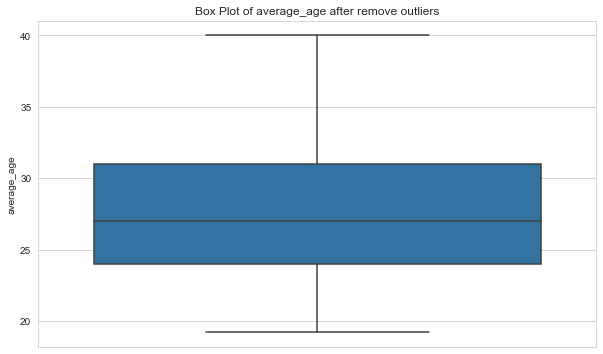

In [129]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=non_drivers_grouped, y='average_age')
plt.title('Box Plot of average_age after remove outliers')
plt.ylabel('average_age')
plt.show()

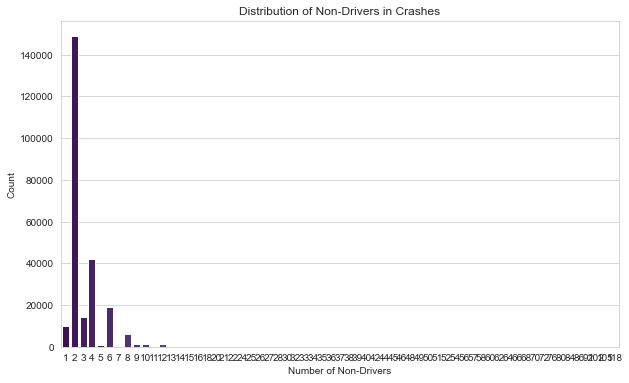

In [130]:
# Bar plot for non_driver_count
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.xlabel('Number of Non-Drivers')
plt.ylabel('Count')
plt.title('Distribution of Non-Drivers in Crashes')
plt.show()



In [143]:
# معلومات السائق الى الداتا الجديدة
merged_data = pd.merge(pd.merge(people_df, vehicles_df, on=['CRASH_RECORD_ID', 'VEHICLE_ID']), crashes_df, on='CRASH_RECORD_ID')
drivers_data = merged_data[merged_data['PERSON_TYPE'] == 'DRIVER']

# rename columns
drivers_info = drivers_data[['CRASH_RECORD_ID', 'VEHICLE_ID', 'SEX', 'AGE']]
drivers_info.rename(columns={'SEX': 'DRIVER_SEX', 'AGE': 'DRIVER_AGE'}, inplace=True)

non_drivers_grouped_with_driver_info = pd.merge(non_drivers_grouped, drivers_info, on=['CRASH_RECORD_ID', 'VEHICLE_ID'], how='left')


C:\Users\User\AppData\Local\Temp\ipykernel_17076\2117367203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drivers_info.rename(columns={'SEX': 'DRIVER_SEX', 'AGE': 'DRIVER_AGE'}, inplace=True)


In [144]:
#  في حال وجود بس السائق بالسيارة
crashes_df = pd.merge(crashes_df, non_drivers_grouped[['CRASH_RECORD_ID', 'non_driver_count']], on=['CRASH_RECORD_ID'], how='left')
crashes_df['non_driver_count'].fillna(0, inplace=True)

In [145]:
number_non_driver = crashes_df['non_driver_count'].value_counts().sort_index()
number_non_driver

0.0      603412
1.0        9791
2.0      148821
3.0       14341
4.0       42282
          ...  
86.0          4
92.0          2
102.0         1
105.0         2
118.0         1
Name: non_driver_count, Length: 64, dtype: int64

In [146]:
Q1 = crashes_df['non_driver_count'].quantile(0.25)
Q3 = crashes_df['non_driver_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = crashes_df[(crashes_df['non_driver_count'] < lower_bound) | (crashes_df['non_driver_count'] > upper_bound)]
outlier_counts = outliers['non_driver_count'].value_counts().sort_index()
# print(outlier_counts)

In [147]:
# replace outliers with mode()
mode_non_driver_count = crashes_df['non_driver_count'].mode()[0]

crashes_df.loc[(crashes_df['non_driver_count'] < lower_bound) | (crashes_df['non_driver_count'] > upper_bound), 'non_driver_count'] = mode_non_driver_count

outlier_counts = crashes_df['non_driver_count'].value_counts().sort_index()
print(outlier_counts)

0.0    634458
1.0      9791
2.0    148821
3.0     14341
4.0     42282
5.0       809
Name: non_driver_count, dtype: int64


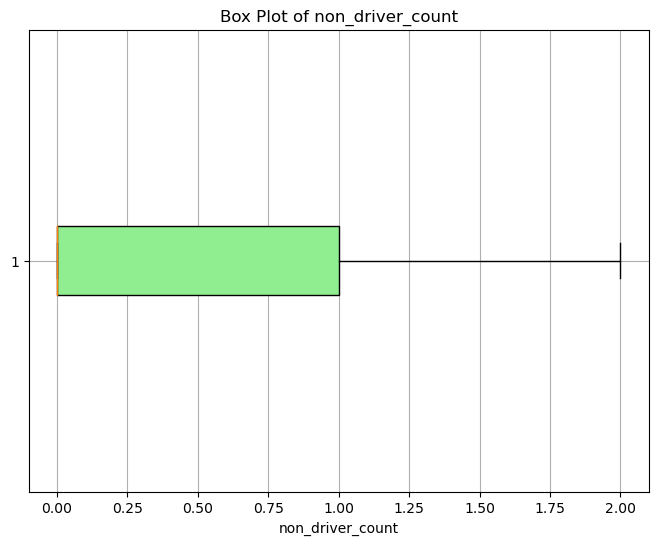

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(crashes_df['non_driver_count'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plot of non_driver_count')
plt.xlabel('non_driver_count')
plt.grid(True)
plt.show()

### [iii]

In [149]:
vehicle_counts = vehicles_df.groupby('CRASH_RECORD_ID')['VEHICLE_ID'].count().reset_index()
vehicle_counts.columns = ['CRASH_RECORD_ID', 'VEHICLE_COUNT']
print(vehicle_counts.head())

                                     CRASH_RECORD_ID  VEHICLE_COUNT
0  000013b0123279411e0ec856dae95ab9f0851764350b7f...              2
1  00002c0771fb6f2c70ba775b7f6b501608cadea85c1dd1...              2
2  000043c6564ec4d54bc4efd957d97ca97f38a965dd64b4...              1
3  00005696946846c8b8a1d378dba4e2a5ed84a9b2876fe0...              1
4  000070ed7a6357c3298f5edc6fb7d5ce925a10f46660f3...              2


In [150]:
vehicle_counts['VEHICLE_COUNT'].unique()

array([ 2,  1,  3,  4,  6,  5,  7,  8, 12, 11, 10,  9, 14, 18, 13, 15, 16],
      dtype=int64)

In [151]:
crashes_df = pd.merge(crashes_df, vehicle_counts[['CRASH_RECORD_ID', 'VEHICLE_COUNT']], on=['CRASH_RECORD_ID'], how='left')

In [152]:
# outliers
Q3 = crashes_df['VEHICLE_COUNT'].quantile(0.95)
IQR = Q3 
upper_bound = Q3 + 1.5 * IQR
outlier1= crashes_df[(crashes_df['VEHICLE_COUNT'] > upper_bound)]

print(f"Number of outliers in VEHICLE_COUNT column before replacements: {outlier1.shape[0]}")
crashes_df = crashes_df[ (crashes_df['VEHICLE_COUNT'] <= upper_bound)]


Number of outliers in VEHICLE_COUNT column before replacements: 274


In [153]:
# Remove outliers
outlier1.to_csv('chicago-traffic-dataset/large_vehicle_counts.csv', encoding='utf-8')

In [154]:
print(f"Number of non outliers in VEHICLE_COUNT column after replacements: {crashes_df.shape[0]}")

Number of non outliers in VEHICLE_COUNT column after replacements: 850091


### [iv]

In [155]:
# vehicles_df['CRASH_DATE'] = pd.to_datetime(vehicles_df['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

vehicles_df['VEHICLE_AGE'] = vehicles_df['CRASH_YEAR'] - vehicles_df['VEHICLE_YEAR']

print(vehicles_df['VEHICLE_AGE'].head())

0    14.0
1    13.0
2     8.0
3     5.0
4     4.0
Name: VEHICLE_AGE, dtype: float64


In [156]:
vehicles_df['VEHICLE_AGE'].unique()

array([14., 13.,  8.,  5.,  4.,  0., 10., 15.,  6.,  3.,  7., 11.,  9.,
       16.,  1., 19., 21.,  2., 18., 17., 12., 23., 20., 25., 22., 24.,
       40., 30., 29., 26., 33., 35., 28., 32., 27., 31., 37., 34., 42.,
       38., 44., 50., 45., 36., 43., 48., 39., 41., 49., 47., 51., 46.,
       52., 53.])

معالجة القيم المتطرفة في عمر المركبة

تم استبدال القيم المتطرفة الاكبر من الحد الاعلى ب القيمة الاصغر في ذلك المجال وهي 23

In [157]:
#outliers

Q3 = vehicles_df['VEHICLE_AGE'].quantile(0.64)
IQR = Q3 

upper_bound = Q3 + 1.5 * IQR

low_value = vehicles_df[ (vehicles_df['VEHICLE_AGE'] <= upper_bound + IQR) &(vehicles_df['VEHICLE_AGE'] > upper_bound )]['VEHICLE_AGE'].min()
print('max age =',low_value)
vehicles_df.loc[vehicles_df['VEHICLE_AGE'] > upper_bound, 'VEHICLE_AGE'] = low_value

max age = 23.0


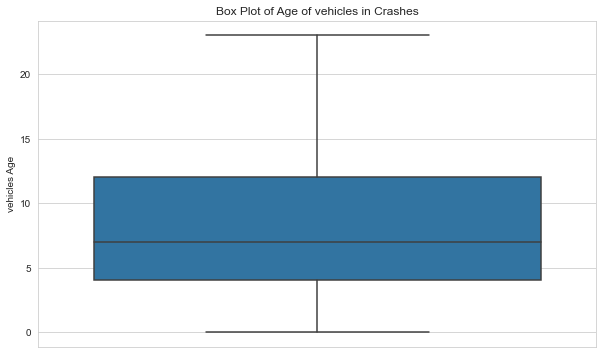

In [158]:
#VEHICLE_AGE
plt.figure(figsize=(10, 6))
sns.boxplot(data=vehicles_df, y='VEHICLE_AGE')
plt.title('Box Plot of Age of vehicles in Crashes')
plt.ylabel('vehicles Age')
plt.show()

نلاحظ ان عمر المركبات يتراوح بين 0 و20 

تتوزع القيم بين 5 و 10

متوسط العمر هو 7

In [159]:
# vehicles age CATEGORY
quantiles = vehicles_df['VEHICLE_AGE'].quantile([0.25, 0.5, 0.75])
median_age = vehicles_df['VEHICLE_AGE'].median()
max_age = vehicles_df['VEHICLE_AGE'].max()
min_age = vehicles_df['VEHICLE_AGE'].min()

# Define ranges
New_range = (min_age, median_age )
Old_range = (median_age , median_age + 8)
Antique_range = (median_age + 8,max_age)
print('median length =',median_age)
print('Short range =',New_range)
print('medium range =',Old_range)
print('Long range =',Antique_range)


def categorize_vehicle_age(age):
    if age <= New_range[1]:
        return 'New'
    elif age >= Antique_range[0]:
        return 'Antique'
    else:
        return 'Old'

vehicles_df['VEHICLE_AGE_category'] = vehicles_df['VEHICLE_AGE'].apply(categorize_vehicle_age)
vehicles_df[['VEHICLE_AGE', 'VEHICLE_AGE_category']].head()

median length = 7.0
Short range = (0.0, 7.0)
medium range = (7.0, 15.0)
Long range = (15.0, 23.0)


VEHICLE_AGE VEHICLE_AGE_category
0         14.0                  Old
1         13.0                  Old
2          8.0                  Old
3          5.0                  New
4          4.0                  New

In [160]:
unique_categories = vehicles_df['VEHICLE_AGE_category'].unique()
unique_categories_list = ', '.join(unique_categories)

print(unique_categories_list)

Old, New, Antique


### [v]

In [161]:
#0-4 New
#5-14 middle
#15> old
bins = [0, 10, 20, float('inf')]
labels = ['New', 'Middle', 'Old']
vehicles_df['VEHICLE_AGE_CATEGORY_bins'] = pd.cut(vehicles_df['VEHICLE_AGE'], bins=bins, labels=labels, right=False)
vehicles_df['VEHICLE_AGE_CATEGORY_bins'] = vehicles_df['VEHICLE_AGE_CATEGORY_bins'].astype('category')
print(vehicles_df[['VEHICLE_AGE', 'VEHICLE_AGE_CATEGORY_bins']].head())

   VEHICLE_AGE VEHICLE_AGE_CATEGORY_bins
0         14.0                    Middle
1         13.0                    Middle
2          8.0                       New
3          5.0                       New
4          4.0                       New


### [vi]

In [318]:
# إضافة عمود التهشير الجغرافي بدقة 6 أحرف
crashes_df['GEOHASH'] = crashes_df.apply(lambda row: geohash2.encode(row['LATITUDE'], row['LONGITUDE'], precision=6), axis=1)

# تجميع البيانات بناءً على التهشير الجغرافي
geohash_groups = crashes_df.groupby('GEOHASH').size().reset_index(name='CRASH_COUNT')

print(geohash_groups)

     GEOHASH  CRASH_COUNT
0     dp3svx           92
1     dp3svz           42
2     dp3syj           72
3     dp3sym           33
4     dp3syn          146
...      ...          ...
1108  dp3xhb         1082
1109  dp3xhc          897
1110  dp3xj0          758
1111  dp3xj1          692
1112  dp3xj4           13

[1113 rows x 2 columns]


### [vii]

In [228]:
# Filter geohash_groups to get regions with more than 3000 crash counts 
high_crash_regions = geohash_groups[geohash_groups['CRASH_COUNT'] > 2500] 
 
# Merge the high crash regions with the original crashes_df to get LATITUDE and LONGITUDE 
high_crash_details = pd.merge(crashes_df, high_crash_regions, on='GEOHASH') 
 
# Select relevant columns 
high_crash_details = high_crash_details[['CRASH_RECORD_ID', 'GEOHASH', 'LATITUDE', 'LONGITUDE', 'CRASH_COUNT',]] 
 
# Display the resulting DataFrame 
print(high_crash_details['GEOHASH'].unique())

['dp3tw1' 'dp3wtd' 'dp3wq4' 'dp3wm8' 'dp3wq1' 'dp3wmg' 'dp3w5z' 'dp3wmb'
 'dp3wm9' 'dp3tw2' 'dp3wjg' 'dp3wmf' 'dp3wnj' 'dp3w72' 'dp3wq6' 'dp3w7t'
 'dp3wmc' 'dp3w70' 'dp3w5y' 'dp3wq0' 'dp3w6b' 'dp3wjz' 'dp3wjx' 'dp3wq5'
 'dp3w5q' 'dp3tw5' 'dp3twb' 'dp3tqj' 'dp3wjt' 'dp3wje' 'dp3w7b' 'dp3wnp']


In [229]:
high_crash_details.to_csv('chicago-traffic-dataset/high_crash_regions.csv', encoding='utf-8')
print(f"Number of outliers in geohash_groups before replacements: {high_crash_details.shape[0]}")

Number of outliers in geohash_groups before replacements: 128951


In [230]:
geohash_groups = geohash_groups[geohash_groups['CRASH_COUNT'] <= 2500] 

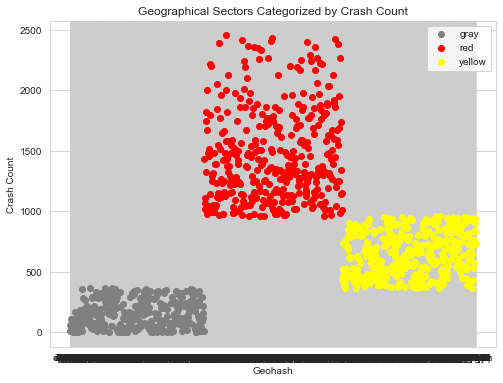

In [223]:
# إنشاء الفئات بناءً على توزيع عدد الحوادث
quantiles = geohash_groups['CRASH_COUNT'].quantile([0.33, 0.66])
low_threshold = quantiles[0.33]
high_threshold = quantiles[0.66]

def classify_sector(crash_count):
    if crash_count <= low_threshold:
        return 'gray'  # رمادي للفئة المنخفضة
    elif crash_count <= high_threshold:
        return 'yellow'  # أصفر للفئة المتوسطة
    else:
        return 'red'  # أحمر للفئة العالية

geohash_groups['CATEGORY'] = geohash_groups['CRASH_COUNT'].apply(classify_sector)

plt.figure(figsize=(8, 6))

for color, group in geohash_groups.groupby('CATEGORY'):
    plt.scatter(group['GEOHASH'], group['CRASH_COUNT'], label=color, color=color)

plt.xlabel('Geohash')
plt.ylabel('Crash Count')
plt.title('Geographical Sectors Categorized by Crash Count')
plt.legend()
plt.show()


### [viii]

In [163]:
#calc street LENGTH
# تحويل أطوال الشوارع من القدم إلى الكيلومتر
# 1 قدم = 0.0003048 كيلومتر
street_df['length_km'] = street_df['LENGTH'] * 0.0003048

In [216]:
#outliers
Q3 =street_df['length_km'].quantile(0.60)
IQR = Q3 
upper_bound = Q3 + 1.5 * IQR
outliers = street_df[ (street_df['length_km'] > upper_bound)]
print(f"Number of outliers in length km column before replacements: {outliers.shape[0]}")

Number of outliers in length km column before replacements: 28


In [217]:
street_df.loc[(street_df['length_km'] > upper_bound), 'length_km'] = 0.3

outliers_after = street_df[(street_df['length_km'] > upper_bound)]
print(f"Number of outliers in length_km column after replacements: {outliers_after.shape[0]}")
print("Outliers values after replacement (should be empty):")
print(outliers_after['length_km'].values)

Number of outliers in length_km column after replacements: 0
Outliers values after replacement (should be empty):
[]


In [211]:
street_df = street_df.rename(columns={
    'STREETNAME': 'STREET_NO',
    # 'STREET_NAM' : 'STREET_NAME' ,
})
street_df = street_df.drop_duplicates(subset=['STREET_NO'])

crashes_df = pd.merge(crashes_df, street_df[['STREET_NO','length_km']], on=['STREET_NO'], how='left')


In [212]:
nan_rows = crashes_df[crashes_df['length_km'].isna()]

print(f"Number of rows with NaN in LENGTH: {nan_rows.shape[0]}")

median_length = crashes_df['length_km'].median()
print('median length =',median_length)

crashes_df['length_km']= crashes_df['length_km'].fillna(median_length)

Number of rows with NaN in LENGTH: 490971
median length = 0.116555122604808


In [219]:
# LENGTH CATEGORY
quantiles = street_df['length_km'].quantile([0.25, 0.5, 0.75])
median_length = street_df['length_km'].median()
min_length = street_df['length_km'].min()
max_length = street_df['length_km'].max()
print('min length =',min_length)
print('max length =',max_length)
# Define ranges
Short_range = (min_length, median_length - 0.01)
medium_range = (median_length - 0.01, median_length + 0.1)
Long_range = (median_length + 0.1,max_length)
print('median length =',median_length)
print('Short range =',Short_range)
print('medium range =',medium_range)
print('Long range =',Long_range)


def classify_LENGTH_range(distance):
    if distance <= Short_range[1]:
        return 'short'
    elif distance >= Long_range[0]:
        return 'long'
    else:
        return 'medium'

street_df['LENGTH_CATEGORY'] = street_df['length_km'].apply(classify_LENGTH_range)

min length = 0.0035715143606399997
max length = 0.362253892278168
median length = 0.12254500113252
Short range = (0.0035715143606399997, 0.11254500113252)
medium range = (0.11254500113252, 0.22254500113252002)
Long range = (0.22254500113252002, 0.362253892278168)


In [158]:
street_df[['length_km' , 'LENGTH_CATEGORY']].head()

length_km LENGTH_CATEGORY
0   0.067229           short
1   0.202623          medium
2   0.202807          medium
3   0.046502           short
4   0.101404           short

In [159]:
street_df = street_df.drop_duplicates(subset=['STREET_NO'])

crashes_df = pd.merge(crashes_df, street_df[['STREET_NO', 'LENGTH_CATEGORY']], on=['STREET_NO'], how='left')


In [160]:
nan_rows = crashes_df[crashes_df['LENGTH_CATEGORY'].isna()]

print(f"Number of rows with NaN in LENGTH_CATEGORY: {nan_rows.shape[0]}")


Number of rows with NaN in LENGTH_CATEGORY: 553585


In [161]:
crashes_df['LENGTH_CATEGORY'].fillna('UNKNOWN')

0           short
1         UNKNOWN
2          medium
3           short
4         UNKNOWN
           ...   
966640    UNKNOWN
966641    UNKNOWN
966642    UNKNOWN
966643    UNKNOWN
966644    UNKNOWN
Name: LENGTH_CATEGORY, Length: 966645, dtype: object

In [72]:
from geopy.distance import geodesic

data = {
    'STREET_NO': ['Street A', 'Street A', 'Street B', 'Street B', 'Street B', 'Street C'],
    'LATITUDE': [41.8781, 41.8782, 41.8783, 41.8784, 41.8785, 41.8786],
    'LONGITUDE': [-87.6298, -87.6297, -87.6296,-87.6298, -87.6297, -87.6296]
    }
r_df = pd.DataFrame(data)

def haversine_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).kilometers

def calculate_street_length(group):
    # Sort by latitude and longitude (you might need to adjust this)
    sorted_group = group.sort_values(by=['LATITUDE', 'LONGITUDE'])
    # Calculate distances between consecutive points
    distances = []
    for i in range(1, len(sorted_group)):
        point1 = (sorted_group.iloc[i-1]['LATITUDE'], sorted_group.iloc[i-1]['LONGITUDE'])
        point2 = (sorted_group.iloc[i]['LATITUDE'], sorted_group.iloc[i]['LONGITUDE'])
        distances.append(haversine_distance(point1[0], point1[1], point2[0], point2[1]))
    
    total_length = np.sum(distances)
    return total_length

street_lengths = r_df.groupby('STREET_NO').apply(calculate_street_length).reset_index()
street_lengths.columns = ['STREET_NO', 'LENGTH_KM']
print(street_lengths)



  STREET_NO  LENGTH_KM
0  Street A   0.013866
1  Street B   0.033841
2  Street C   0.000000


### [ix]

In [162]:
polygon_df = pd.read_csv('chicago-traffic-dataset/chicago-CBD-boundary.csv')

In [163]:
polygon_gdf = gpd.GeoDataFrame(
    polygon_df, 
    geometry=polygon_df['the_geom'].apply(wkt.loads),
    crs="EPSG:4326"
)

polygon_gdf = polygon_gdf.to_crs(epsg=6933)

city_center = polygon_gdf.geometry.centroid.iloc[0]

crashes_df = gpd.GeoDataFrame(
    crashes_df, 
    geometry=gpd.points_from_xy(crashes_df.LONGITUDE, crashes_df.LATITUDE),
    crs="EPSG:4326"
)

crashes_df = crashes_df.to_crs(epsg=6933)

crashes_df['distance'] = crashes_df.geometry.apply(lambda x: x.distance(city_center))
crashes_df['distance'] = crashes_df['distance'] / 1000

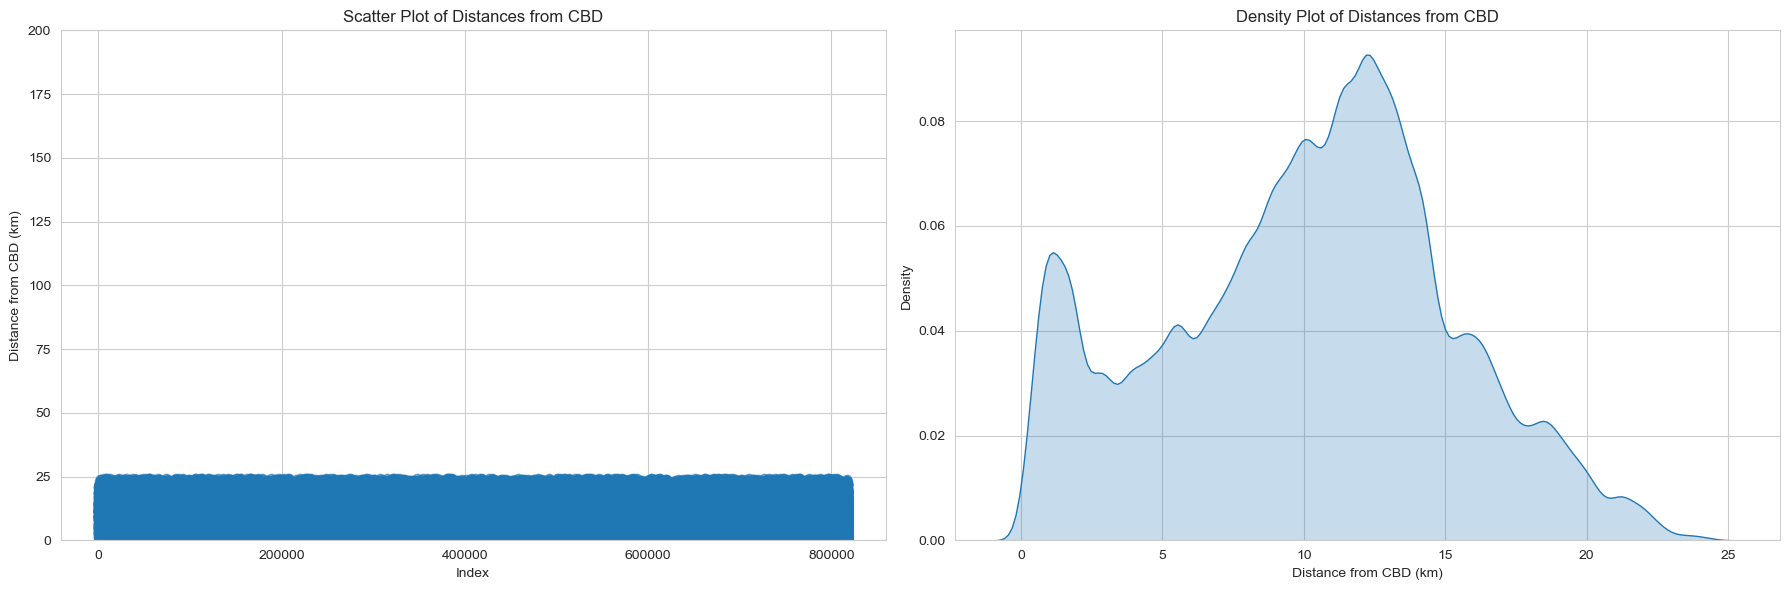

In [ ]:
all_distances = crashes_df['distance'].tolist()

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].scatter(range(len(all_distances)), all_distances, alpha=0.6)
axs[0].set_title('Scatter Plot of Distances from CBD')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Distance from CBD (km)')
axs[0].set_ylim(0, 200)

sns.kdeplot(all_distances, shade=True, ax=axs[1])
axs[1].set_title('Density Plot of Distances from CBD')
axs[1].set_xlabel('Distance from CBD (km)')
axs[1].set_ylabel('Density')

plt.tight_layout()

plt.show()


مخطط لمعرفة توزع قيم مسافة الحوادث عن المنطقة التجارية المركزية

In [165]:
median_distance = crashes_df['distance'].median()
max_distance = crashes_df['distance'].max()
min_distance = crashes_df['distance'].min()

print(median_distance)
print(max_distance)
print(min_distance)

10.530015251331372
9767.127396107324
0.004097499815269686


In [166]:
# classification ['near' , 'medium' , 'far']:
quantiles = crashes_df['distance'].quantile([0.25, 0.5, 0.75])

# Define ranges
near_range = (0, median_distance )
medium_range = (median_distance , median_distance + 5)
far_range = (median_distance + 5, max_distance)

def classify_distance_range(distance):
    if distance <= near_range[1]:
        return 'near'
    elif distance >= far_range[0]:
        return 'far'
    else:
        return 'medium'

crashes_df['distance_range'] = crashes_df['distance'].apply(classify_distance_range)


In [167]:
crashes_df['distance_range']

0           near
1         medium
2           near
3           near
4         medium
           ...  
966640    medium
966641      near
966642    medium
966643    medium
966644      near
Name: distance_range, Length: 966645, dtype: object

<AxesSubplot:>

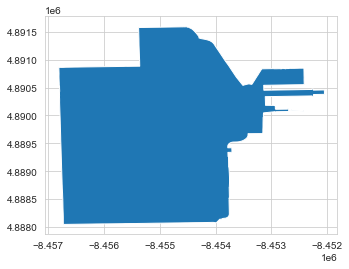

In [168]:
polygon_gdf.plot()

In [ ]:
Q1_long = crashes_df['distance'].quantile(0.25)
Q3_long = crashes_df['distance'].quantile(0.75)
IQR_long = Q3_long - Q1_long
lower_bound_long = Q1_long - 1.5 * IQR_long
upper_bound_long = Q3_long + 1.5 * IQR_long

outliers_long = crashes_df[
    (crashes_df['distance'] < lower_bound_long) | (crashes_df['distance'] > upper_bound_long)
]

print("Remaining outliers in distance:", outliers_long.shape[0])
print(outliers_long[['distance']].drop_duplicates().to_string(index=False))



Remaining outliers in distance: 305
 distance
24.015129
24.237209
24.322550
24.360820
24.436912
24.000322
24.195612
24.052090
24.439147
24.028150
24.049181
24.343341
23.924125
24.242596
24.348308
24.214263
24.041711
24.037055
24.114111
24.161290
24.513992
24.448251
24.095799
24.146676
24.206198
24.470954
24.071586
23.925983
24.070960
24.054831
24.044310
24.393646
23.972297
24.205128
24.264992
23.942187
24.413211
24.114595
23.927679
24.150462
24.057065
23.984910
23.933354
24.320833
24.147896
24.015052
24.008186
23.977544
24.285883
24.036654
24.476821
24.175922
24.355612
24.168710
24.127676
24.443970
24.402096
24.156426
24.051568
23.967805
24.054801
23.967431
23.932693
23.989474
24.231989
24.127202
23.946353
24.341688
24.010947
23.949113
23.962800
24.207075
24.329361
23.982454
24.173267
24.067303
24.317348
24.184698
24.017746
24.138601
24.331246
23.998012
23.971951
24.189239
24.365787
23.924795
24.054057
24.246127
24.384980
24.353757
24.221480
24.261641
24.006902
24.166167
24.098894
24.0

calculate Outliers in distance column and replace them with mean

In [ ]:
Q1 = crashes_df['distance'].quantile(0.25)
Q3 = crashes_df['distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = crashes_df[(crashes_df['distance'] < lower_bound) | (crashes_df['distance'] > upper_bound)]
print(f"Number of outliers in distance column before replacements: {outliers.shape[0]}")

Number of outliers in distance column before replacements: 305


In [ ]:
# median_distance = crashes_df['distance'].median()
median_distance = crashes_df['distance'].mean()
crashes_df['distance'] = np.where(
    (crashes_df['distance'] < lower_bound) | (crashes_df['distance'] > upper_bound),
    median_distance,
    crashes_df['distance']
)

outliers_after_replacement = crashes_df[
    (crashes_df['distance'] < lower_bound) | (crashes_df['distance'] > upper_bound)
]
print("Remaining outliers after replacement with mean:", outliers_after_replacement.shape[0])

Remaining outliers after replacement with median: 0


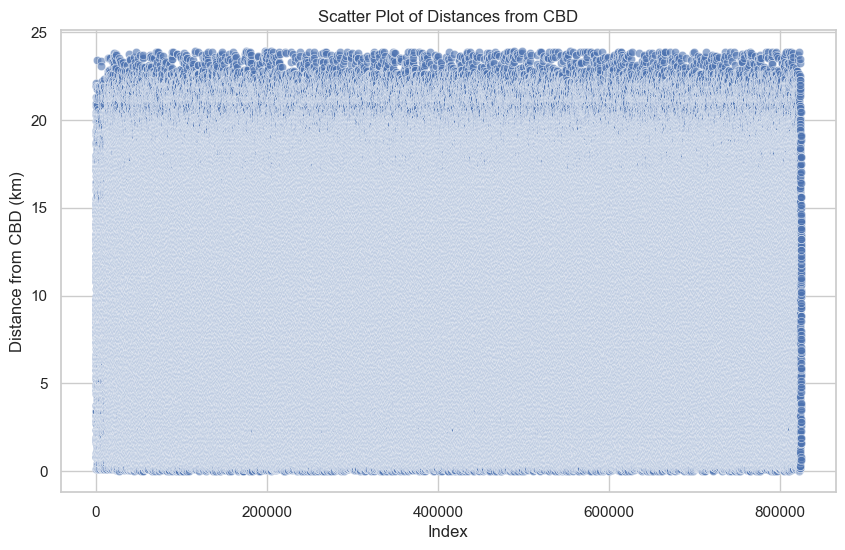

In [ ]:

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=crashes_df.index, y='distance', data=crashes_df, alpha=0.6)
plt.title('Scatter Plot of Distances from CBD')
plt.xlabel('Index')
plt.ylabel('Distance from CBD (km)')
plt.show()


In [ ]:
# Check for negative values in the 'distance' column
negative_distances = crashes_df[crashes_df['distance'] < 0]

print("Number of negative values in 'distance':", negative_distances.shape[0])

if not negative_distances.empty:
    print(negative_distances)


Number of negative values in 'distance': 0


### [x]

In [172]:
polygon = polygon_gdf.geometry.iloc[0]
crashes_df['inside_Area'] = crashes_df.geometry.apply(lambda x: 1 if x.within(polygon) else 0)
# row 29 == 1

### [xi]

In [173]:
police_boundries = pd.read_csv('chicago-traffic-dataset/chicago-police-beat-boundries.csv')

In [174]:
unique_beat_nums = police_boundries['BEAT_NUM'].unique()
# unique_beat_nums

In [175]:
crashes_df = gpd.GeoDataFrame(
    crashes_df, 
    geometry=gpd.points_from_xy(crashes_df.LONGITUDE, crashes_df.LATITUDE),
    crs="EPSG:4326"
)
crashes_df = crashes_df.to_crs(epsg=6933)

police_boundries = gpd.GeoDataFrame(
    police_boundries, 
    geometry=police_boundries['the_geom'].apply(wkt.loads),
    crs="EPSG:4326"
)
police_boundries = police_boundries.to_crs(epsg=6933)

In [176]:
crashes_df['police_beat'] = None

for idx, multipolygon in police_boundries.iterrows():
    multipolygon_geom = multipolygon.geometry
    beat_num = multipolygon.BEAT_NUM
    in_multipolygon = crashes_df.geometry.within(multipolygon_geom)
    
    crashes_df.loc[in_multipolygon, 'police_beat'] = beat_num

### [xii]

In [69]:
# creating bins for crash_hour 
# 0-4 Late Night
# 4-7 Early Morning 
# 7-12 Morning 
# 12-18 Afternoon
# 18-23 Late Evening 

bins = [0,4,7,12,18,23]
labels = ['Late Night','Early Morning','Morning', 'Afternoon','Late Evening']
crashes_df['hour_bins'] = pd.cut(crashes_df['CRASH_HOUR'], bins = bins, labels = labels, right=False)
crashes_df[['hour_bins' , 'CRASH_HOUR']].head(5)

hour_bins  CRASH_HOUR
0   Afternoon          14
1   Afternoon          17
2   Afternoon          14
3  Late Night           0
4   Afternoon          12

In [70]:
# Categorize Speed
bins_speed = [0, 20, 40, 60, 80, 100]
labels_speed = ['0-20', '21-40', '41-60', '61-80', '81-100']
crashes_df['speed'] = pd.cut(crashes_df['POSTED_SPEED_LIMIT'], bins=bins_speed, labels=labels_speed, include_lowest=True)

In [184]:
crashes_df.to_csv('chicago-traffic-dataset/crashes3.csv', encoding='utf-8')
people_df.to_csv('chicago-traffic-dataset/people3.csv', encoding='utf-8')
vehicles_df.to_csv('chicago-traffic-dataset/vehicles3.csv', encoding='utf-8')
street_df.to_csv('chicago-traffic-dataset/street3.csv', encoding='utf-8')

# Question [2]: Data Analysis and Information Discovery

In [21]:
people_df = pd.read_csv('chicago-traffic-dataset/people3.csv')
vehicles_df = pd.read_csv('chicago-traffic-dataset/vehicles3.csv')
crashes_df = pd.read_csv('chicago-traffic-dataset/crashes3.csv')
street_df = pd.read_csv('chicago-traffic-dataset/street3.csv')

## [a] Traffic Accidents Causes


### [i]

In [186]:
cause_counts = crashes_df['PRIM_CONTRIBUTORY_CAUSE_MAP'].value_counts()

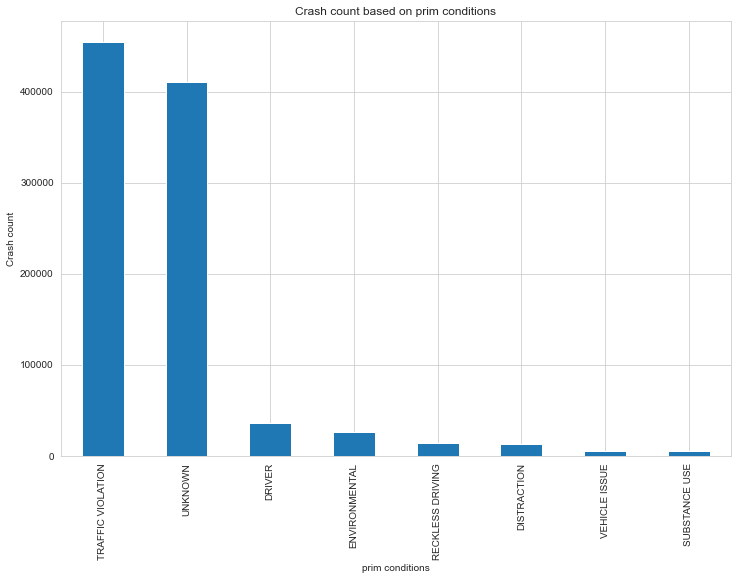

In [187]:
plt.figure(figsize=(12, 8))
cause_counts.plot(kind='bar')
plt.title('Crash count based on prim conditions')
plt.xlabel('prim conditions')
plt.ylabel('Crash count')
plt.xticks(rotation=90)  
plt.show()

نلاحظ وجود انزياح في الداتا وان معظم الحوادث تحدث بسبب المخالفات المرورية و اسباب غير المعروفة

### [ii]

In [88]:
lighting_condition_counts = crashes_df['LIGHTING_CONDITION'].value_counts()

damage_counts = crashes_df['DAMAGE'].value_counts()


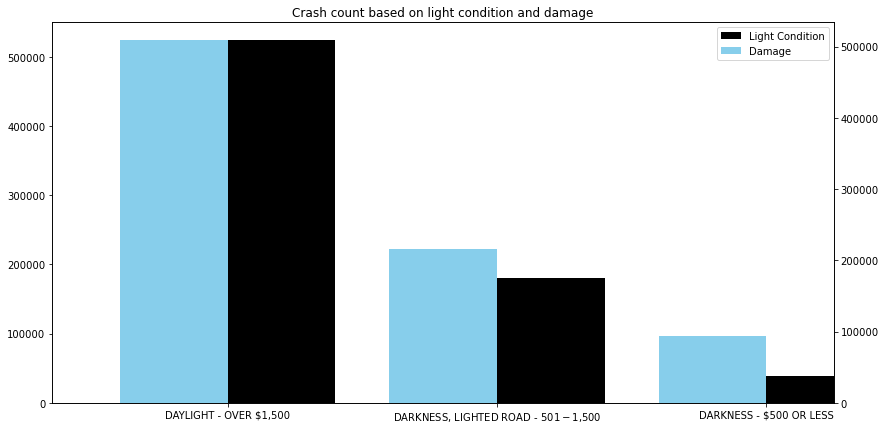

In [89]:
fig, ax1 = plt.subplots(figsize=(14, 7))

combined_labels = [f'{light} - {damage}' for light, damage in zip(lighting_condition_counts.index, damage_counts.index)]

lighting_condition_counts.plot(kind='bar', color='black', ax=ax1, position=0, width=0.4, label='Light Condition')

ax2 = ax1.twinx()
damage_counts.plot(kind='bar', color='skyblue', ax=ax2, position=1, width=0.4, label='Damage')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Crash count based on light condition and damage')
ax1.set_xticks(range(len(combined_labels)))
ax1.set_xticklabels(combined_labels, rotation=0)

plt.show()


نلاحظ ان في ظروف الاضاءة خلال النهار تكون الحوادث اكثر خطورة 
بينما في الظلام والطريق مضاء تكون الخطورة متوسطة
 اما في الظلام تكون الخطورة اقل منهما ربما السائقين يكونون أكثر حذرا

### [iii]

In [90]:
CRASH_TYPE_counts = crashes_df['CRASH_TYPE'].value_counts()

FIRST_CRASH_TYPE_counts = crashes_df['FIRST_CRASH_TYPE_map'].value_counts()

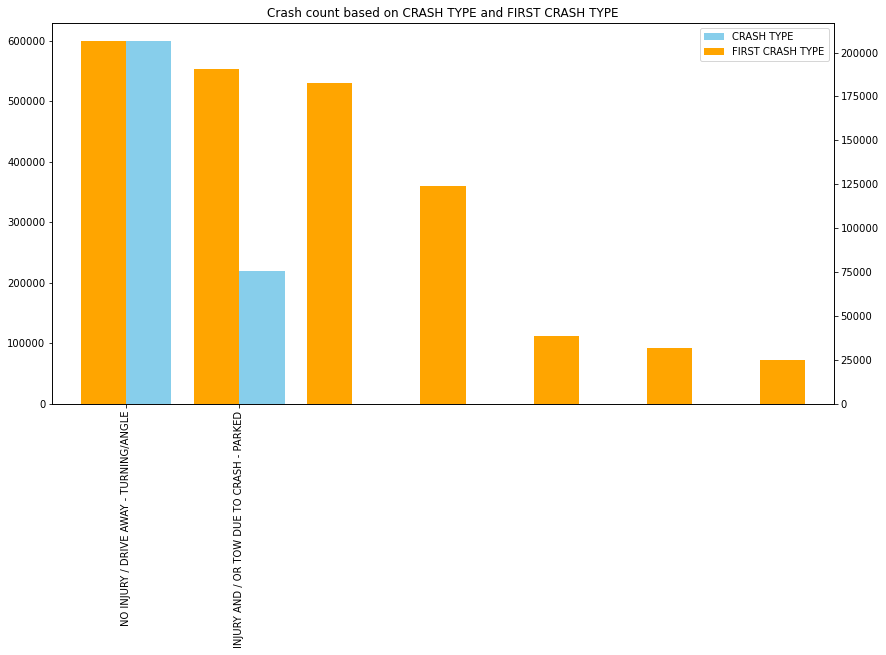

In [91]:
fig, ax1 = plt.subplots(figsize=(14, 7))

combined_labels = [f'{CRASH} - {FIRST}' for CRASH, FIRST in zip(CRASH_TYPE_counts.index, FIRST_CRASH_TYPE_counts.index)]

CRASH_TYPE_counts.plot(kind='bar', color='skyblue', ax=ax1, position=0, width=0.4, label='CRASH TYPE')

ax2 = ax1.twinx()
FIRST_CRASH_TYPE_counts.plot(kind='bar', color='orange', ax=ax2, position=1, width=0.4, label='FIRST CRASH TYPE')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Crash count based on CRASH TYPE and FIRST CRASH TYPE')
ax1.set_xticks(range(len(combined_labels)))
ax1.set_xticklabels(combined_labels, rotation=90)

plt.show()

بالنسبة لنوع الاصطدام الاول هناك توزيع متساوي نسبيًا بين الفئات المختلفة
 ونلاحظ ان نوع الاصطدام بدون اصابات هي الاكثر و غالبا تكون حالة الاصطدام الاول هي عند الدوران
 وان نوع الاصطدام مع جرحى غالبا تكون عند الاصطفاف

### [iv]

In [ ]:
TRAFFICWAY_TYPE_counts = crashes_df['TRAFFICWAY_TYPE_MAP'].value_counts()

lighting_condition_counts = crashes_df['LIGHTING_CONDITION'].value_counts()

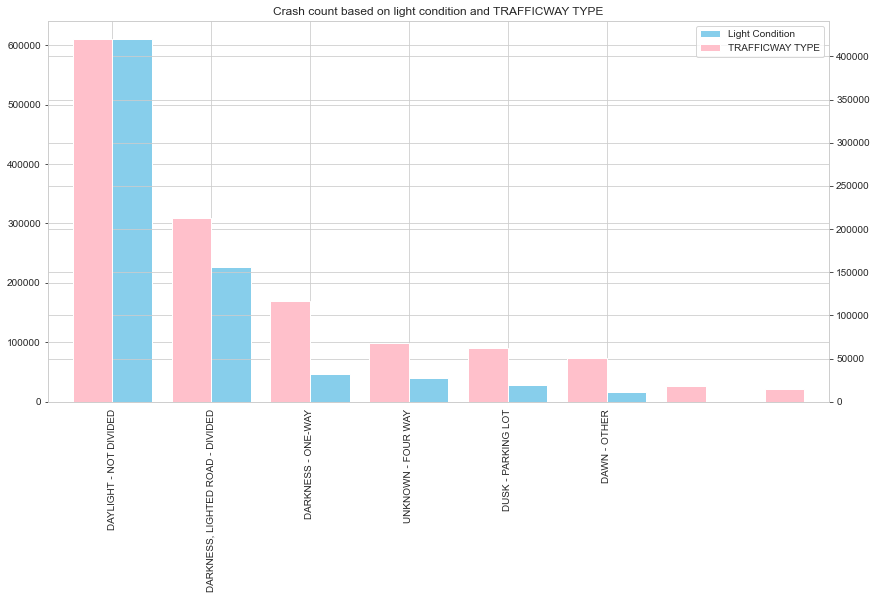

In [196]:
fig, ax1 = plt.subplots(figsize=(14, 7))

combined_labels = [f'{light} - {TRAFFICWAY}' for light, TRAFFICWAY in zip(lighting_condition_counts.index, TRAFFICWAY_TYPE_counts.index)]

lighting_condition_counts.plot(kind='bar', color='skyblue', ax=ax1, position=0, width=0.4, label='Light Condition')

ax2 = ax1.twinx()
TRAFFICWAY_TYPE_counts.plot(kind='bar', color='pink', ax=ax2, position=1, width=0.4, label='TRAFFICWAY TYPE')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Crash count based on light condition and TRAFFICWAY TYPE')
ax1.set_xticks(range(len(combined_labels)))
ax1.set_xticklabels(combined_labels, rotation=90)

plt.show()

نلاحظ ان معظم الحوادث تحدث في النهار وعلى الطرق غير المقسمة ربما بسبب الازدحام 
و في الاضاءة الليلية تكون الحوادث على الطرق المقسمة يدل ان تقسيم الطرق يساعد في تقليل الحوادث لكن لا يزيلها تماما

## [b] Traffic Accidents History


### [i]

In [197]:
CRASH_HOUR_counts = crashes_df['hour_bins'].value_counts()
damage_counts = crashes_df['DAMAGE'].value_counts()

In [198]:
bar_data = crashes_df.groupby(['hour_bins', 'DAMAGE']).size().reset_index(name='COUNT')

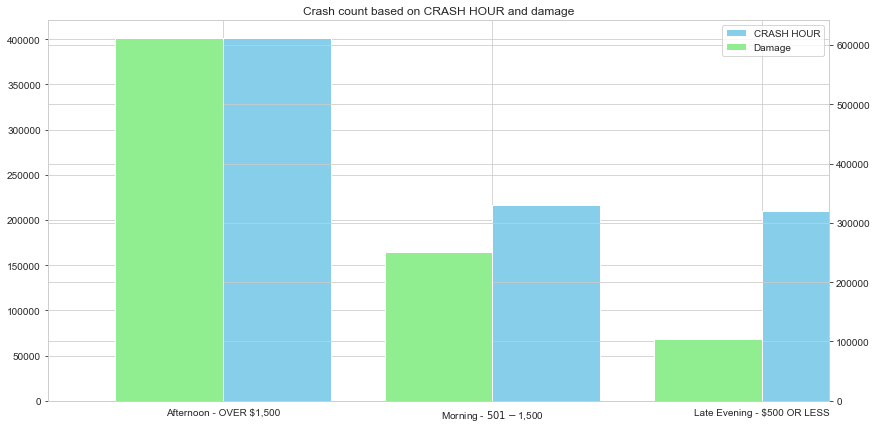

In [199]:
fig, ax1 = plt.subplots(figsize=(14, 7))

combined_labels = [f'{HOUR} - {damage}' for HOUR, damage in zip(CRASH_HOUR_counts.index, damage_counts.index)]

CRASH_HOUR_counts.plot(kind='bar', color='skyblue', ax=ax1, position=0, width=0.4, label='CRASH HOUR')

ax2 = ax1.twinx()
damage_counts.plot(kind='bar', color='lightgreen', ax=ax2, position=1, width=0.4, label='Damage')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Crash count based on CRASH HOUR and damage')
ax1.set_xticks(range(len(combined_labels)))
ax1.set_xticklabels(combined_labels, rotation=0)

plt.show()

نلاحظ ان في فترة الظهيرة مابين الساعة12-18 تكون الحوادث اكثر خطورة
وفي فترة الصباح مابين الساعة 7-12 تكون الخطورة متوسطة
وفي المساء مابين 18-23 تكون الخطورة اقل
  بينما في فترة الصباح الباكر و الليل تكون الخطورة قليلة ربما لانه وقت النوم او السائقين يكونون أكثر حذرا

### [ii]

In [200]:
monthly_counts = crashes_df.groupby(['YEAR', 'CRASH_MONTH']).size().reset_index(name='COUNT')

pivot_df = monthly_counts.pivot(index='CRASH_MONTH', columns='YEAR', values='COUNT')


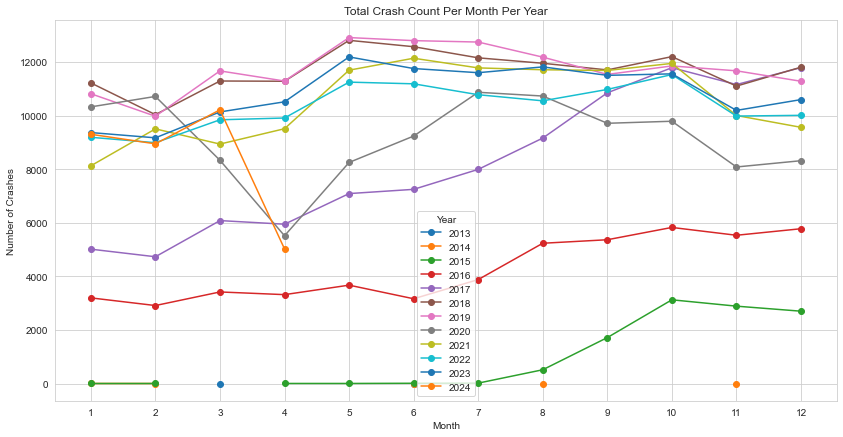

In [201]:
plt.figure(figsize=(14, 7))
for year in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[year], marker='o', label=year)

plt.title('Total Crash Count Per Month Per Year')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.legend(title='Year')
plt.xticks(pivot_df.index)
plt.grid(True)
plt.show()

نلاحظ ان في السنين الماضية ارتفع عدد الحوادث كثيرا و ان عدد الحوادث في الاشهر 5 6 7 يكون اكثر 

### [iii]

In [202]:
monthly_counts = crashes_df.groupby(['YEAR', 'CRASH_MONTH']).size().reset_index(name='COUNT')

<Figure size 1296x648 with 0 Axes>

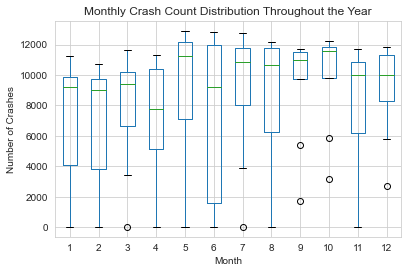

In [203]:
plt.figure(figsize=(18,9))
monthly_counts.boxplot(column='COUNT', by='CRASH_MONTH', grid=False)

plt.title('Monthly Crash Count Distribution Throughout the Year')
plt.suptitle('')   
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(range(1, 13))
plt.grid(True)

plt.show()

المتوسط ممثل بالخط الأخضر داخل كل صندوق يظهر أن معظم الأشهر لديها قيم متوسطة متقاربة
النقاط الدائرية خارج الحدود العلوية والسفلية للصناديق هي حالات التطرف.خاصة في أشهر مثل 3 7 9 10 12.
وجود هذه النقاط يعني أن هناك شهورًا شهدت عددًا غير معتاد من الحوادث سواء بزيادة كبيرة أو بنقصان كبير.

### [iv]

In [204]:
sunburst_data = crashes_df.groupby(['CRASH_DAY_OF_WEEK', 'DAMAGE']).size().reset_index(name='COUNT')

c:\Users\User\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\User\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



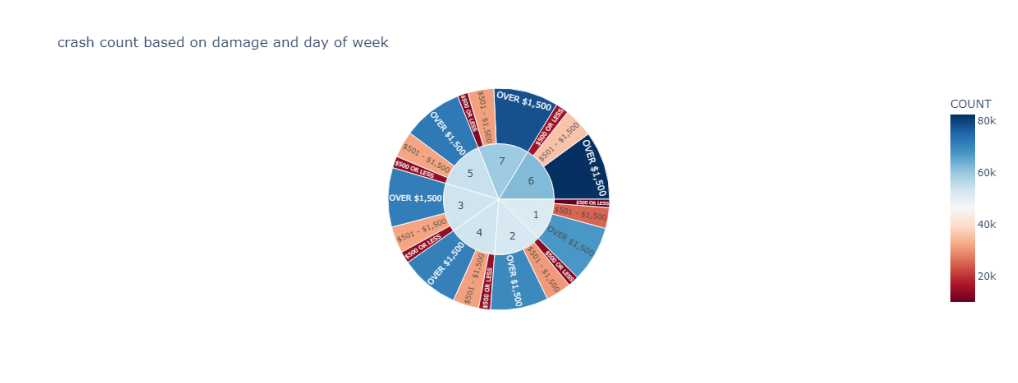

In [66]:
fig = px.sunburst(sunburst_data, 
                  path=['CRASH_DAY_OF_WEEK', 'DAMAGE'], 
                  values='COUNT', 
                  title='crash count based on damage and day of week',
                  color='COUNT', 
                  color_continuous_scale='RdBu')
# fig.show()

img = mpimg.imread('newplot.png')
plt.figure(figsize=(18, 9))
plt.imshow(img)
plt.axis('off') 
plt.show()

 أيام الاثنين و الأحد لديها أعلى عدد من الحوادث و أكثرها ضررا بالمقارنة مع الأيام الأخرى. يمكن أن يكون بسبب حركة المرور الكثيفة في بداية ونهاية الأسبوع
 و أن عدد الحوادث ينخفض قليلاً خلال منتصف الأسبوع (الثلاثاء، الأربعاء، الخميس)

## [c] Spatial Analysis


### [i]

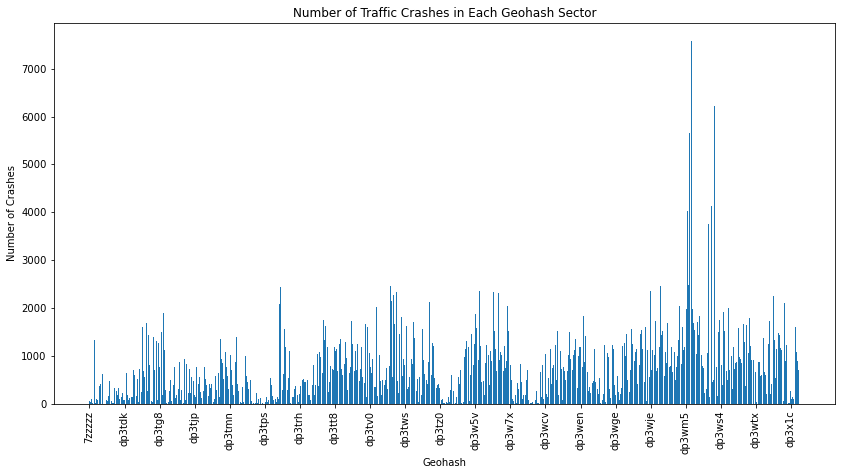

In [ ]:
# Group the data by geohash and count the number of crashes in each geohash
geohash_groups = crashes_df.groupby('GEOHASH').size().reset_index(name='CRASH_COUNT')

plt.figure(figsize=(14, 7))
plt.bar(geohash_groups['GEOHASH'], geohash_groups['CRASH_COUNT'])

plt.xticks(ticks=geohash_groups.index[::len(geohash_groups)//20], labels=geohash_groups['GEOHASH'][::len(geohash_groups)//20], rotation=90)

plt.xlabel('Geohash')
plt.ylabel('Number of Crashes')
plt.title('Number of Traffic Crashes in Each Geohash Sector')
plt.show()


 نلاحظ ان توزع الحوادث متساوي تقريبا في القطاعات ولكن يوجد قطاعين يحدث بهم الكثير من الحوادث 

### [ii]

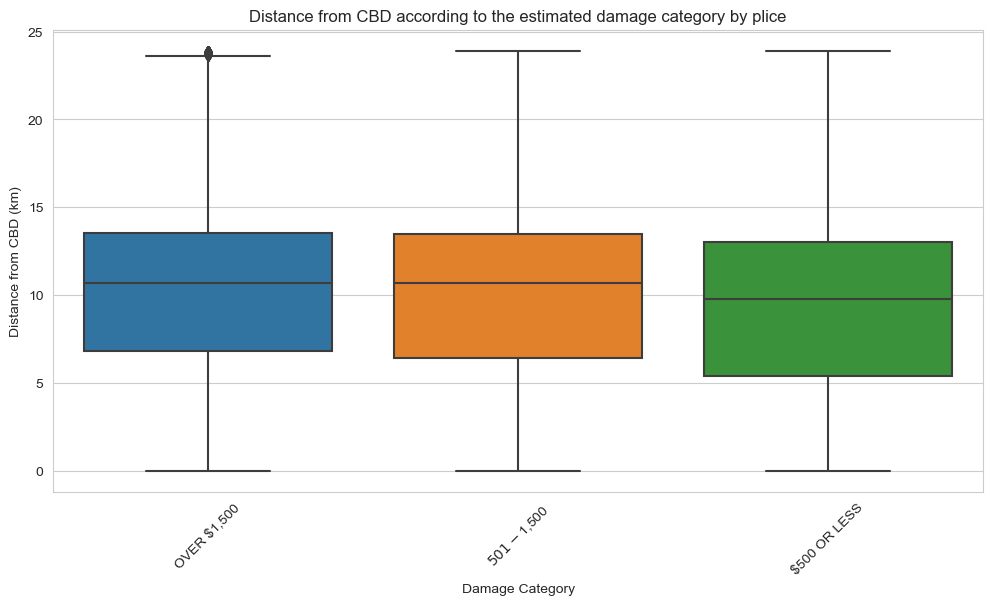

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=crashes_df, x='DAMAGE', y='distance')
plt.title('Distance from CBD according to the estimated damage category by plice')
plt.xlabel('Damage Category')
plt.ylabel('Distance from CBD (km)')
plt.xticks(rotation=45)
plt.show()

نلاحظ ان معظم الحوادث الحوادث كانت بمسافة بين 5 و 15 عن المنطقة التجارية المركزية

وان خطورة الحادث اكثر من 1500 المتوسط لها عند المسافة 11 او12

و الخطورة المتوسطة متوسطها عند 12 او 13

والخطورة القليلة متوسطها عند 9

اي ان تزيد خطورة الحادث كلما تم الابتعاد عن المنطقة المركزية

### [iii]

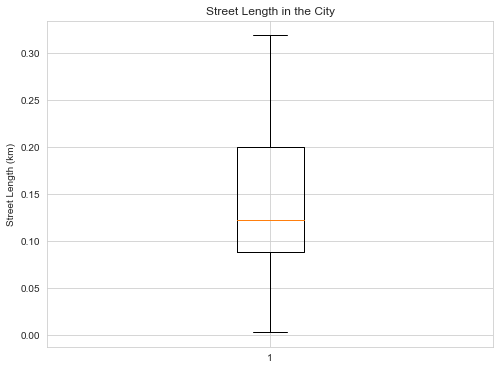

In [234]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(street_df['length_km'])

ax.set_title('Street Length in the City')
ax.set_ylabel('Street Length (km)')

plt.show()

  من المخطط نلاحظ ان اغلب الحوادث حدثت بالشوارع القصيرة في مجال بين 0.10 - 0.20

### [iv]

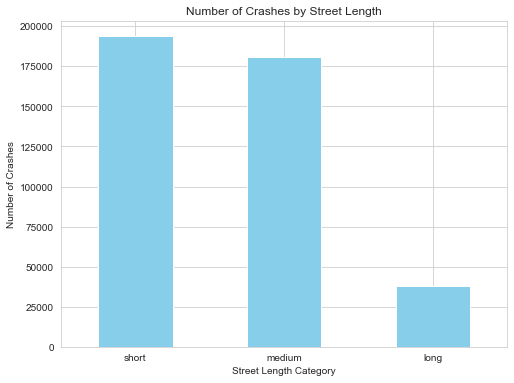

In [235]:
crash_counts = crashes_df['LENGTH_CATEGORY'].value_counts()

plt.figure(figsize=(8, 6))
crash_counts.plot(kind='bar', color='skyblue')

plt.title('Number of Crashes by Street Length')
plt.xlabel('Street Length Category')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.show()

من المخطط نلاحظ ان اغلب الحوادث حدثت بالشوارع المتوسطة

### [v]

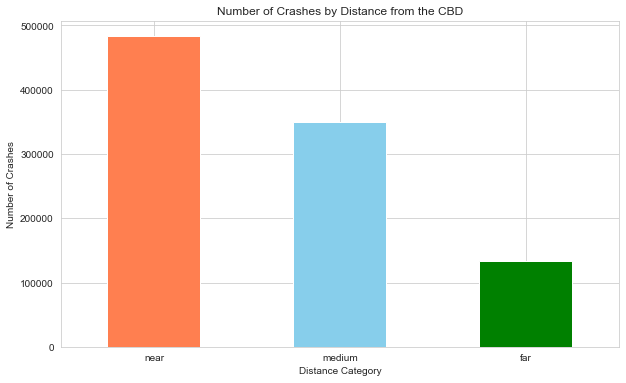

In [236]:
category_counts = crashes_df['distance_range'].value_counts().reindex(['near', 'medium', 'far'], fill_value=0)

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=['coral', 'skyblue', 'green'])
plt.title('Number of Crashes by Distance from the CBD')
plt.xlabel('Distance Category')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.show()

تقريبا نصف عدد الحوادث حدثت بالقرب من المنطقة التجارية المركزية
وكلما تم الابتعاد عن المنطقة عدد الحوادث يقل 

### [vi]

Chi-Square Test Statistic: 71.09168919278609
P-value: 1.3349771749935173e-14
There is a significant relationship between the distance_range and the LENGTH_CATEGORY.


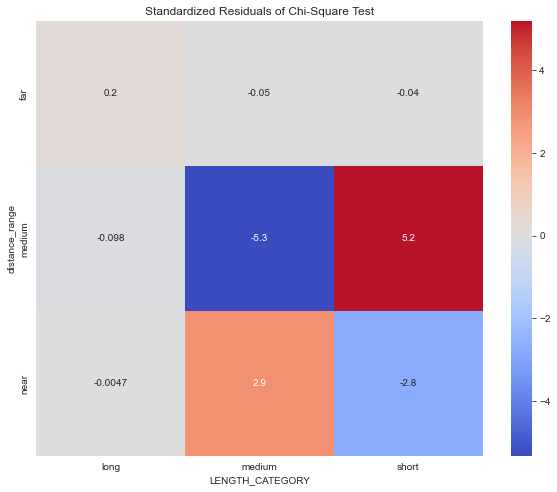

In [239]:
contingency_table11 = pd.crosstab(crashes_df['distance_range'],crashes_df['LENGTH_CATEGORY'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table11)

print(f'Chi-Square Test Statistic: {chi2}')
print(f'P-value: {p}')

# Interpretation
if p < 0.05:
    print("There is a significant relationship between the distance_range and the LENGTH_CATEGORY.")
else:
    print("There is no significant relationship between the distance_range and the LENGTH_CATEGORY.")
# Calculate residuals
residuals = (contingency_table11 - expected) / np.sqrt(expected)

# heatmap of residuals
plt.figure(figsize=(10, 8))
sns.heatmap(residuals, annot=True, cmap='coolwarm', center=0)
plt.title('Standardized Residuals of Chi-Square Test')
plt.xlabel('LENGTH_CATEGORY')
plt.ylabel('distance_range')
plt.show()

هناك ترابط بين طول الشارع و البعد عن المنطقة التجارية المركزية

اذا كان الطريق قصير هناك ترابط مع البعد المتوسط وعكسيا مع البعد القريب 

اذا كان الطريق متوسط يرتبط عكسيا مع البعد المتوسط و ترابط  مع البعد القريب 

## [d] Passengers Cases Analysis


### [i]

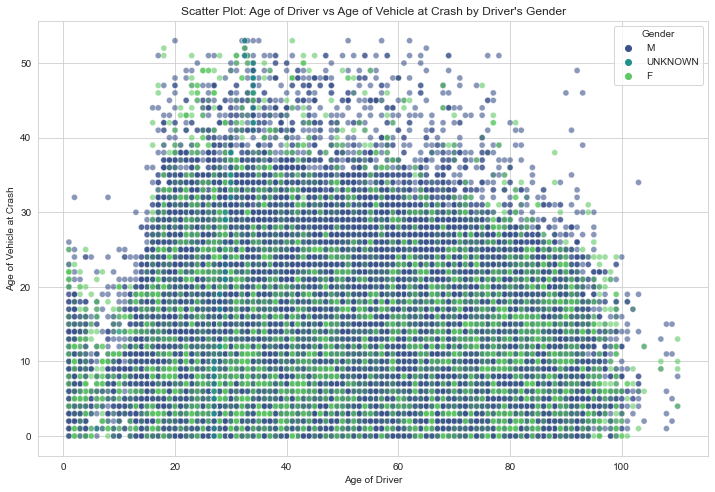

In [240]:
drivers_data = drivers_data[drivers_data['VEHICLE_AGE_AT_CRASH'] >= 0]

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=drivers_data, x='AGE', y='VEHICLE_AGE_AT_CRASH', hue='SEX', palette='viridis', alpha=0.6)
plt.xlabel('Age of Driver')
plt.ylabel('Age of Vehicle at Crash')
plt.title('Scatter Plot: Age of Driver vs Age of Vehicle at Crash by Driver\'s Gender')
plt.legend(title='Gender')

plt.show()

اغلب اعمار السائقين في المجال بين 20 و 60

وان اغلب اعمار المركبات في المجال بين 0 و 10 حيث تعتبر حديثة

وان جنس السائقين الذكور اكثر انتشار وارتكابا للحوادث و توزع الاناث و الغير معروف جنسهم تقريبا متساوي

نلاحظ ان الشباب اصغر من 20 يميلون اكثر لاستخدام المركبات الحديثة ويوجد بعض الحالات الاستثنائية

اما الكبار في العمراكبر من 60 يميلون لاستخدام المركبات القديمة ويوجد بعض حالات استثنائية


C:\Users\User\AppData\Local\Temp\ipykernel_3980\499195658.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Count')


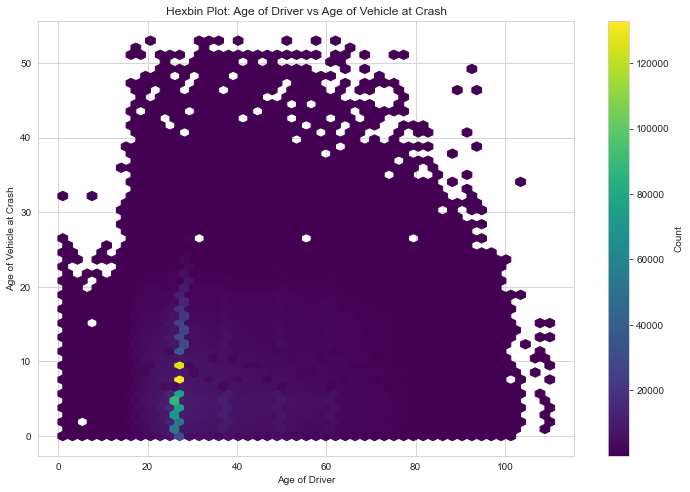

In [241]:
plt.figure(figsize=(12, 8))
plt.hexbin(drivers_data['AGE'], drivers_data['VEHICLE_AGE_AT_CRASH'], gridsize=50, cmap='viridis', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel('Age of Driver')
plt.ylabel('Age of Vehicle at Crash')
plt.title('Hexbin Plot: Age of Driver vs Age of Vehicle at Crash')

plt.show()

اللون الغامق البنفسجي يدل على كثافة اقل وكلما اصبح اللون افتح للاصفر يدل على كثافة اعلى

اغلب اعمار السائقين  في المجال بين 20 و 60

وان اغلب اعمار المركبات  في المجال بين 0 و 10 حيث تعتبر حديثة

نلاحظ ان الشباب اصغر من 20 يميلون اكثر لاستخدام المركبات الحديثة ويوجد بعض الحالات الاستثنائية

اما الكبار في العمراكبر من 60 يميلون لاستخدام المركبات القديمة ويوجد بعض حالات استثنائية

نلاحظ وجود كثافة عالية عند عمر السائقين بين 20 -40 و عمر المركبات بين 0-10
اي ان الحوادث تكون اكثر شيوعا في المركبات الحديثة و تلك الفئة العمرية

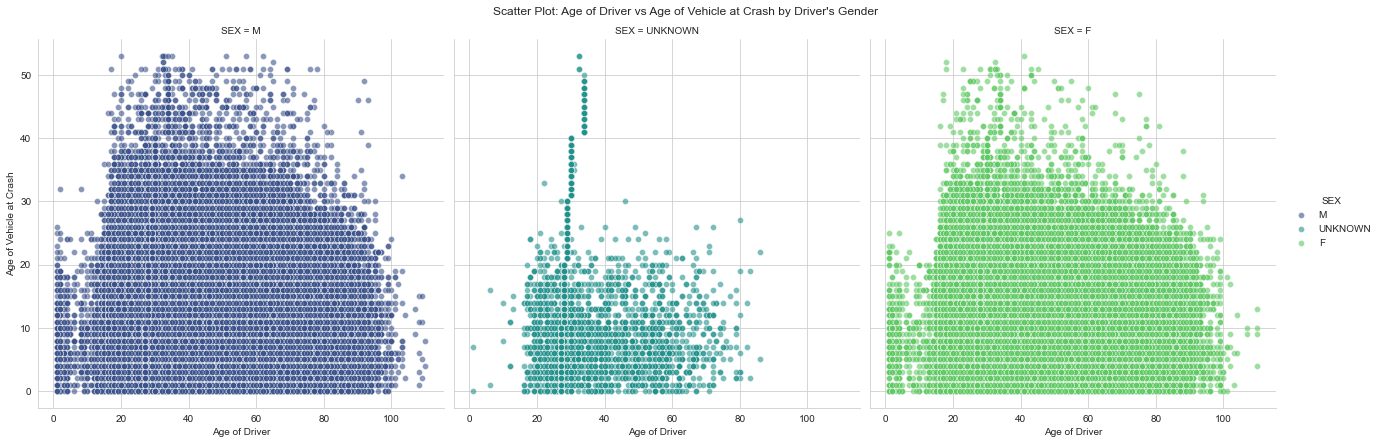

In [242]:
g = sns.FacetGrid(drivers_data, col="SEX", hue="SEX", col_wrap=3, palette="viridis", height=6)
g.map(sns.scatterplot, "AGE", "VEHICLE_AGE_AT_CRASH", alpha=0.6)
g.add_legend()
for ax in g.axes:
    ax.set_xlabel('Age of Driver')
    ax.set_ylabel('Age of Vehicle at Crash')
g.fig.suptitle('Scatter Plot: Age of Driver vs Age of Vehicle at Crash by Driver\'s Gender', y=1.02)

plt.show()

 مخطط الذكور و الاناث نلاحظ انه المخطط الاكثر توزع اي اغلب الحوادث يشارك فيه سائقين ذكور و اناث 

و اغلب اعمار السائقين بين 20-60 وتركيز ملحوظ بين 20-40
وان اغلب اعمار المركبات  في المجال بين 0 و 10 حيث تعتبر حديثة

تظهر المركبات بسائقين من جنس غير معروف توزيعًا أكثر اتساقًا، مع التركيز على المركبات الأحدث.

وكثيراً ما يتعرض كل من السائقين الذكور والإناث الذين تتراوح أعمارهم بين 20 و40 عاماً لحوادث، مما يشير إلى أن هذه الفئة العمرية قد تستفيد من حملات السلامة المستهدفة.
عادة ما تتعرض المركبات التي يتراوح عمرها من 0 إلى 10 سنوات لحوادث لجميع فئات الجنسين، مما يشير إلى أن المركبات الأحدث، على الرغم من ميزات السلامة المتقدمة التي تتمتع بها، ليست محصنة ضد الحوادث.

### [ii]

In [243]:
# Categorize ages
bins_driver_age = [0, 20, 40, 60, 80, 100]
labels_driver_age = ['0-20', '21-40', '41-60', '61-80', '81-100']
drivers_data['AGE_CATEGORY'] = pd.cut(drivers_data['AGE'], bins=bins_driver_age, labels=labels_driver_age, include_lowest=True)

bins_vehicle_age = [0, 10, 20, 30, 40, 50, 100]
labels_vehicle_age = ['0-10', '11-20', '21-30', '31-40', '41-50', '50+']
drivers_data['VEHICLE_AGE_CATEGORY'] = pd.cut(drivers_data['VEHICLE_AGE_AT_CRASH'], bins=bins_vehicle_age, labels=labels_vehicle_age, include_lowest=True)

contingency_table = pd.crosstab(drivers_data['AGE_CATEGORY'], drivers_data['VEHICLE_AGE_CATEGORY'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-Square Test Statistic: {chi2}')
print(f'P-value: {p}')

if p < 0.05:
    print("There is a significant relationship between the age category of vehicles and the age category of drivers.")
else:
    print("There is no significant relationship between the age category of vehicles and the age category of drivers.")


Chi-Square Test Statistic: 11866.577943482403
P-value: 0.0
There is a significant relationship between the age category of vehicles and the age category of drivers.


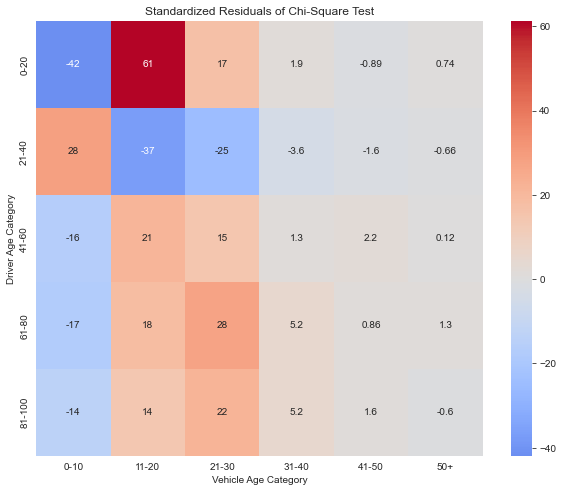

In [244]:
contingency_table = pd.crosstab(drivers_data['AGE_CATEGORY'], drivers_data['VEHICLE_AGE_CATEGORY'])

residuals = (contingency_table - expected) / np.sqrt(expected)

plt.figure(figsize=(10, 8))
sns.heatmap(residuals, annot=True, cmap='coolwarm', center=0)
plt.title('Standardized Residuals of Chi-Square Test')
plt.xlabel('Vehicle Age Category')
plt.ylabel('Driver Age Category')
plt.show()

نلاحظ ان هناك ارتباط بين عمر السائق وعمر المركبة 

هناك ارتباط قوي بين عمرالسائق بين 0-20 اي فئة الشباب و عمر المركبة بين 11-20 اي يميل الشباب لاستخدام مركبات متوسطة العمر  
وهناك ارتباط عكسي مع عمر المركبة بين 0-10 و ارتباط متوسط لعمر المركبة بين 21-30


هناك ارتباط متوسط بين عمرالسائق بين 21-40 و عمر المركبة بين 0-10    
وهناك ارتباط عكسي مع عمر المركبة بين 11-20 و لعمر المركبة بين 21-30
اي الفئة العمرية المتوسطة تميل لاستخدام مركبات حديثة فقط

هناك ارتباط عكسي لباقي الفئات العمرية بين 41-60 و 61-80 و 81-100 
و عمر المركبة بين 0-10 اي لا يميلون لاستخدام مركبات حديثة   
وهناك ارتباط متوسط مع عمر المركبة بين 11-20 و 21-30

### [iii]

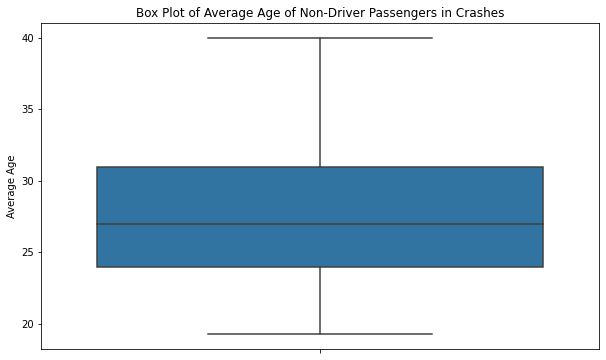

In [43]:
#average_age for Passengers
plt.figure(figsize=(10, 6))
sns.boxplot(data=non_drivers_grouped, y='average_age')
plt.title('Box Plot of Average Age of Non-Driver Passengers in Crashes')
plt.ylabel('Average Age')
plt.show()

نلاحظ ان متوسط عمر الركاب يتراوح بين 20 و 40

و تتوزع القيم بين 25 و 30

وان القيمة المتوسطة هي 27

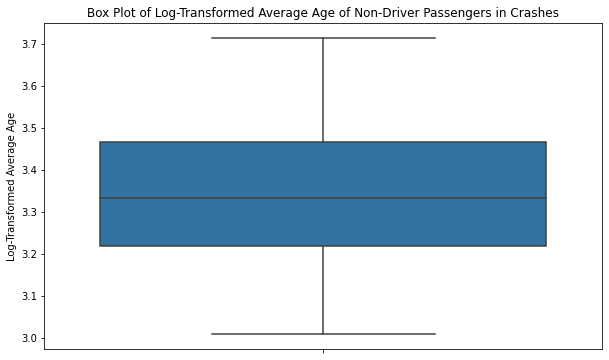

In [44]:
# Apply log transformation to average_age to reduce skewness
non_drivers_grouped['log_average_age'] = np.log1p(non_drivers_grouped['average_age'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=non_drivers_grouped, y='log_average_age')
plt.title('Box Plot of Log-Transformed Average Age of Non-Driver Passengers in Crashes')
plt.ylabel('Log-Transformed Average Age')
plt.show()

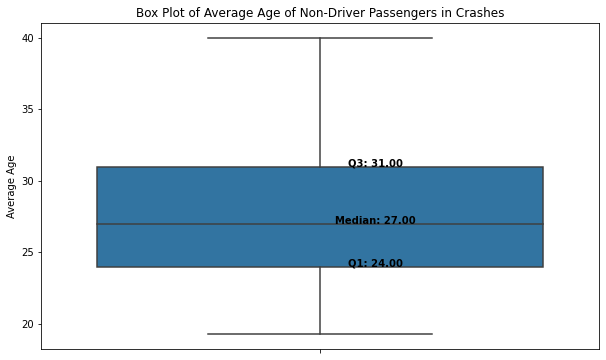

In [45]:
#  average_age with annotations
plt.figure(figsize=(10, 6))
sns.boxplot(data=non_drivers_grouped, y='average_age')
plt.title('Box Plot of Average Age of Non-Driver Passengers in Crashes')
plt.ylabel('Average Age')

median_age = non_drivers_grouped['average_age'].median()
plt.text(0.1, median_age, f'Median: {median_age:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')

q1_age = non_drivers_grouped['average_age'].quantile(0.25)
plt.text(0.1, q1_age, f'Q1: {q1_age:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')

q3_age = non_drivers_grouped['average_age'].quantile(0.75)
plt.text(0.1, q3_age, f'Q3: {q3_age:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.show()

القيمة المتوسطة لمتوسط العمر هي 27



### [iv]

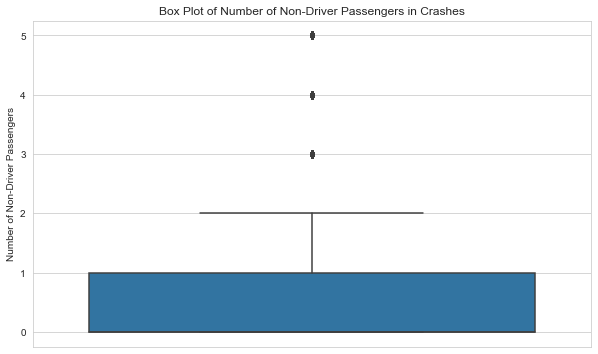

In [340]:
# non_driver_count
plt.figure(figsize=(10, 6))
sns.boxplot(data=crashes_df, y='non_driver_count')
plt.title('Box Plot of Number of Non-Driver Passengers in Crashes')
plt.ylabel('Number of Non-Driver Passengers')
plt.show()

نلاحظ ان عدد الركاب يتوزع بين 0 و1 في  معظم الحوادث

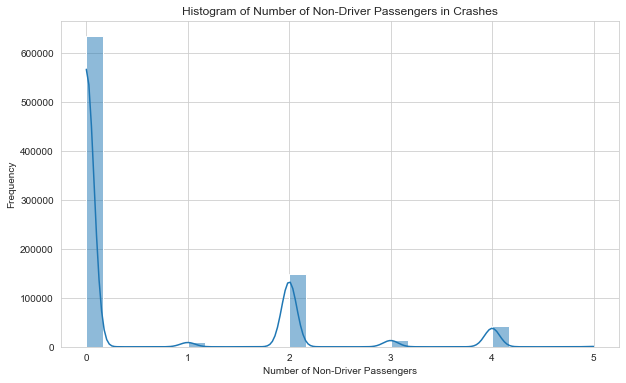

In [341]:
plt.figure(figsize=(10, 6))
sns.histplot(crashes_df['non_driver_count'], bins=30, kde=True)
plt.title('Histogram of Number of Non-Driver Passengers in Crashes')
plt.xlabel('Number of Non-Driver Passengers')
plt.ylabel('Frequency')
plt.show()

نلاحظ ان توزع عدد الركاب يتوزع عن الصفر اي لا يوجد ركاب فقط سائق
وعند 2 

### [v]

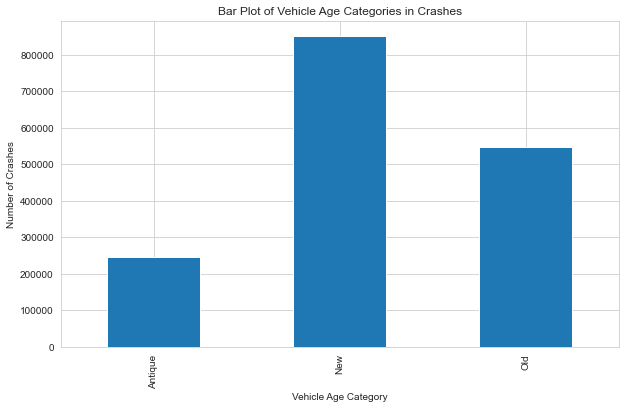

In [250]:
vehicle_age_counts = vehicles_df['VEHICLE_AGE_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
vehicle_age_counts.plot(kind='bar')
plt.title('Bar Plot of Vehicle Age Categories in Crashes')
plt.xlabel('Vehicle Age Category')
plt.ylabel('Number of Crashes')
plt.show()

 نلاحظ ان المركبات الحديثة يرتكب بها حوادث اكثر ربما لان فئة الشباب ترغب بها اكثر

## [e] Outlier Detection

### [i]

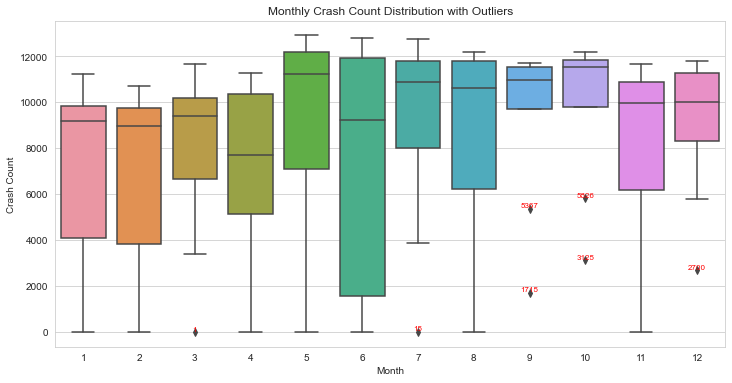

outliers data
mounth: 9, crash count:1
mounth: 11, crash count:15
mounth: 1, crash count:1715
mounth: 1, crash count:5367
mounth: 3, crash count:3125
mounth: 3, crash count:5826
mounth: 2, crash count:2700


In [251]:
#outliers for Monthly Crash Count
monthly_counts = crashes_df.groupby(['YEAR', 'CRASH_MONTH']).size().reset_index(name='COUNT')

plt.figure(figsize=(12, 6))

ax = sns.boxplot(x='CRASH_MONTH', y='COUNT', data=monthly_counts)

outliers = []
for line in ax.get_lines():
    if line.get_linestyle() == 'None':  
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        outliers.extend(zip(xdata, ydata))

for x, y in outliers:
    plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=8, color='red')

plt.title('Monthly Crash Count Distribution with Outliers')
plt.xlabel('Month')
plt.ylabel('Crash Count')

plt.show()

outliers_list = [(crashes_df['CRASH_MONTH'].unique()[int(x)], y) for x, y in outliers]
print("outliers data")
outliers_data = []
for month, count in outliers_list:
    outliers_data.append(crashes_df[(crashes_df['CRASH_MONTH'] == month) ])
    print(f"mounth: {month}, crash count:{int(count)}")

outliers_data = pd.concat(outliers_data)


  DEVICE_CONDITION وTRAFFIC_CONTROL_DEVICE نلاحظ وجود حالات تطرف لعدد الحوادث الشهرية و من الممكن ان يكون احد اسباب تطرف هذه الحوادث هي

In [ ]:
# outliers_data.head()

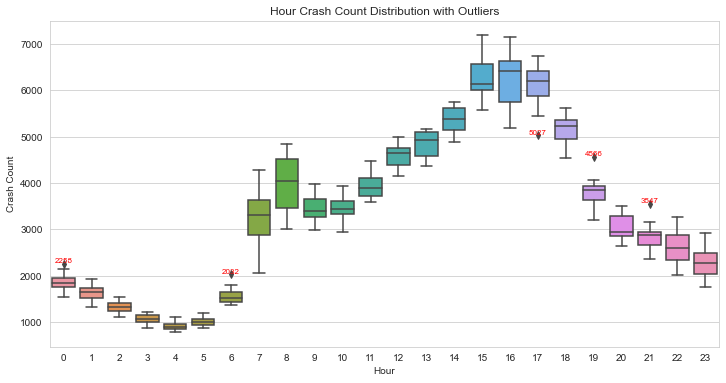

outliers data
CRASH_HOUR: 14, crash count:2258
CRASH_HOUR: 18, crash count:2032
CRASH_HOUR: 23, crash count:5027
CRASH_HOUR: 4, crash count:4566
CRASH_HOUR: 3, crash count:3547


In [252]:
#outliers for Monthly Crash Count
counts = crashes_df.groupby(['CRASH_MONTH', 'CRASH_HOUR']).size().reset_index(name='COUNT')

plt.figure(figsize=(12, 6))

ax = sns.boxplot(x='CRASH_HOUR', y='COUNT',data=counts)

outliers = []
for line in ax.get_lines():
    if line.get_linestyle() == 'None':  
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        outliers.extend(zip(xdata, ydata))

for x, y in outliers:
    plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=8, color='red')

plt.title('Hour Crash Count Distribution with Outliers')
plt.xlabel('Hour')
plt.ylabel('Crash Count')

plt.show()

outliers_list = [(crashes_df['CRASH_HOUR'].unique()[int(x)], y) for x, y in outliers]
print("outliers data")
outliers_data2 = []
for hour, count in outliers_list:
    outliers_data2.append(crashes_df[(crashes_df['CRASH_HOUR'] == hour) ])
    print(f"CRASH_HOUR: {hour}, crash count:{int(count)}")

outliers_data2 = pd.concat(outliers_data2)


 نلاحظ وجود حالات تطرف لعدد الحوادث بالنسبة ل ساعة الحادث 
 من الممكن ان يكون السبب الازدحام في ساعات الزروة او الصباح الباكر بسبب الضباب و ظروف الرؤية

In [ ]:
# outliers_data2.head()

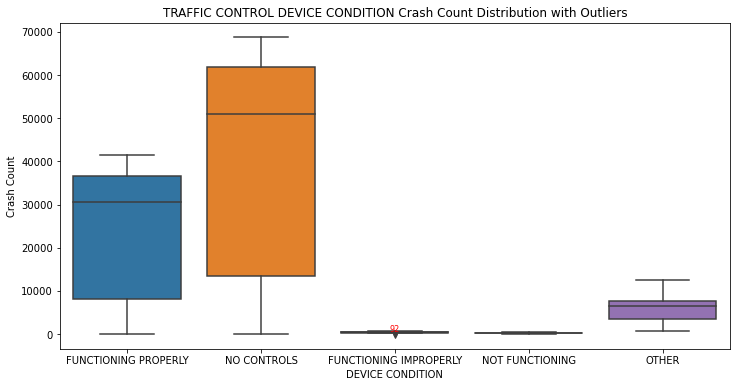

outliers data
DEVICE_CONDITION: FUNCTIONING IMPROPERLY, crash count:92


In [96]:
#outliers for crash count based on  TRAFFIC_CONTROL DEVICE CONDITION AND YEAR
counts = crashes_df.groupby(['YEAR', 'DEVICE_CONDITION']).size().reset_index(name='COUNT')

plt.figure(figsize=(12, 6))

ax = sns.boxplot(x='DEVICE_CONDITION', y='COUNT',data=counts)

outliers = []
for line in ax.get_lines():
    if line.get_linestyle() == 'None':  
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        outliers.extend(zip(xdata, ydata))

for x, y in outliers:
    plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=8, color='red')

plt.title('TRAFFIC CONTROL DEVICE CONDITION Crash Count Distribution with Outliers')
plt.xlabel('DEVICE CONDITION')
plt.ylabel('Crash Count')

plt.show()

outliers_list = [(crashes_df['DEVICE_CONDITION'].unique()[int(x)], y) for x, y in outliers]
print("outliers data")
outliers_data3 = []
for cond, count in outliers_list:
    outliers_data3.append(crashes_df[(crashes_df['DEVICE_CONDITION'] == cond) ])
    print(f"DEVICE_CONDITION: {cond}, crash count:{int(count)}")

outliers_data3 = pd.concat(outliers_data3)


نلاحظ وجود حالات تطرف بالنسبة ل حالة جهاز المرور 

In [ ]:
# outliers_data3.head()

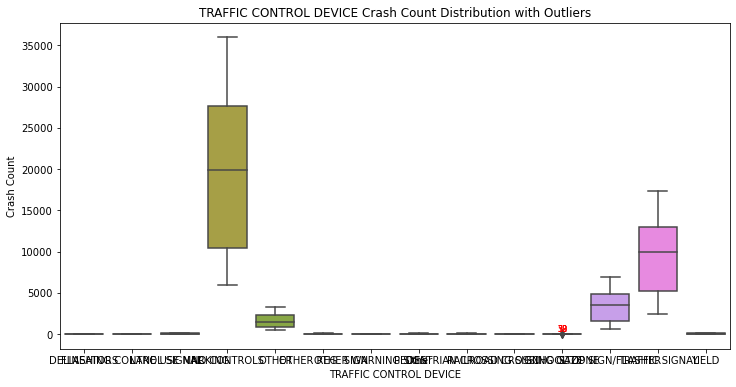

outliers data
TRAFFIC_CONTROL_DEVICE: Other, crash count:39
TRAFFIC_CONTROL_DEVICE: Other, crash count:70
TRAFFIC_CONTROL_DEVICE: Other, crash count:32
TRAFFIC_CONTROL_DEVICE: Other, crash count:58


In [97]:
#outliers for crash count based on TRAFFIC_CONTROL DEVICE CONDITION AND YEAR
counts = crashes_df.groupby(['CRASH_HOUR', 'TRAFFIC_CONTROL_DEVICE']).size().reset_index(name='COUNT')

plt.figure(figsize=(12, 6))

ax = sns.boxplot(x='TRAFFIC_CONTROL_DEVICE', y='COUNT',data=counts)

outliers = []
for line in ax.get_lines():
    if line.get_linestyle() == 'None':  
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        outliers.extend(zip(xdata, ydata))

for x, y in outliers:
    plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=8, color='red')

plt.title('TRAFFIC CONTROL DEVICE Crash Count Distribution with Outliers')
plt.xlabel('TRAFFIC CONTROL DEVICE')
plt.ylabel('Crash Count')

plt.show()

outliers_list = [(crashes_df['TRAFFIC_CONTROL_DEVICE'].unique()[int(x)], y) for x, y in outliers]
print("outliers data")
outliers_data6 = []
for cond, count in outliers_list:
    outliers_data6.append(crashes_df[(crashes_df['TRAFFIC_CONTROL_DEVICE'] == cond) ])
    print(f"TRAFFIC_CONTROL_DEVICE: {cond}, crash count:{int(count)}")

outliers_data6 = pd.concat(outliers_data6)


نلاحظ وجود حالات تطرف بالنسبة ل جهاز تحكم المرور 

In [ ]:
# outliers_data6.head()

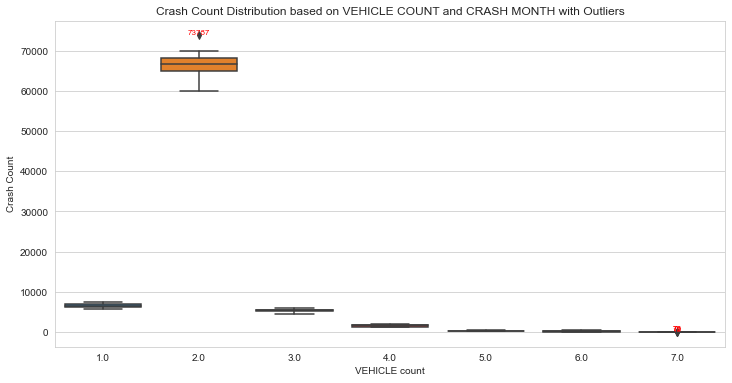

outliers data
VEHICLE_COUNT: 1.0, crash count:73787
VEHICLE_COUNT: 7.0, crash count:13
VEHICLE_COUNT: 7.0, crash count:78
VEHICLE_COUNT: 7.0, crash count:79


In [255]:
#outliers for Crash Count Distribution based on VEHICLE COUNT and CRASH MONTH
counts = crashes_df.groupby(['CRASH_MONTH', 'VEHICLE_COUNT']).size().reset_index(name='COUNT')

plt.figure(figsize=(12, 6))

ax = sns.boxplot(x='VEHICLE_COUNT', y='COUNT',data=counts)

outliers = []
for line in ax.get_lines():
    if line.get_linestyle() == 'None':  
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        outliers.extend(zip(xdata, ydata))

for x, y in outliers:
    plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=8, color='red')

plt.title('Crash Count Distribution based on VEHICLE COUNT and CRASH MONTH with Outliers')
plt.xlabel('VEHICLE count')
plt.ylabel('Crash Count')

plt.show()

outliers_list = [(crashes_df['VEHICLE_COUNT'].unique()[int(x)], y) for x, y in outliers]
print("outliers data")
outliers_data4 = []
for vcount, count in outliers_list:
    outliers_data4.append(crashes_df[(crashes_df['VEHICLE_COUNT'] == vcount) ])
    print(f"VEHICLE_COUNT: {vcount}, crash count:{int(count)}")

outliers_data4 = pd.concat(outliers_data4)


نلاحظ وجود حالات تطرف بالنسبة ل عدد المركبات في الحادث لان عدد المركبات الكبير يكون حالة متطرفة وغريبة  

In [ ]:
# outliers_data4.head()

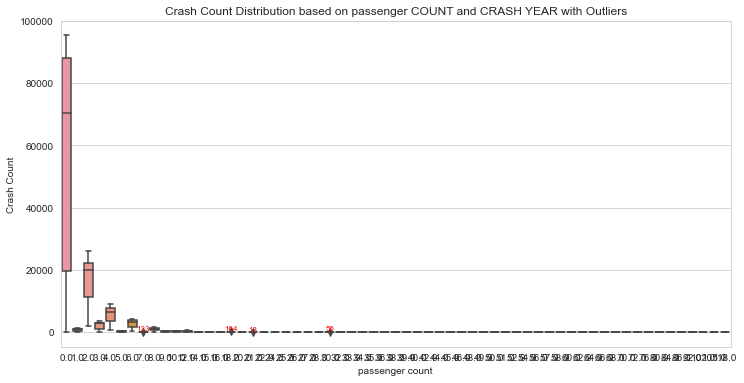

outliers data
non_driver_count: 8.0, crash count:133
non_driver_count: 15.0, crash count:164
non_driver_count: 14.0, crash count:13
non_driver_count: 28.0, crash count:56


In [256]:
#outliers for Crash Count Distribution based on passenger COUNT and CRASH YEAR
counts = crashes_df.groupby(['YEAR', 'non_driver_count']).size().reset_index(name='COUNT')

plt.figure(figsize=(12, 6))

ax = sns.boxplot(x='non_driver_count', y='COUNT',data=counts)

outliers = []
for line in ax.get_lines():
    if line.get_linestyle() == 'None':  
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        outliers.extend(zip(xdata, ydata))

for x, y in outliers:
    plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=8, color='red')

plt.title('Crash Count Distribution based on passenger COUNT and CRASH YEAR with Outliers')
plt.xlabel('passenger count')
plt.ylabel('Crash Count')

plt.show()

outliers_list = [(crashes_df['non_driver_count'].unique()[int(x)], y) for x, y in outliers]
print("outliers data")
outliers_data5 = []
for vcount, count in outliers_list:
    outliers_data5.append(crashes_df[(crashes_df['non_driver_count'] == vcount) ])
    print(f"non_driver_count: {vcount}, crash count:{int(count)}")

outliers_data5 = pd.concat(outliers_data5)


نلاحظ وجود حالات تطرف بالنسبة ل عدد الركاب لان عدد الركاب الكبير يدل على وجود اكثر من مركبة ضمن الحادث

In [ ]:
# outliers_data5.head()

In [ ]:
#القيم المتطرفة من داتا الشوارع
long_street = pd.read_csv('chicago-traffic-dataset/long_street.csv')

In [ ]:
outliers_df = pd.concat([outliers_data, outliers_data2, outliers_data3, outliers_data4, outliers_data5, outliers_data6], ignore_index=True)

# outliers_df.head()

In [ ]:
criteria = (
    (crashes_df['ROADWAY_SURFACE_COND'].isin(['SAND, MUD, DIRT'])) |
    (crashes_df['ROAD_DEFECT'].isin(['DEBRIS ON ROADWAY'])) |
    (crashes_df['CRASH_HOUR'].between(2, 4)) |
    (crashes_df['LIGHTING_CONDITION'].isin(['DAWN'])) |
    (crashes_df['WEATHER_CONDITION'].isin(['SEVERE CROSS WIND GATE ','BLOWING SAND, SOIL, DIRT'])) |
    (crashes_df['TRAFFICWAY_TYPE'].isin(['L-INTERSECTION'])) |
    (crashes_df['PRIM_CONTRIBUTORY_CAUSE'].isin(['MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT','BICYCLE ADVANCING LEGALLY ON RED LIGHT','OBSTRUCTED CROSSWALKS'])) |
    (crashes_df['SEC_CONTRIBUTORY_CAUSE'].isin(['MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT','PASSING STOPPED SCHOOL BUS','OBSTRUCTED CROSSWALKS'])) 
)

outlier_crashes = crashes_df[criteria]

outlier_crashes.head(10)


من اسباب تطرف الحوادث :

 1-عدد المركبات الكبير ضمن الحادث الواحد 

2- عدد الركاب الكبير ضمن الحادث الواحد

3- الوقت في ساعات الزروة بسبب الازدحام او الصباح الباكر بسبب ظروف الرؤية او عدم انتباه السائق

4- اجهزة تحكم المرور موجودة او لا و حالتها تعمل او لا

5-  نوع الطريق من الممكن ان تكون اماكن التقاطع تؤدي الى حوادث اكثر

6- ظروف الطريق من الممكن ان يسبب الطريق المتسخ او المملوء حجارة الى حوادث غريبة

7- ظروف الطقس من الممكن ان يؤدي الضباب الى عدم رؤية السائق

8- ظروف الاضاءة وخاصة في الظلام بسبب عدم رؤية السائق

هناك حالات غريبة ان السائقين في النهار لا يركزون انتبههم الى الطريق على الرغم من الرؤية الواضحة لكن تكون الحوادث في النهار اكثر بينما في الليل يزداد تركيز السائقين ربما بسبب الخوف فتكون الحوادث في الليل اقل 

# Question [4]: Do What you Have to Do

### دراسة اسباب الحوادث بالنسبة للسائقين

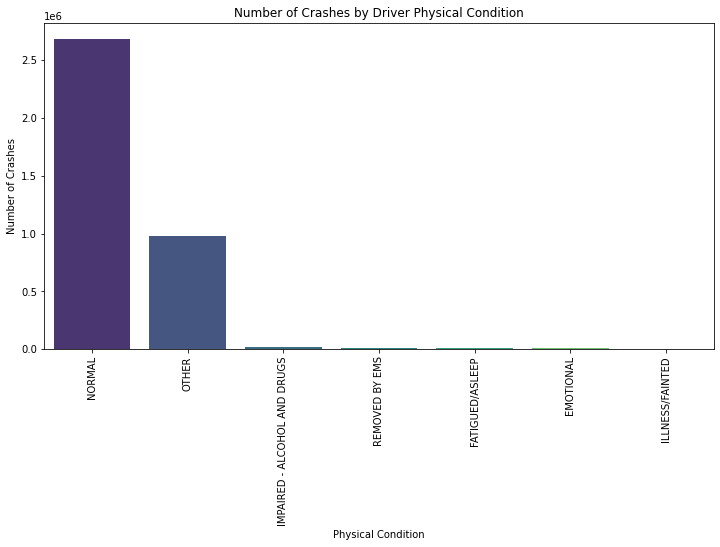

In [71]:
#crash count based on drivers PHYSICAL CONDITION
condition_counts = people_df['PHYSICAL_CONDITION'].value_counts().reset_index()
condition_counts.columns = ['PHYSICAL_CONDITION', 'COUNT']

plt.figure(figsize=(12, 6))
sns.barplot(x='PHYSICAL_CONDITION', y='COUNT', data=condition_counts, palette='viridis')
plt.title('Number of Crashes by Driver Physical Condition')
plt.xlabel('Physical Condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()


 نلاحظ وجود نسبة قليلة من الحوادث كانت بسبب حالة السائق البدنية مثل شرب الكحول او المرض و غيرها 

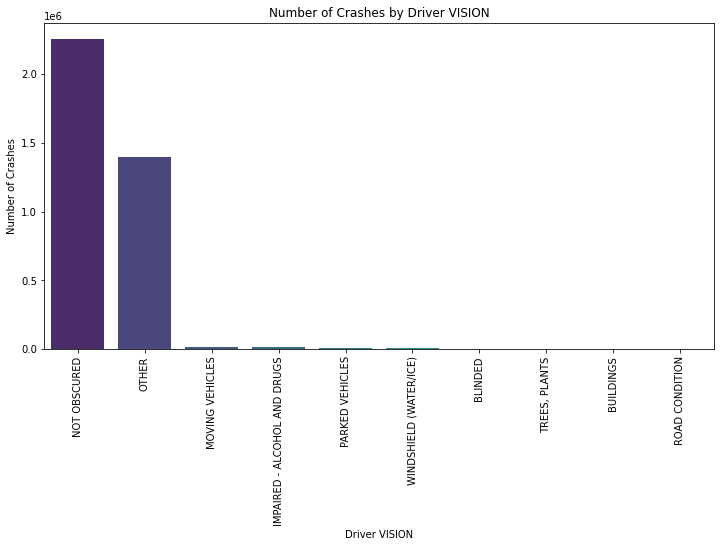

In [72]:
#crash count based on drivers VISION
vision_counts = people_df['DRIVER_VISION'].value_counts().reset_index()
vision_counts.columns = ['DRIVER_VISION', 'COUNT']

plt.figure(figsize=(12, 6))
sns.barplot(x='DRIVER_VISION', y='COUNT', data=vision_counts, palette='viridis')
plt.title('Number of Crashes by Driver VISION')
plt.xlabel('Driver VISION')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()

نلاحظ وجود نسبة من الحوادث كانت بسبب ظروف رؤية السائق  

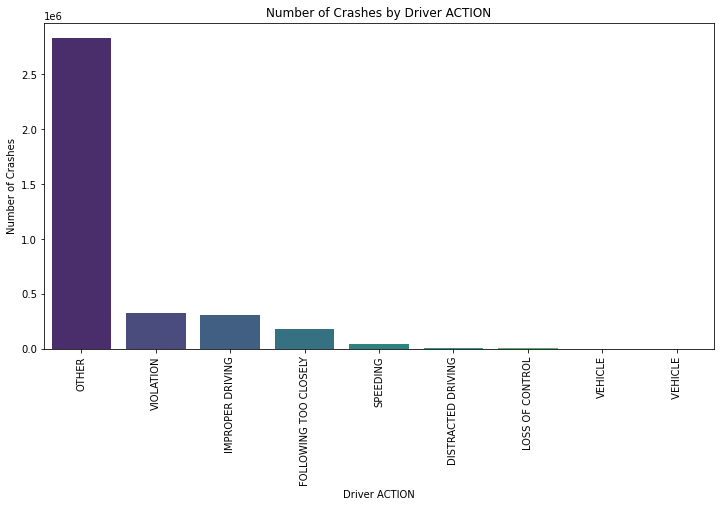

In [73]:
#crash count based on drivers ACTION
ACTION_counts = people_df['DRIVER_ACTION_MAP'].value_counts().reset_index()
ACTION_counts.columns = ['DRIVER_ACTION_MAP', 'COUNT']

plt.figure(figsize=(12, 6))
sns.barplot(x='DRIVER_ACTION_MAP', y='COUNT', data=ACTION_counts, palette='viridis')
plt.title('Number of Crashes by Driver ACTION')
plt.xlabel('Driver ACTION')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()

نلاحظ وجود نسبة من الحوادث بسبب تصرف السائق الخاطئ

دراسة حالة الارتباط بين عامود رؤية السائق و تصرفه

Chi-Square Test Statistic: 196388.06819151845
P-value: 0.0
There is a significant relationship between the DRIVER ACTION and the DRIVER VISION.


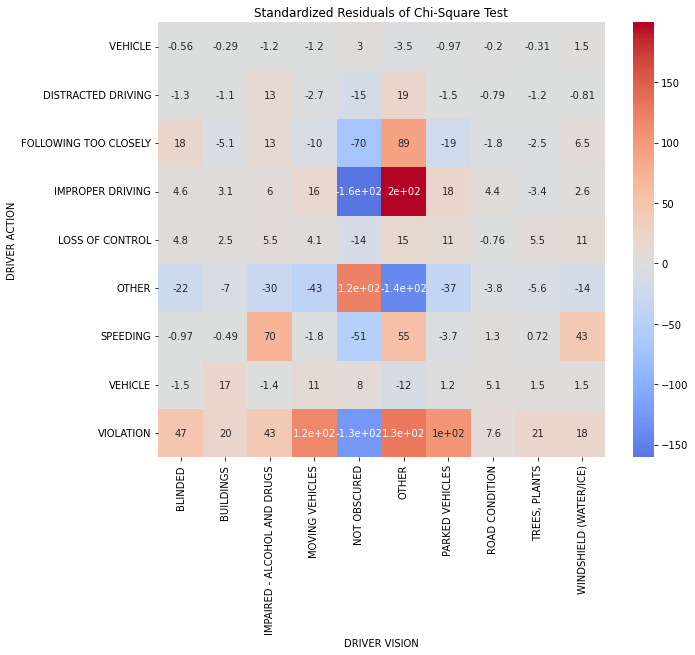

In [74]:
contingency_table1 = pd.crosstab(people_df['DRIVER_ACTION_MAP'],people_df['DRIVER_VISION'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table1)

print(f'Chi-Square Test Statistic: {chi2}')
print(f'P-value: {p}')

if p < 0.05:
    print("There is a significant relationship between the DRIVER ACTION and the DRIVER VISION.")
else:
    print("There is no significant relationship between the DRIVER ACTION and the DRIVER VISION.")
residuals = (contingency_table1 - expected) / np.sqrt(expected)

plt.figure(figsize=(10, 8))
sns.heatmap(residuals, annot=True, cmap='coolwarm', center=0)
plt.title('Standardized Residuals of Chi-Square Test')
plt.xlabel('DRIVER VISION')
plt.ylabel('DRIVER ACTION')
plt.show()

نلاحظ ان هناك ارتباط بن العامودين فهما من احد اسباب الحوادث

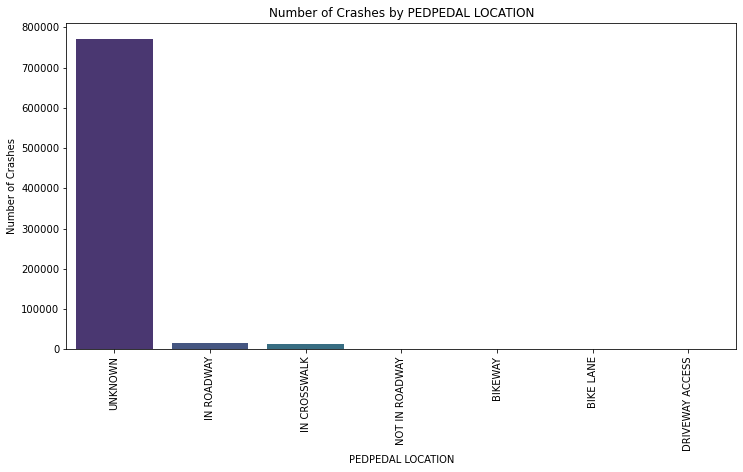

In [75]:
#crash count based on PEDPEDAL LOCATION
not_driver_df = people_df[people_df['PERSON_TYPE'] != 'DRIVER']
plocv_counts = not_driver_df['PEDPEDAL_LOCATION'].value_counts().reset_index()
plocv_counts.columns = ['PEDPEDAL_LOCATION', 'COUNT']

plt.figure(figsize=(12, 6))
sns.barplot(x='PEDPEDAL_LOCATION', y='COUNT', data=plocv_counts, palette='viridis')
plt.title('Number of Crashes by PEDPEDAL LOCATION')
plt.xlabel('PEDPEDAL LOCATION')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()

نلاحظ ان نسبة من الحوادث كانت بسبب ان الاشخاص كانوا واقفين في مكان خاطئ

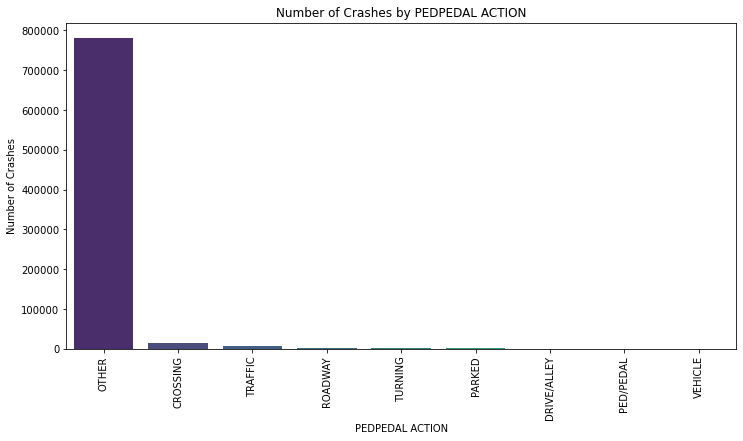

In [79]:
#crash count based on PEDPEDAL ACTION
not_driver_df = people_df[people_df['PERSON_TYPE'] != 'DRIVER']
pact_counts = not_driver_df['PEDPEDAL_ACTION_MAP'].value_counts().reset_index()
pact_counts.columns = ['PEDPEDAL_ACTION_MAP', 'COUNT']

plt.figure(figsize=(12, 6))
sns.barplot(x='PEDPEDAL_ACTION_MAP', y='COUNT', data=pact_counts, palette='viridis')
plt.title('Number of Crashes by PEDPEDAL ACTION')
plt.xlabel('PEDPEDAL ACTION')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()

تصرفات الافراد الخاطئة سببت حوادث

 PEDPEDAL_LOCATION و PEDPEDAL_ACTION دراسة الارتباط بين عامود 

Chi-Square Test Statistic: 787309.6387550879
P-value: 0.0
There is a significant relationship between the PEDPEDAL ACTION and the PEDPEDAL LOCATION of not drivers.


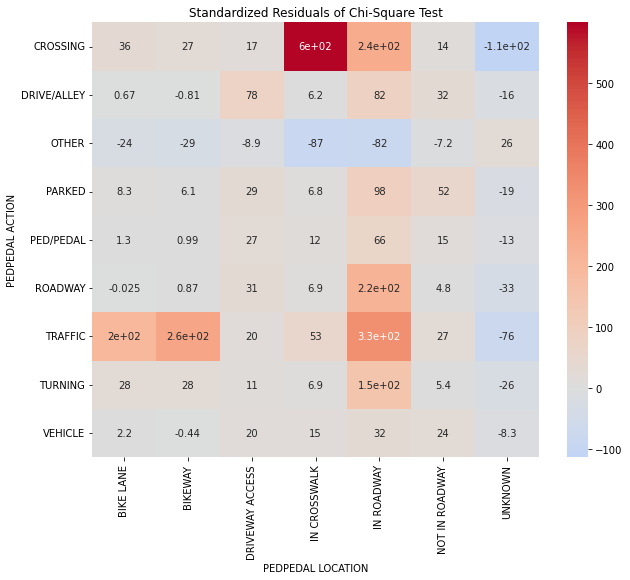

In [80]:
contingency_table = pd.crosstab(not_driver_df['PEDPEDAL_ACTION_MAP'],not_driver_df['PEDPEDAL_LOCATION'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-Square Test Statistic: {chi2}')
print(f'P-value: {p}')

if p < 0.05:
    print("There is a significant relationship between the PEDPEDAL ACTION and the PEDPEDAL LOCATION of not drivers.")
else:
    print("There is no significant relationship between the PEDPEDAL ACTION and the PEDPEDAL LOCATION of not drivers.")

residuals = (contingency_table - expected) / np.sqrt(expected)

plt.figure(figsize=(10, 8))
sns.heatmap(residuals, annot=True, cmap='coolwarm', center=0)
plt.title('Standardized Residuals of Chi-Square Test')
plt.xlabel('PEDPEDAL LOCATION')
plt.ylabel('PEDPEDAL ACTION')
plt.show()


نلاحظ ان هناك ارتباط بين العامودين فهما من احد الاسباب المسببة للحوادث

 يوجد ارتباط بين طريق العبور والاشخاص الذين يعبرون فيجب عليهم الانتباه للاشارات المرورية لتجنب التسبب بالحوادث 

 ### دراسة اسباب الحوادث بالنسبة للمركبة

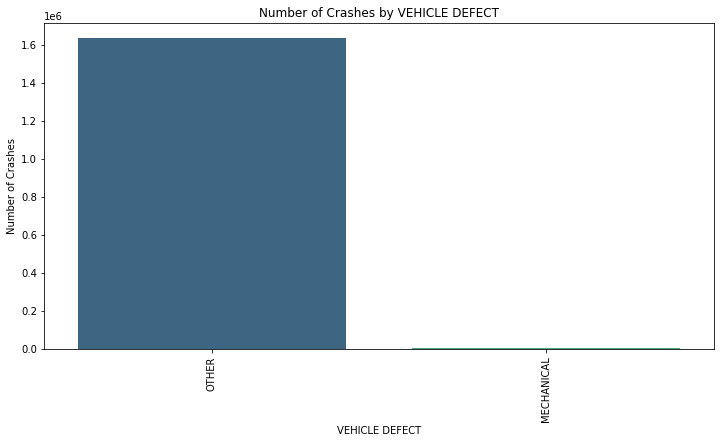

In [20]:
#crash count based on VEHICLE DEFECT
DEFECT_counts = vehicles_df['VEHICLE_DEFECT_MAP'].value_counts().reset_index()
DEFECT_counts.columns = ['VEHICLE_DEFECT_MAP', 'COUNT']

plt.figure(figsize=(12, 6))
sns.barplot(x='VEHICLE_DEFECT_MAP', y='COUNT', data=DEFECT_counts, palette='viridis')
plt.title('Number of Crashes by VEHICLE DEFECT')
plt.xlabel('VEHICLE DEFECT')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()

نلاحظ ان نسبة قليلة من الحوادث كانت بسبب ان المركبة معطلة

In [17]:
new_vehicles_df = pd.read_csv('chicago-traffic-dataset/new_vehicles.csv')
# new_vehicles_df.head()

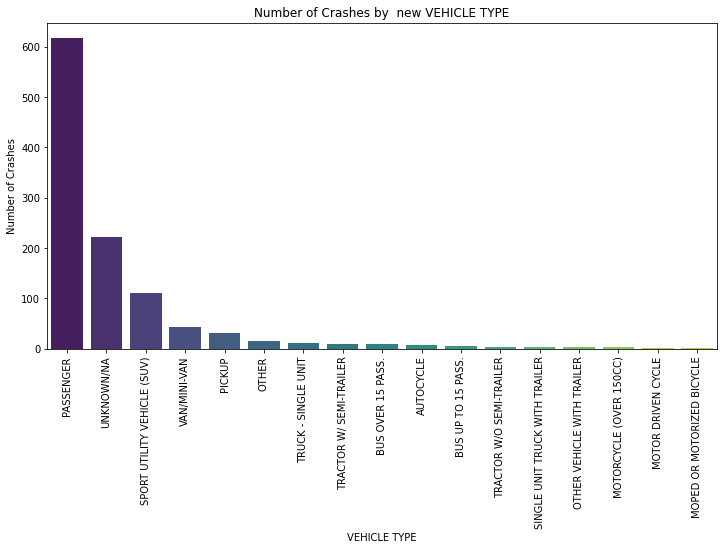

In [19]:
#crash count based on new VEHICLE YEAR for VEHICLE TYPE 

type1_counts = new_vehicles_df['VEHICLE_TYPE'].value_counts().reset_index()
type1_counts.columns = ['VEHICLE_TYPE', 'COUNT']

plt.figure(figsize=(12, 6))
sns.barplot(x='VEHICLE_TYPE', y='COUNT', data=type1_counts, palette='viridis')
plt.title('Number of Crashes by  new VEHICLE TYPE')
plt.xlabel('VEHICLE TYPE')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()

نلاحظ ان اغلب انواع المركبات هي ركاب  

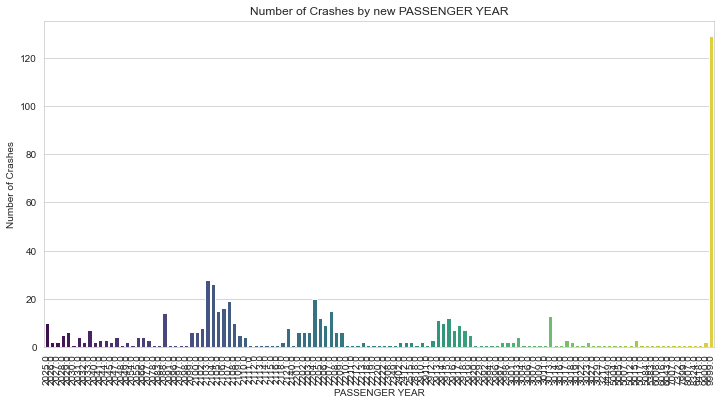

In [267]:
#crash count based on new VEHICLE YEAR for VEHICLE TYPE PASSENGER 
pass2_df = new_vehicles_df[ new_vehicles_df['VEHICLE_TYPE'] == 'PASSENGER']
type3_counts = pass2_df['VEHICLE_YEAR'].value_counts().reset_index()
type3_counts.columns = ['VEHICLE_YEAR', 'COUNT']

plt.figure(figsize=(12, 6))
sns.barplot(x='VEHICLE_YEAR', y='COUNT', data=type3_counts, palette='viridis')
plt.title('Number of Crashes by new PASSENGER YEAR')
plt.xlabel('PASSENGER YEAR')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()

يوجد عشوائية في السنة حيث يوجد اشخاص تاريخ ولادتها اكبر من 2024

In [268]:
old_vehicles_df = pd.read_csv('chicago-traffic-dataset/old_vehicles.csv')
# old_vehicles_df.head()

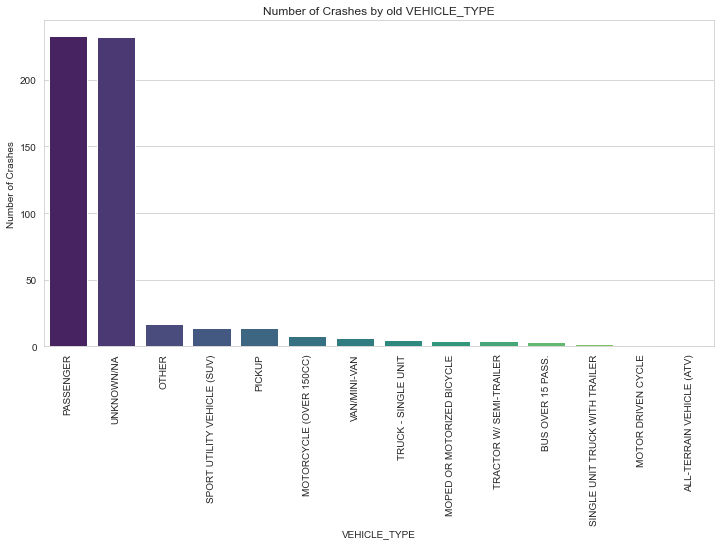

In [269]:
#crash count based on old VEHICLE YEAR for VEHICLE TYPE 

type2_counts = old_vehicles_df['VEHICLE_TYPE'].value_counts().reset_index()
type2_counts.columns = ['VEHICLE_TYPE', 'COUNT']

plt.figure(figsize=(12, 6))
sns.barplot(x='VEHICLE_TYPE', y='COUNT', data=type2_counts, palette='viridis')
plt.title('Number of Crashes by old VEHICLE_TYPE')
plt.xlabel('VEHICLE_TYPE')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()

نلاحظ ان اغلب انواع المركبات هي ركاب  

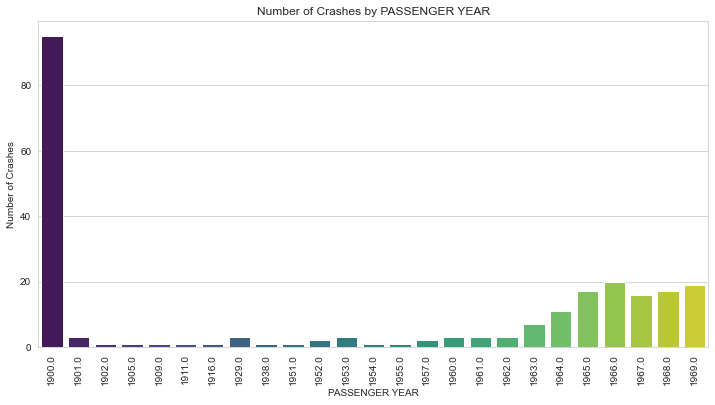

In [270]:
#crash count based on VEHICLE YEAR for VEHICLE TYPE PASSENGER 
pass_df = old_vehicles_df[ old_vehicles_df['VEHICLE_TYPE'] == 'PASSENGER']
type_counts = pass_df['VEHICLE_YEAR'].value_counts().reset_index()
type_counts.columns = ['VEHICLE_YEAR', 'COUNT']

plt.figure(figsize=(12, 6))
sns.barplot(x='VEHICLE_YEAR', y='COUNT', data=type_counts, palette='viridis')
plt.title('Number of Crashes by PASSENGER YEAR')
plt.xlabel('PASSENGER YEAR')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()

  نلاحظ ان التطرف في داتا المركبات ذات العام اكبر من 1970 هي بسبب ان اغلب نوع هذه المركبات هي ركاب كبار بالعمر وليس سيارات 
  
  هل يمكن ان يكون كبار العمر مسؤولين عن التسبب بالحادث

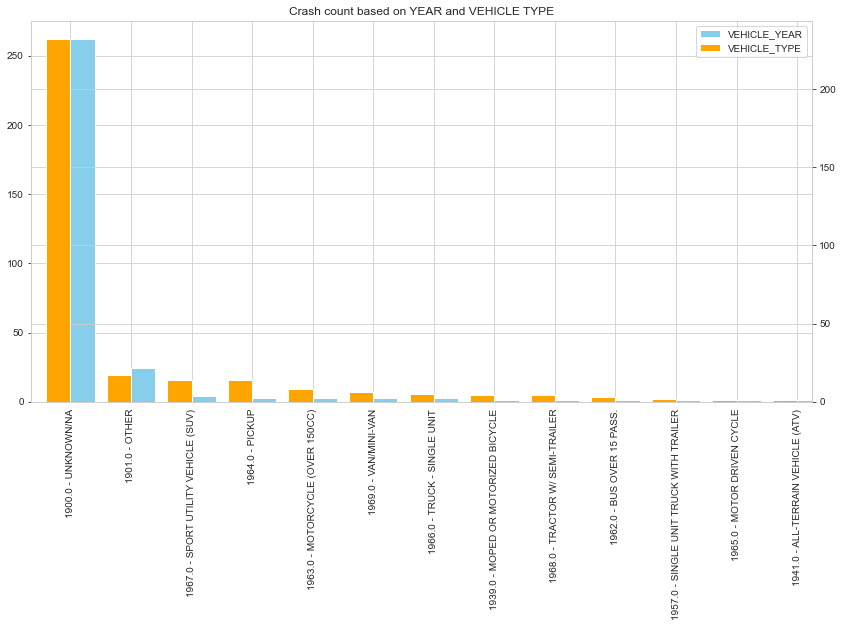

In [271]:
#crash count based on VEHICLE YEAR for VEHICLE TYPE not PASSENGER 
not_pass_df = old_vehicles_df[ old_vehicles_df['VEHICLE_TYPE'] != 'PASSENGER']
vec_year = not_pass_df['VEHICLE_YEAR'].value_counts()
vec_type = not_pass_df['VEHICLE_TYPE'].value_counts()

fig, ax1 = plt.subplots(figsize=(14, 7))

combined_labels = [f'{light} - {TRAFFICWAY}' for light, TRAFFICWAY in zip(vec_year.index, vec_type.index)]

vec_year.plot(kind='bar', color='skyblue', ax=ax1, position=0, width=0.4, label='VEHICLE_YEAR')

ax2 = ax1.twinx()
vec_type.plot(kind='bar', color='orange', ax=ax2, position=1, width=0.4, label='VEHICLE_TYPE')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Crash count based on YEAR and VEHICLE TYPE')
ax1.set_xticks(range(len(combined_labels)))
ax1.set_xticklabels(combined_labels, rotation=90)

plt.show()

يوجد نسبة جيدة هي مركبات قديمة بالعمر من الممكن ان تسبب حوادث بسبب قدمها   

 ### دراسة اسباب الحوادث بالنسبة للحادث

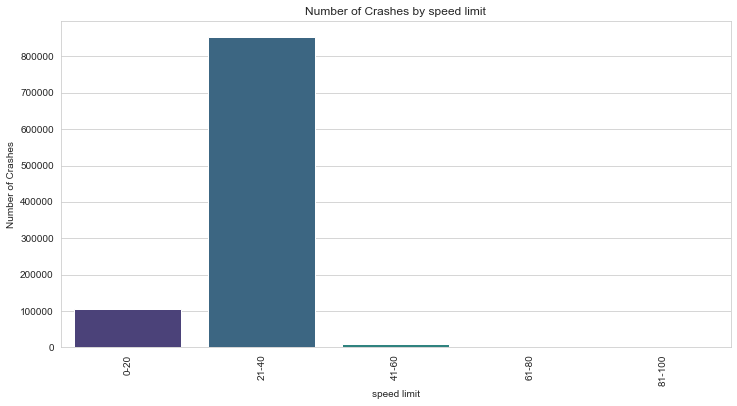

In [272]:
#crash count based on speed limit
speed_counts = crashes_df['speed'].value_counts().reset_index()
speed_counts.columns = ['speed', 'COUNT']

plt.figure(figsize=(12, 6))
sns.barplot(x='speed', y='COUNT', data=speed_counts, palette='viridis')
plt.title('Number of Crashes by speed limit')
plt.xlabel('speed limit')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()

نلاحظ ان نسبة كثيرة من الحوادث كانت عند حدود السرعة بين 21-40

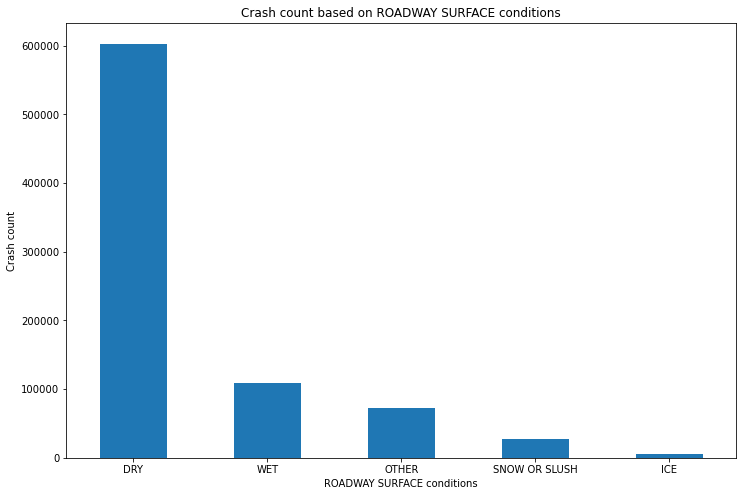

In [81]:
roadway = crashes_df['ROADWAY_SURFACE_COND'].value_counts()

plt.figure(figsize=(12, 8))
roadway.plot(kind='bar')
plt.title('Crash count based on ROADWAY SURFACE conditions')
plt.xlabel('ROADWAY SURFACE conditions')
plt.ylabel('Crash count')
plt.xticks(rotation=0)  
plt.show()

نلاحظ وجود نسبة قليلة من الحوادث تحدث بسبب الطرق الرملية او الطينية او المتسخة

In [82]:
contingency_table3 = pd.crosstab(crashes_df['WEATHER_CONDITION'],people_df['DRIVER_VISION'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table3)

print(f'Chi-Square Test Statistic: {chi2}')
print(f'P-value: {p}')

if p < 0.05:
    print("There is a significant relationship between the WEATHER CONDITION and the DRIVER VISION.")
else:
    print("There is no significant relationship between the WEATHER CONDITION and the DRIVER VISION.")


Chi-Square Test Statistic: 66.05078752764474
P-value: 0.3719400862982913
There is no significant relationship between the WEATHER CONDITION and the DRIVER VISION.


لا يوجد ارتباط بين عامود رؤية السائق و حالة الطقس

Chi-Square Test Statistic: 1268297.6163276213
P-value: 0.0
There is a significant relationship between the WEATHER CONDITION and the ROADWAY_SURFACE_COND.


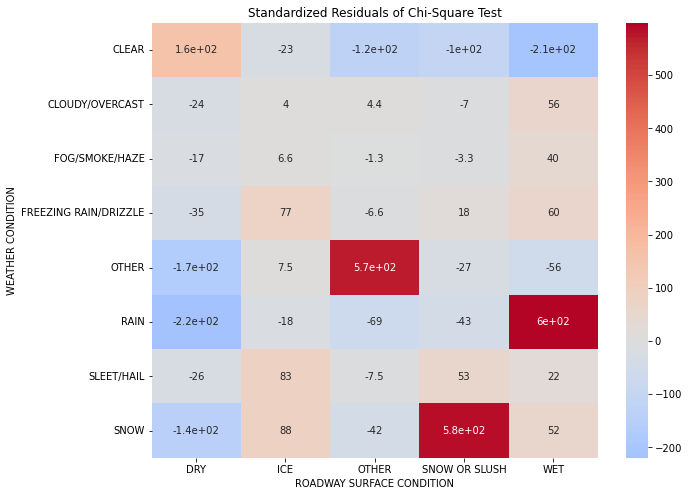

In [83]:
contingency_table4 = pd.crosstab(crashes_df['WEATHER_CONDITION'],crashes_df['ROADWAY_SURFACE_COND'])

chi2, p, dof, expected4 = stats.chi2_contingency(contingency_table4)

print(f'Chi-Square Test Statistic: {chi2}')
print(f'P-value: {p}')

if p < 0.05:
    print("There is a significant relationship between the WEATHER CONDITION and the ROADWAY_SURFACE_COND.")
else:
    print("There is no significant relationship between the WEATHER CONDITION and the ROADWAY_SURFACE_COND.")

residuals = (contingency_table4 - expected4) / np.sqrt(expected4)

plt.figure(figsize=(10, 8))
sns.heatmap(residuals, annot=True, cmap='coolwarm', center=0)
plt.title('Standardized Residuals of Chi-Square Test')
plt.xlabel('ROADWAY SURFACE CONDITION')
plt.ylabel('WEATHER CONDITION')
plt.show()    


نلاحظ ان هناك ارتباط بين ظروف الطقس و ظروف الطريق

الطريق الجاف يرتبط مع الطقس الصاحي و يرتبط عكسا مع الامطار و الثلوج وغيرها 

الطريق المبلل يرتبط مع الامطار و الثلوج وغيرها وعكسا مع الطقس الصاحي


Chi-Square Test Statistic: 1825.3712890281922
P-value: 0.0
There is a significant relationship between the POSTED SPEED LIMIT and the ROADWAY_SURFACE_COND.


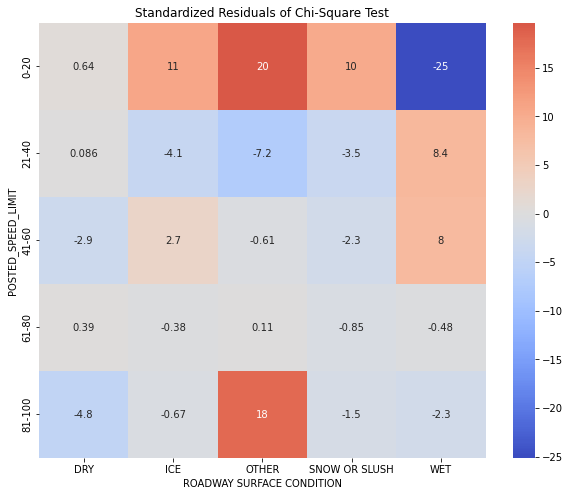

In [84]:
contingency_table5 = pd.crosstab(crashes_df['speed'],crashes_df['ROADWAY_SURFACE_COND'])

chi2, p, dof, expected5 = stats.chi2_contingency(contingency_table5)

print(f'Chi-Square Test Statistic: {chi2}')
print(f'P-value: {p}')

if p < 0.05:
    print("There is a significant relationship between the POSTED SPEED LIMIT and the ROADWAY_SURFACE_COND.")
else:
    print("There is no significant relationship between the POSTED SPEED LIMIT and the ROADWAY_SURFACE_COND.")

residuals = (contingency_table5 - expected5) / np.sqrt(expected5)

plt.figure(figsize=(10, 8))
sns.heatmap(residuals, annot=True, cmap='coolwarm', center=0)
plt.title('Standardized Residuals of Chi-Square Test')
plt.xlabel('ROADWAY SURFACE CONDITION')
plt.ylabel('POSTED_SPEED_LIMIT')
plt.show()    


نلاحظ انه هناك ارتباط بين السرعة و ظروف الطريق

يجب على السائقين تخفيف السرعة على الطرق المبللة و الانتباه

correlation matrix for 3 df

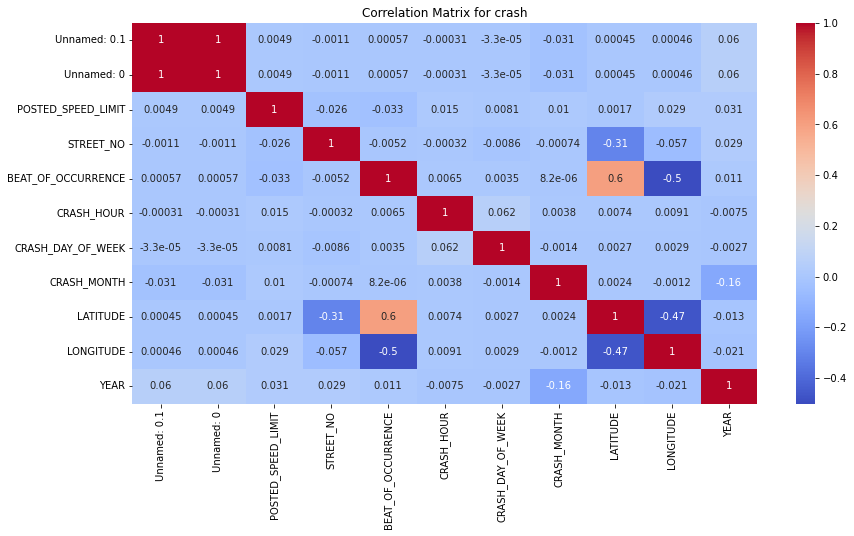

In [85]:
correlation_matrix = crashes_df.corr()

plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for crash')
plt.show()


 0.36  بنسبة inside area نلاحظ وجود ارتباط بين عامود رقم الشارع و المسافة بنسبة 0.65 و ارتباط عكسي مع  
    بنسبة 0.55inside area وان عامود المسافة مرتبط عكسيا مع    
  بنسبة 0.97 longitude مرتبط عكسيا مع latitude وان عامود     
  

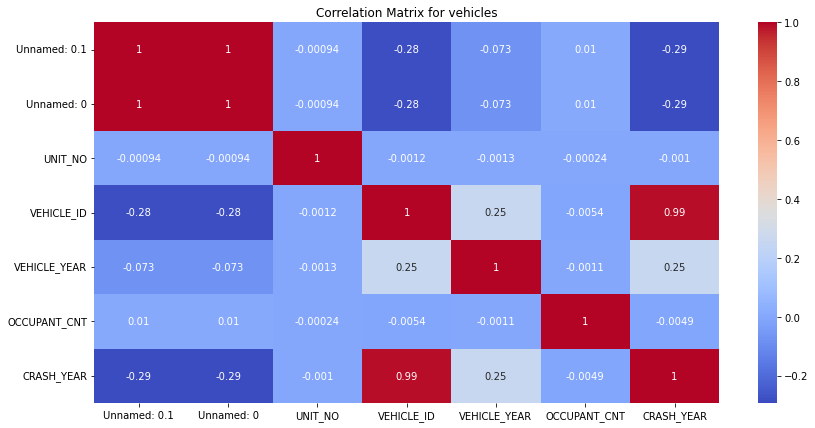

In [86]:
# إنشاء مصفوفة الارتباط
correlation_matrix = vehicles_df.corr()

plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for vehicles')
plt.show()


وجود ارتباط عكسي بين سنة المركبة وعمر المركبة بنسبة 0.92 

وارتباط سنة المركبة مع سنة الحادث بنسبة 0.25

و ارتباط سنة الحادث بعمر المركبة بنسبة 0.14

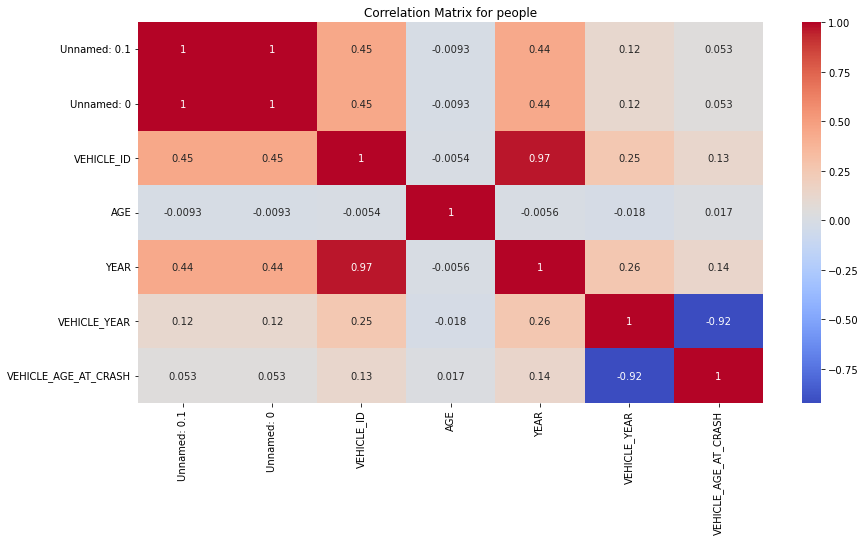

In [87]:
# إنشاء مصفوفة الارتباط
correlation_matrix = people_df.corr()

plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for people')
plt.show()


وجود ارتباط عكسي بين سنة المركبة وعمر المركبة في الحادث بنسبة 0.92 

وارتباط سنة المركبة مع سنة الحادث بنسبة 0.26

و ارتباط سنة الحادث بعمر المركبة بنسبة 0.14